# House price pridection
### Comprehensive Evaluation of Machine Learning Models on House Price Pridection Model 

Author: Ahasanul H Ansari

### Introduction

The primary objective of this notebook is to conduct a thorough evaluation of various machine learning models, both regression and classification, to identify the most accurate algorithm for predicting the target variable. The evaluation will culminate with the application of the best-performing model on a set of test data to demonstrate its predictive capabilities.

#### Goals

- To compare a range of machine learning algorithms for both regression and classification tasks.
- To select the top-performing model based on key performance metrics.
- To apply the chosen model to dummy data for prediction validation.

#### Algorithms Evaluated

In my exploration, I will evaluate the following machine learning algorithms:


- **Regression Algorithms:**
  - Linear Regression
  - Decision Tree Regression
  - Random Forest Regression
  - KNN Regression (K-Nearest Neighbors)
  - XGBoost Regression
  - CatBoost Regression
  - LightGBM Regression
  
- **Classification Algorithms:**
  - Support Vector Classifier
  - CatBoost Classifier
  

#### Data Preprocessing

Prior to model evaluation, the following preprocessing steps were implemented to ensure data quality and readiness for analysis:

- **Missing Values**: Conducted a comprehensive check for missing values within the dataset.
- **Data Distribution**: Examined the distribution and skewness of the dataset to understand the underlying data structure.
- **Feature Engineering**: Applied appropriate transformations to enhance model performance where necessary.
- **Feature Scaling** : Applied appropriate 
- ** Modeling** : Applied suitable model as per RMSE value on data set.
- **PREDICTION** : Predict the model as per Modeling observation.
- ** Submission**: Submitted predicted value 
#### Acknowledgements

This dataset is taken from Kaggel competetion of House_Prediction .
Also Special Thankful **Gülce Kästel** notebook in which helps alot for creating this notebook.

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
#from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import pickle

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Function for Displaying Headings

In [358]:
def heading(title):
    print('-'*50)
    print(title.upper())
    print('-'*50)

#### Function for getting the summary of the DataFrame's Columns types

In [359]:
# Function to print a summary of the DataFrame's column types
def print_data_summary(df):
    # Count the number of categorical columns
    categorical_count = df.select_dtypes(include=['category']).shape[1]
    # Count the number of float columns
    float_count = df.select_dtypes(include=['float64']).shape[1]
    # Count the number of integer columns
    int_count = df.select_dtypes(include=['int64']).shape[1]
    # count the no of Object columns
    int_object = df.select_dtypes(include=['object']).shape[1]
    
    # Print the counts in a bullet-point format
    print(f"• Categorical columns: {categorical_count}")
    print(f"• Float columns: {float_count}")
    print(f"• Integer columns: {int_count}")
    print(f"• Object columns: {int_object}")

#### Define Function for Check the Details of Data set.

In [360]:
from polars import head

def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'VALUE TYPES': dataframe.dtypes,
        'DUPLICATED VALUES': dataframe.duplicated().sum(),
        'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
        'ANY MISSING VALUES': dataframe.isnull().values.any(),
        'MISSING VALUES': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    
    hashtags= '***************'
     
    for key, val in d.items():
        print("\n")
        print(f'{hashtags} {key} {hashtags}')
        print("\n")
        print(val)
        print("\n")
        print(f'{hashtags} {"LIST END"} {hashtags}')
    
        

#### Function to calculate the Null/ Missing Values

In [361]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#### Define the functions for Identified Categorical & Numerical Variable

In [362]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']  # Categorical columns
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtype != 'O']  # Numeric but categorical
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtype == 'O']  # Categorical but cardinal
    cat_cols += num_but_cat  # Combine categorical columns
    cat_cols = [col for col in cat_cols if col not in cat_but_car]  # Exclude cardinal columns from categorical columns

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'O']  # Numerical columns
    num_cols = [col for col in num_cols if col not in num_but_cat]  # Exclude numeric-looking categories

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


 - This function identifies the names of categorical, numerical, and categorical but cardinal variables in the dataset.
 - Note: Numeric-looking categorical variables are also included in categorical variables.

In [363]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {cat_cols}')
    print('-' * 80)
    print(f'Numerical : {num_cols}')
    print('-' * 80)
    print(f'Categorical but Cardinal : {cat_but_car}')


### Load the Datasets

In [364]:
# load the dataset 
#sample_submission = pd.read_csv("D:\python_ai_ka_chilla\dataset\house-prices-advanced-regression-techniques\sample_submission.csv")
test_x = pd.read_csv("D:\python_ai_ka_chilla\dataset\house-prices-advanced-regression-techniques/test.csv")
train_y= pd.read_csv("D:\python_ai_ka_chilla\dataset\house-prices-advanced-regression-techniques/train.csv")

# Creating a copy of the dataset for ease of use
house = pd.concat([train_y, test_x], ignore_index=True) 
house.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1   2          20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2   3          60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA   
1            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN       0.000        TA        TA     CBlock       Gd       TA   
2            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr       856       854             0   
1           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr      1262         0             0   
2           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0         NaN     Attchd   
1       1262         0.000         1.000         2         0             3             1          TA             6        Typ           1          TA     Attchd   
2       1786         1.000         0.000         2         1             3             1          Gd             6        Typ           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  \
0     2003.000          RFn       2.000     548.000         TA         TA          Y           0           61              0          0            0         0    NaN   
1     1976.000          RFn       2.000     460.000         TA         TA          Y         298            0              0          0            0         0    NaN   
2     2001.000          RFn       2.000     608.000         TA         TA          Y           0           42              0          0            0         0    NaN   

  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0   NaN         NaN        0       2    2008       WD        Normal 208500.000  
1   NaN         NaN        0       5    2007       WD        Normal 181500.000  
2   NaN         NaN        0       9    2008       WD        Normal 223500.000

### 1. Data Pre-Processing

#### 1.1 Detailed snapshot Analysis of Dataset for further EDA.

In [365]:
# Print a heading for the DataFrame information section
heading('Dataframe Information')  # type: ignore
check_detail(dataframe=house) # type: ignore

--------------------------------------------------
DATAFRAME INFORMATION
--------------------------------------------------


*************** SHAPE ***************


(2919, 81)


*************** LIST END ***************


*************** COLUMNS ***************


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', '

#### 1.2 Detailes Exploratory Data Analysis
#### 1.2.1 Identifying the Categorical & Numarical Variables used in Dataset. 
- This function identifies the names of categorical, numerical, and categorical but cardinal variables in the dataset.
- Note: Numeric-looking categorical variables are also included in categorical variables.

In [366]:
cat_cols, num_cols, cat_but_car = grab_col_names(house, car_th=25) #type: ignore
heading ('Type of Variables')
identify_check(house) # type:ignore

Observations: 2919
Variables: 81
cat_cols: 53
num_cols: 28
cat_but_car: 0
num_but_cat: 10
--------------------------------------------------
TYPE OF VARIABLES
--------------------------------------------------
--------------------------------------------------------------------------------
Categorical : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces'

#### 1.2.2 Categorical Variable Analysis

- Function to summarize and plot categorical variables.

In [367]:
def to_analysis_cat(dataframe, c_cols, ratio=False, plot=False):
    """
    Analyze and optionally plot the distribution of a categorical column in a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    c_cols (str): The name of the categorical column to analyze.
    ratio (bool): If True, prints the value counts and their ratio.
    plot (bool): If True, plots the distribution as a count plot.
    """
    print('-' * 80)
    
    if c_cols not in dataframe.columns:
        raise ValueError(f"Column {c_cols} does not exist in the DataFrame.")
    
    if dataframe[c_cols].dtype == 'bool':
        dataframe[c_cols] = dataframe[c_cols].astype(int)
    
    value_counts = dataframe[c_cols].value_counts()
    
    if ratio:
        ratio_df = pd.DataFrame({c_cols: value_counts,
                                 'Ratio (%)': 100 * value_counts / len(dataframe)})
        print(ratio_df)
    
    print('-' * 80)
    
    if plot:
        plt.figure(figsize=(7, 6))
        sns.countplot(x=c_cols, data=dataframe, palette='viridis', edgecolor='black')
        plt.xlabel(c_cols)
        plt.ylabel('Count')
        plt.title(f'Distribution of {c_cols}')
        plt.xticks(rotation=45)
        plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------
          MSZoning  Ratio (%)
MSZoning                     
RL            2265     77.595
RM             460     15.759
FV             139      4.762
RH              26      0.891
C (all)         25      0.856
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
        Street  Ratio (%)
Street                   
Pave      2907     99.589
Grvl        12      0.411
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
       Alley  Ratio (%)
Alley                  
Grvl     120      4.111
Pave      78      2.672
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
          LotShape  Rat

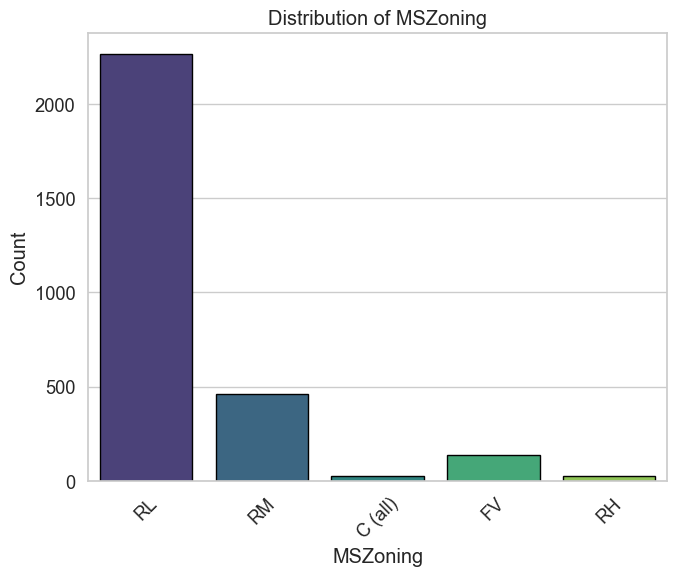

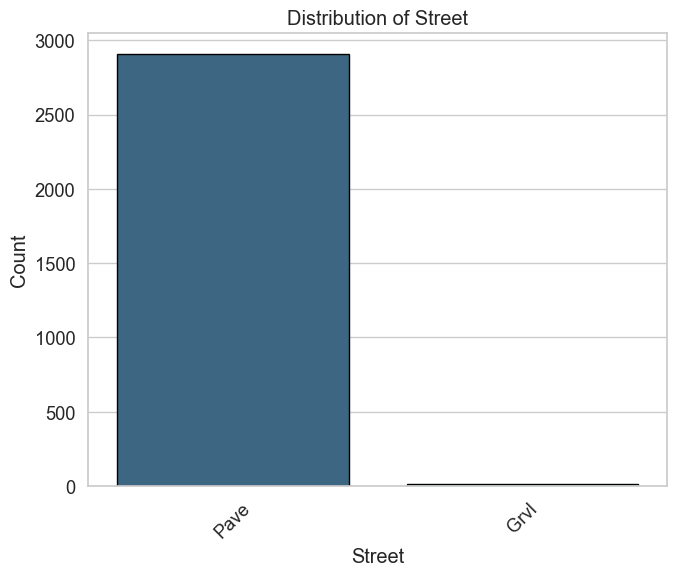

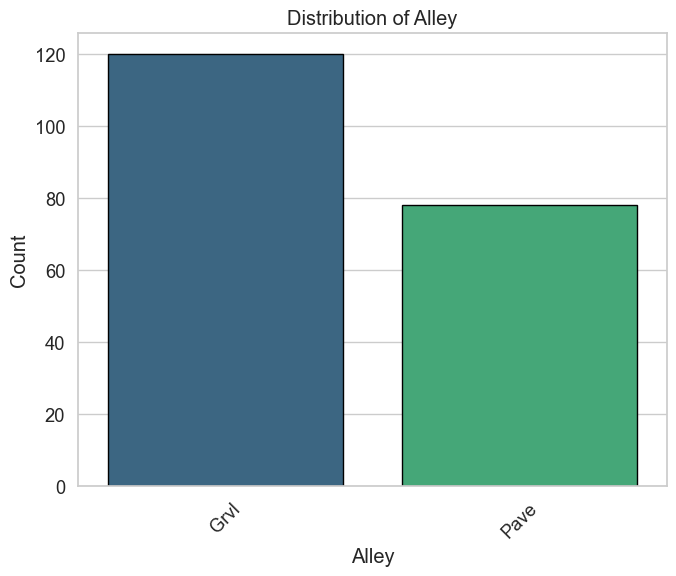

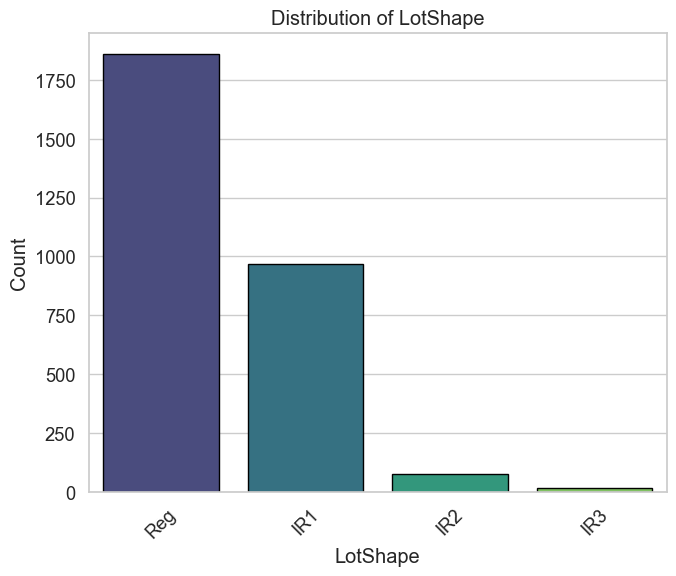

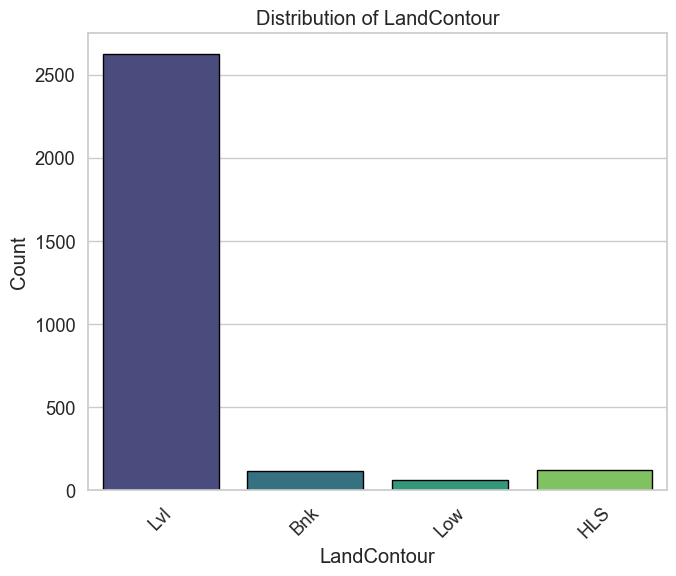

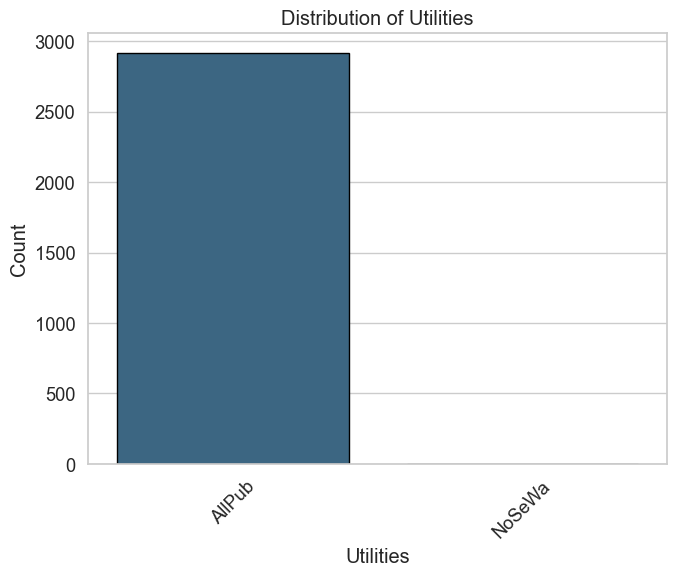

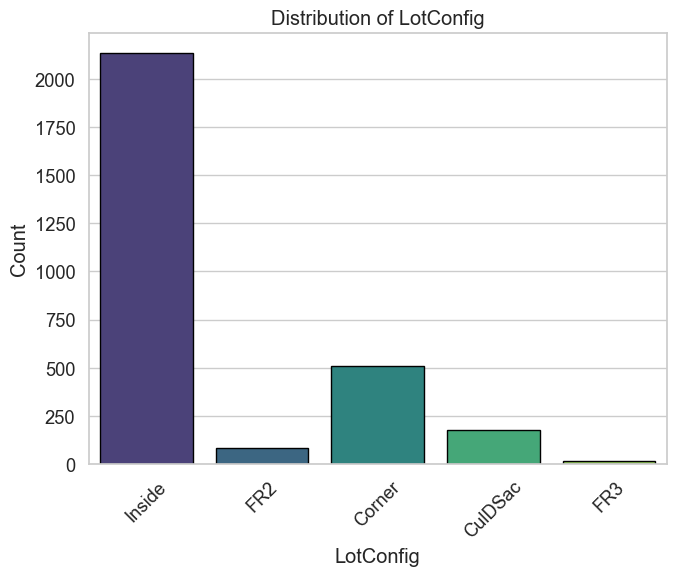

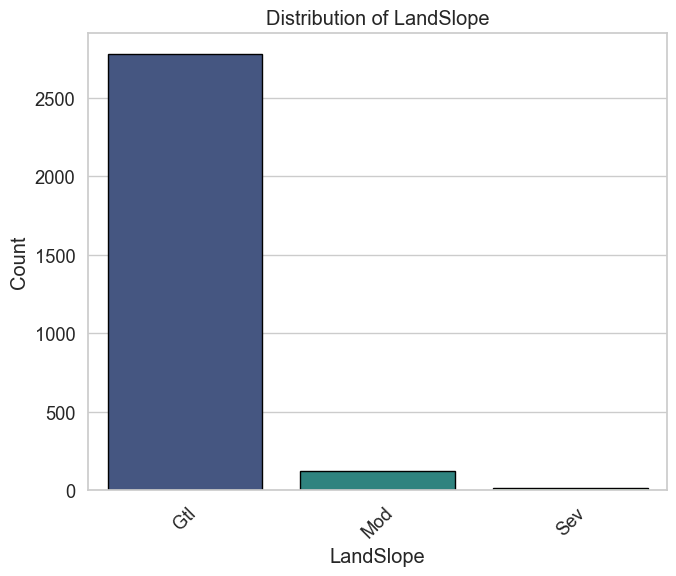

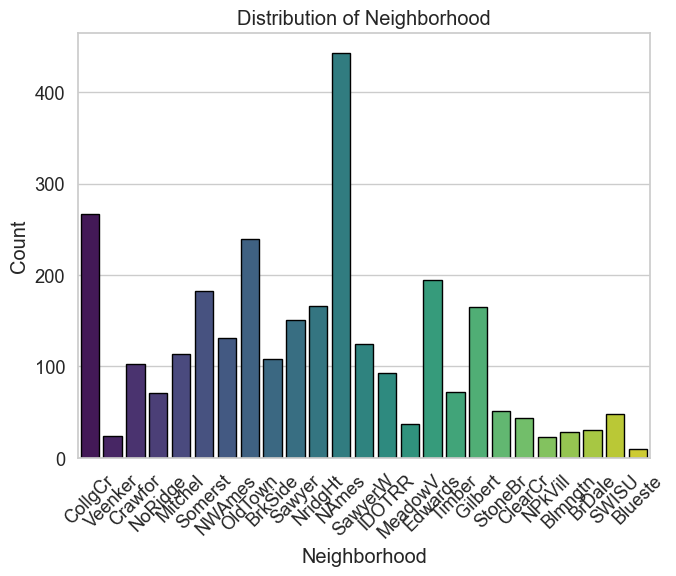

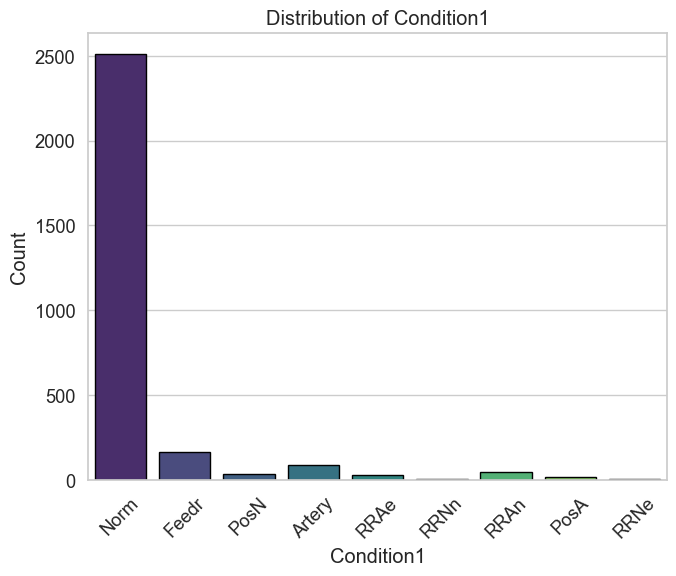

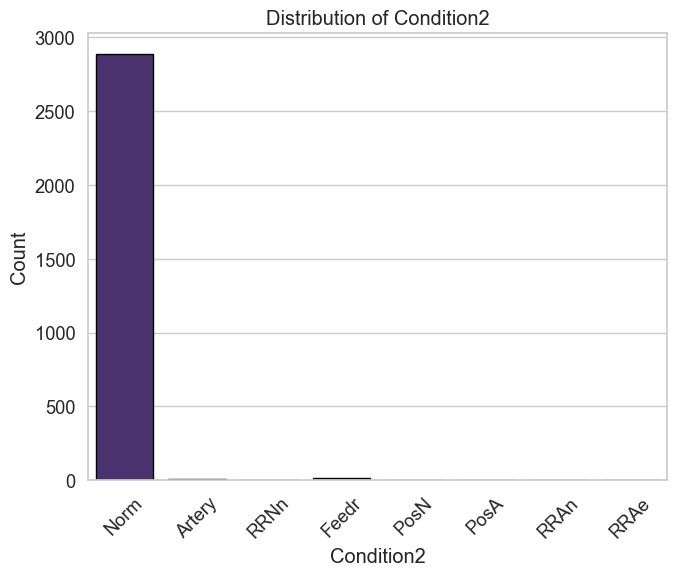

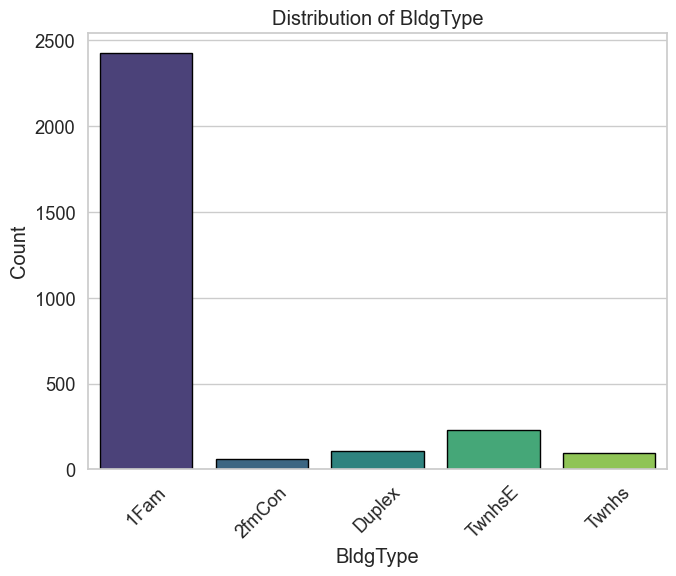

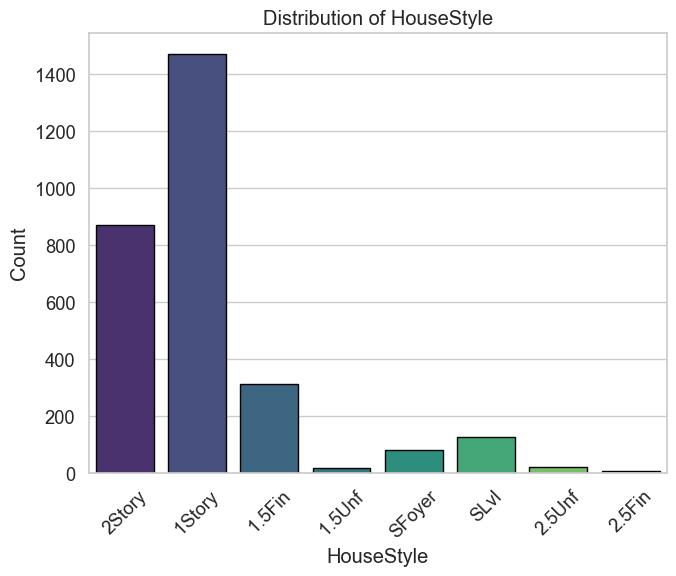

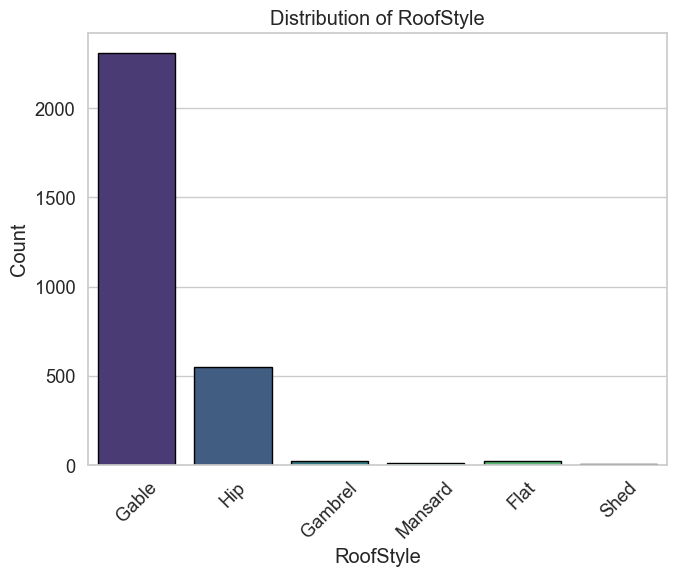

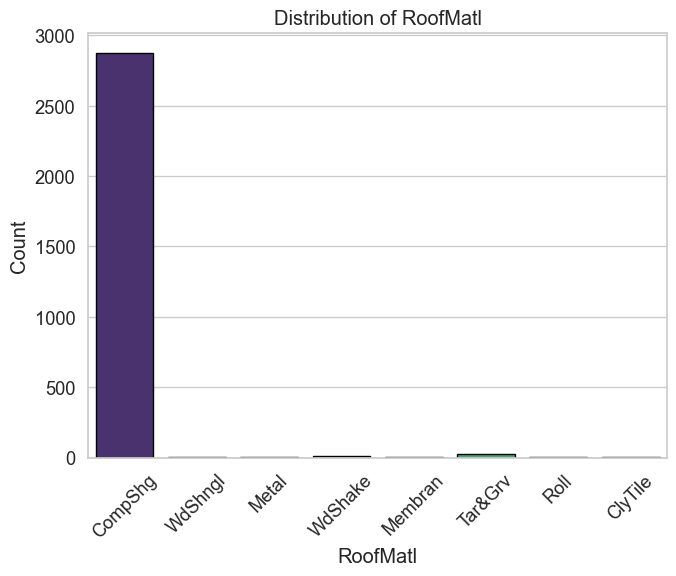

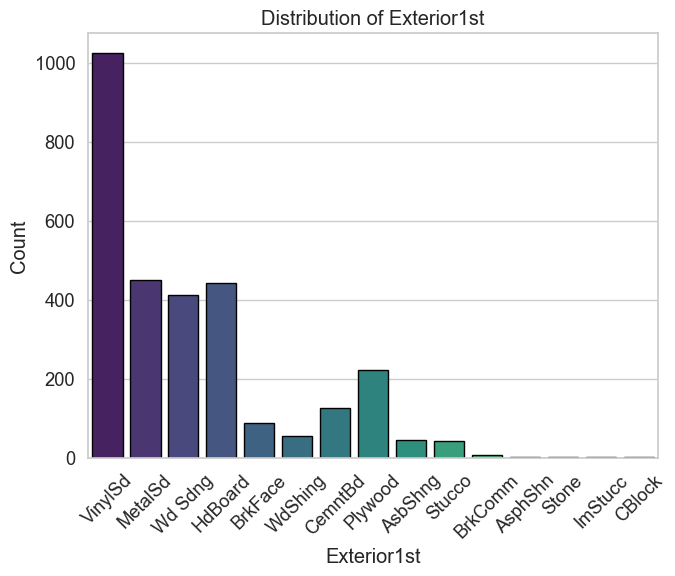

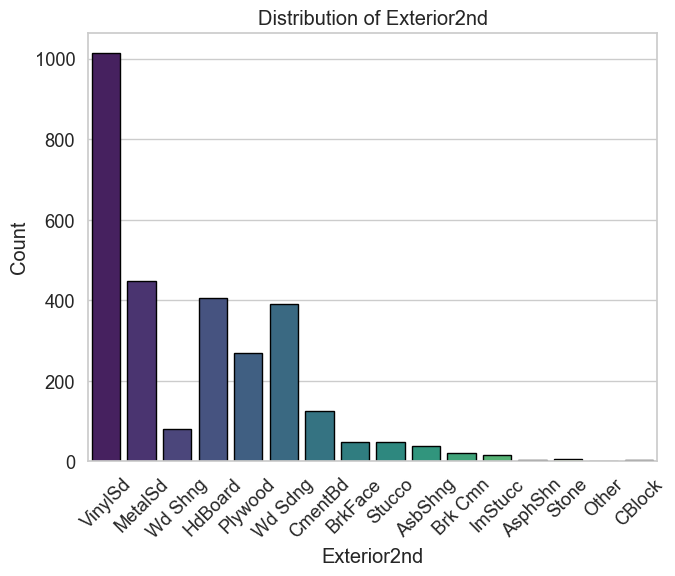

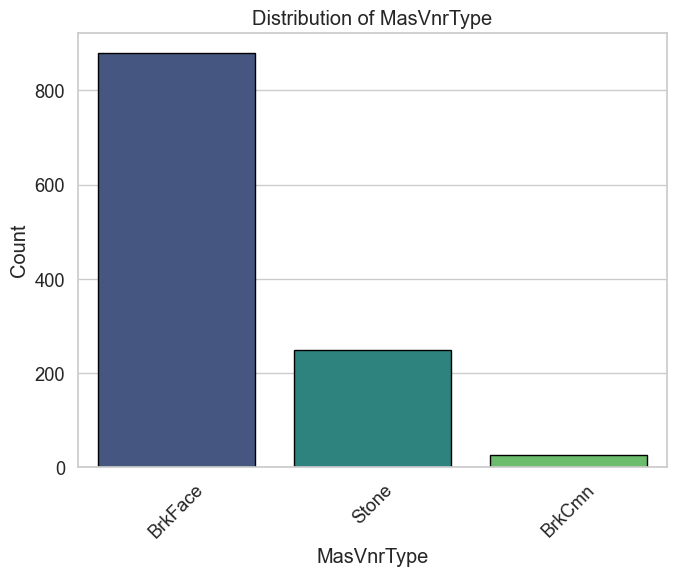

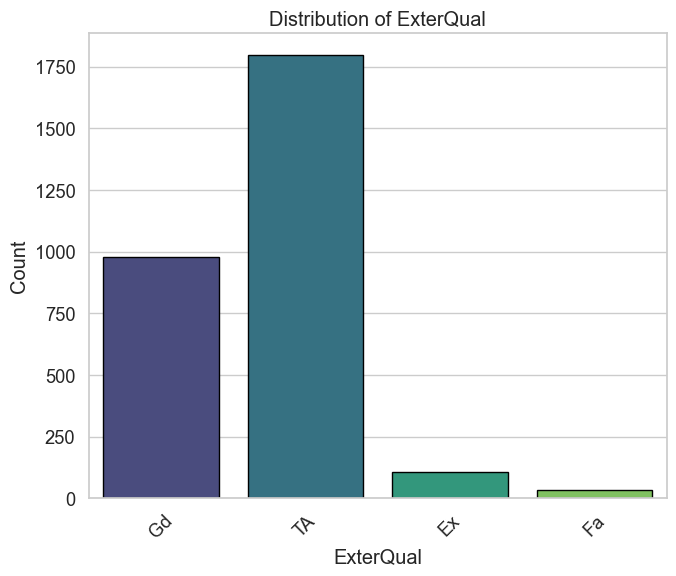

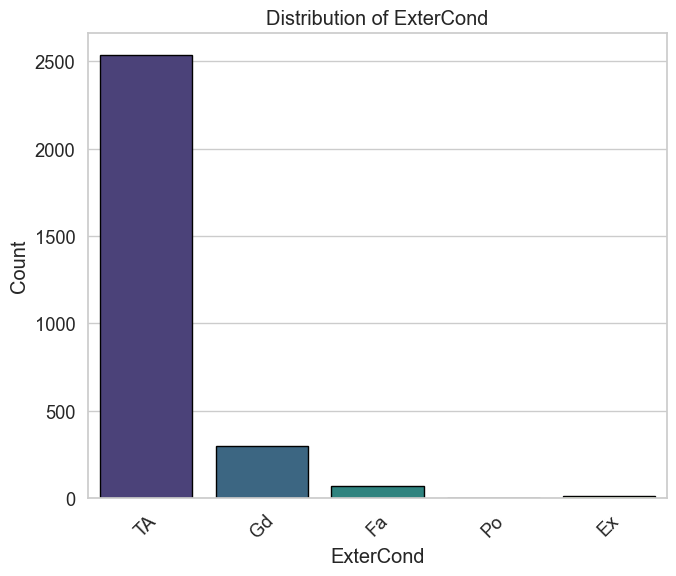

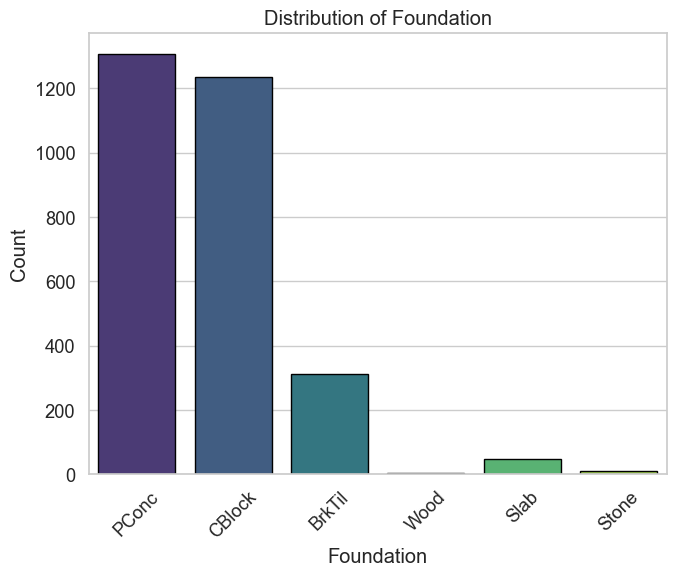

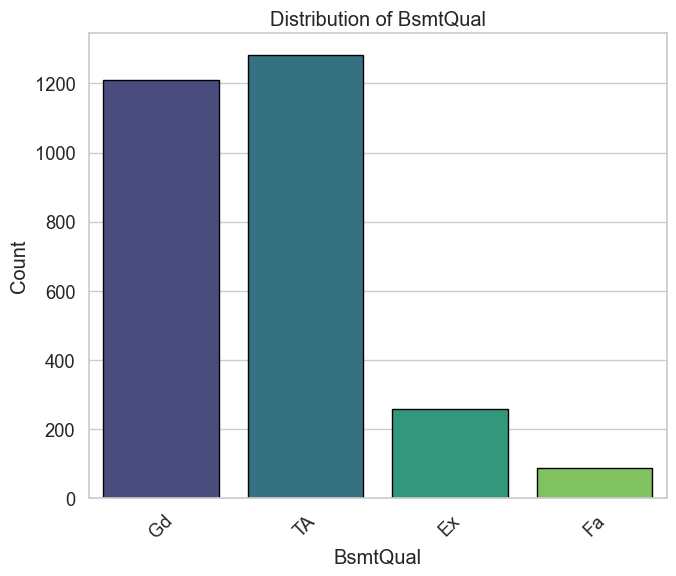

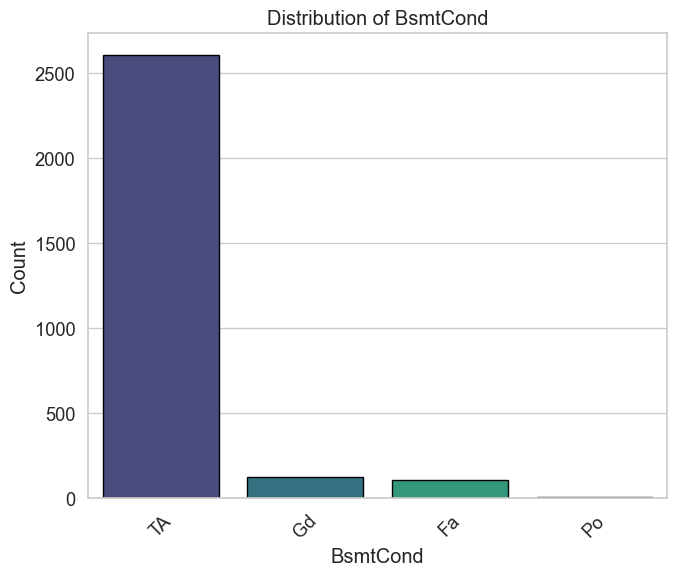

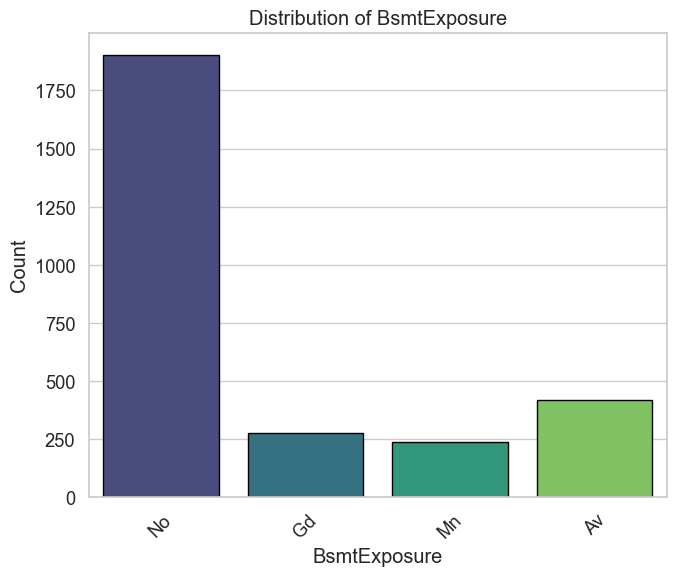

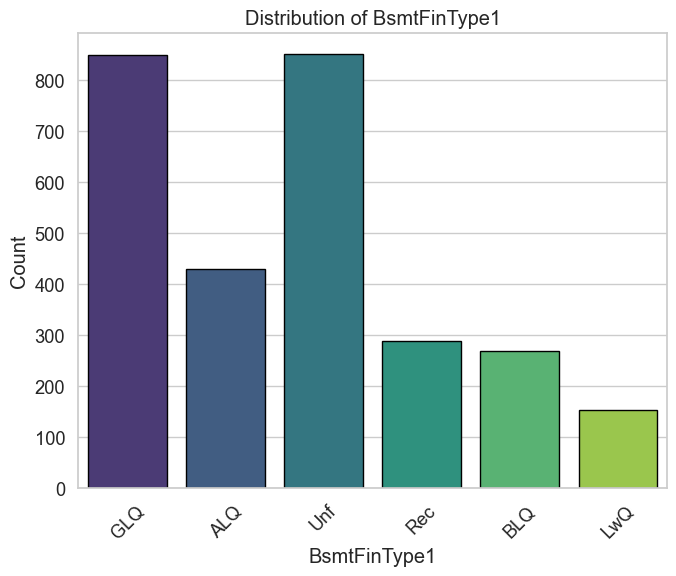

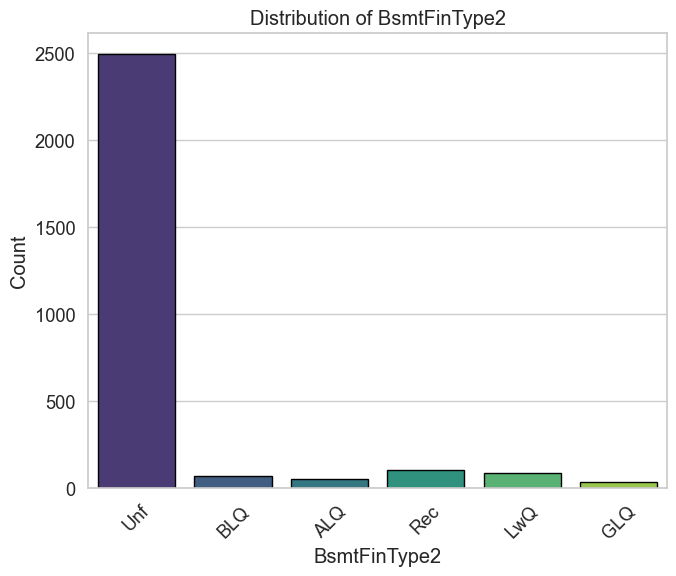

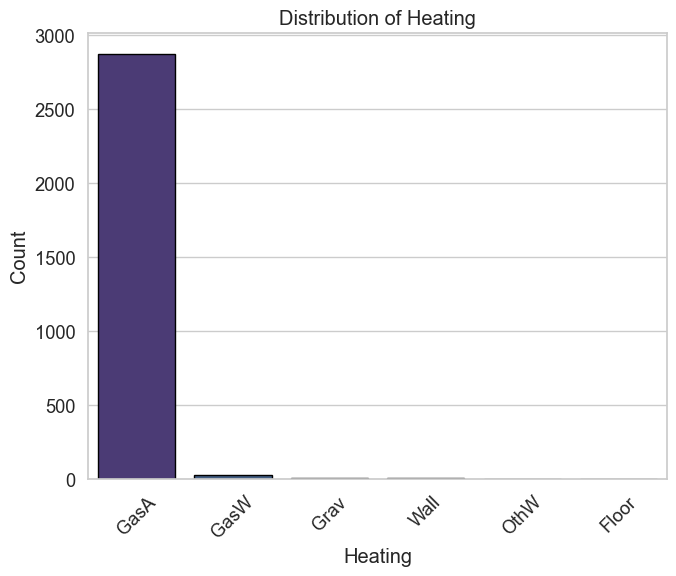

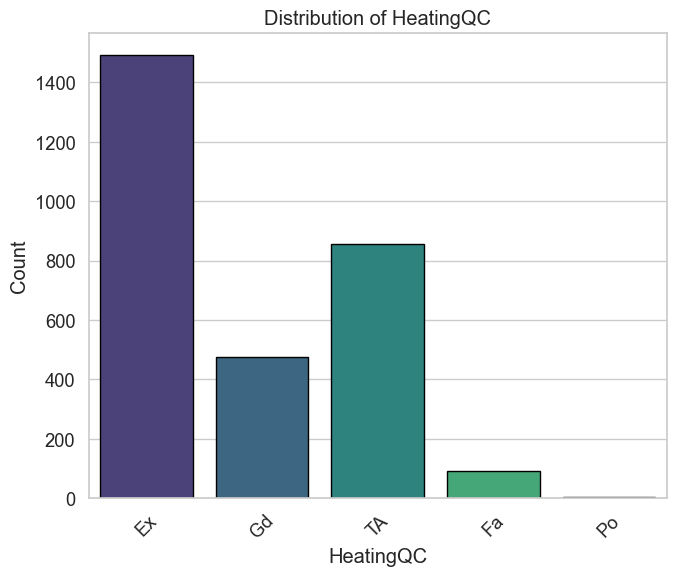

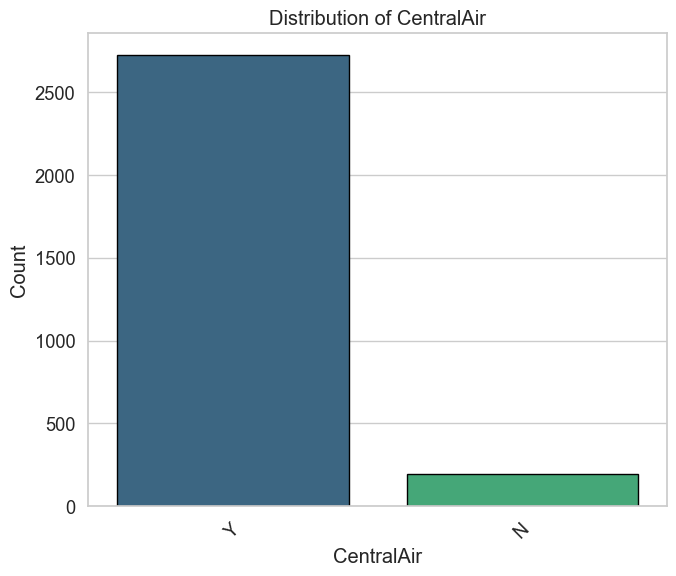

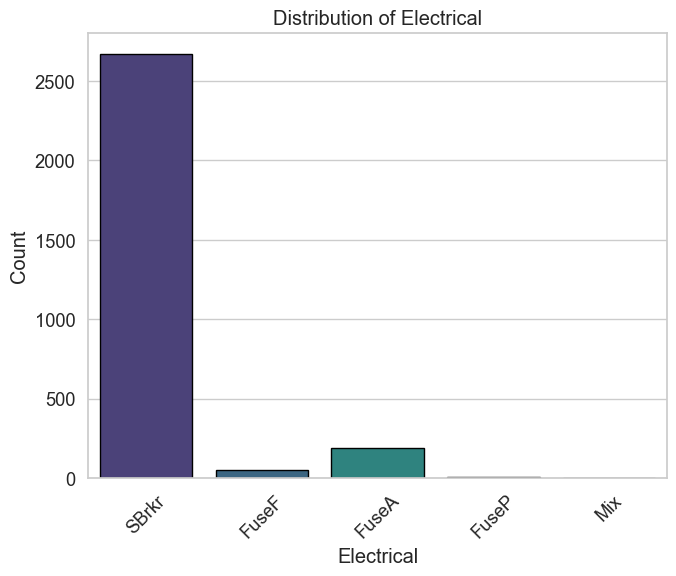

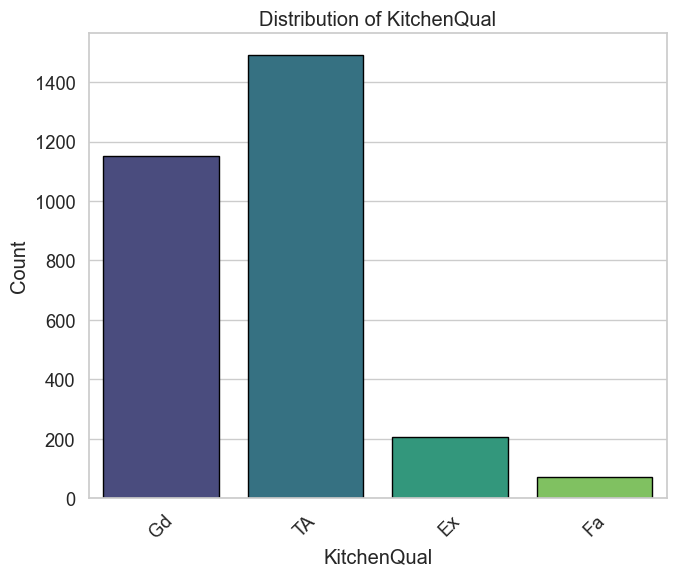

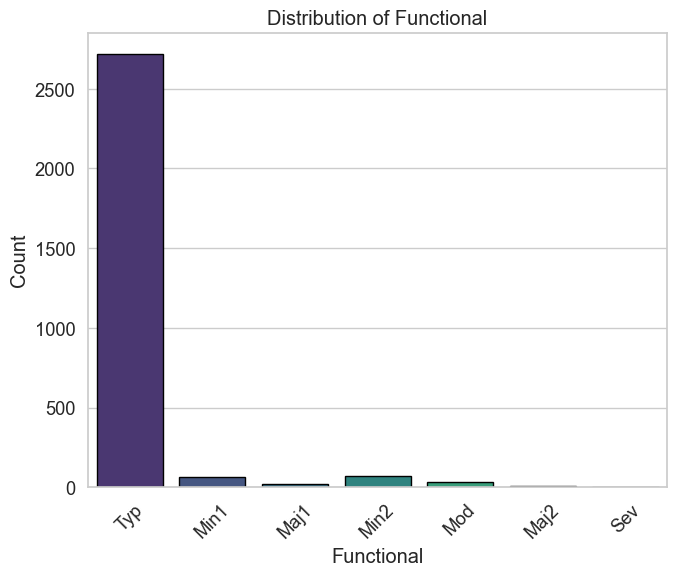

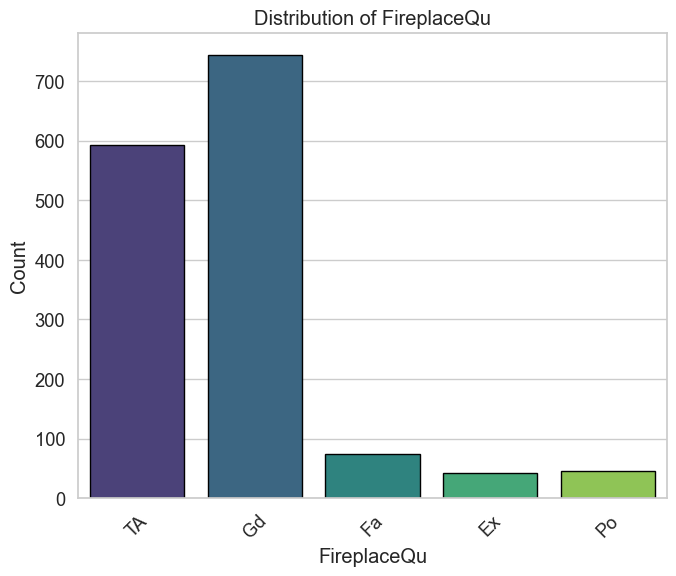

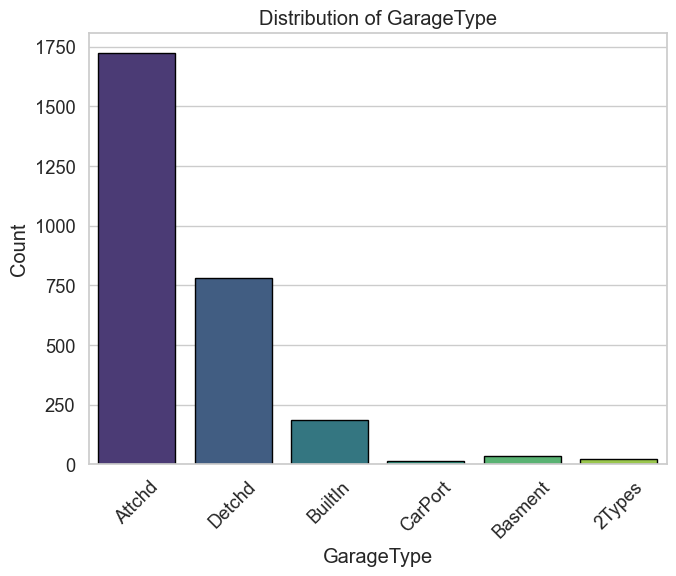

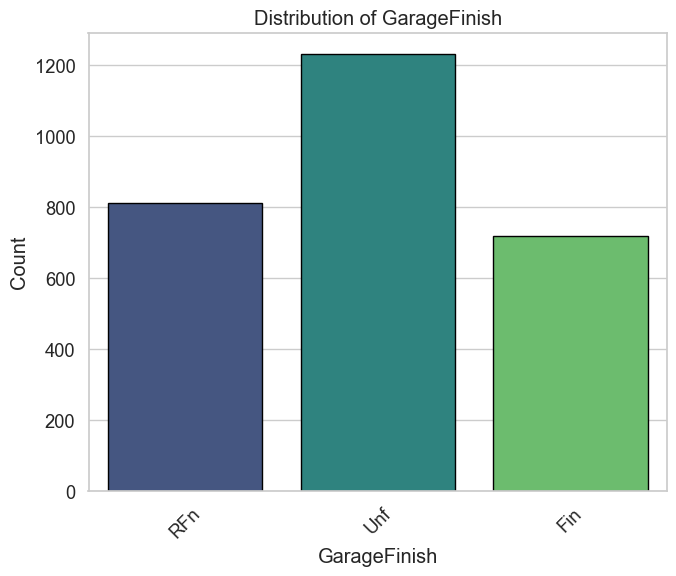

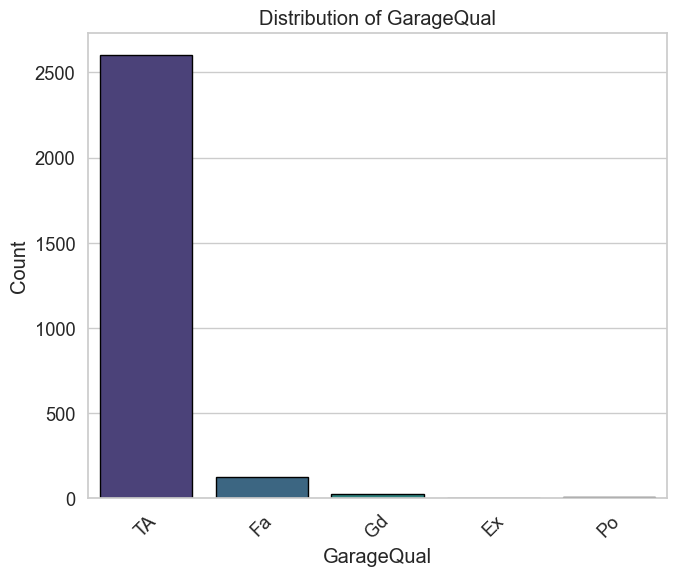

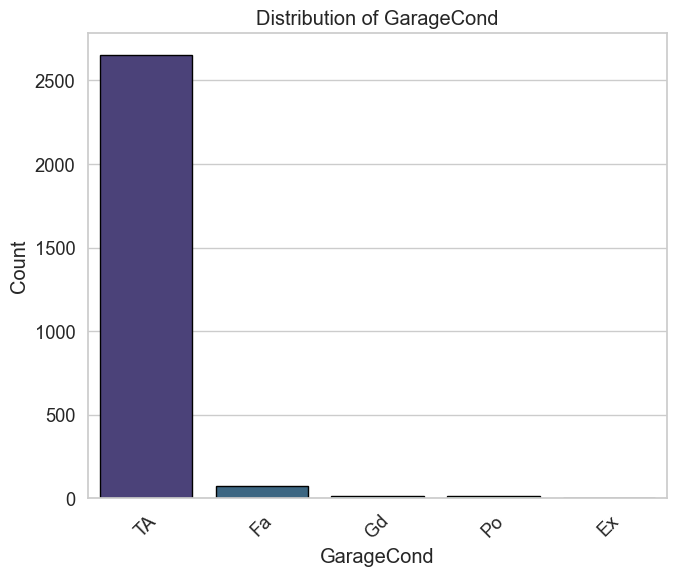

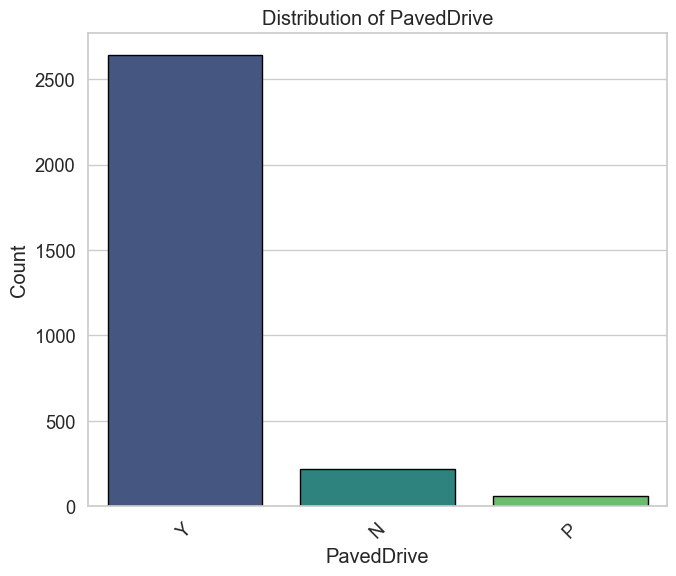

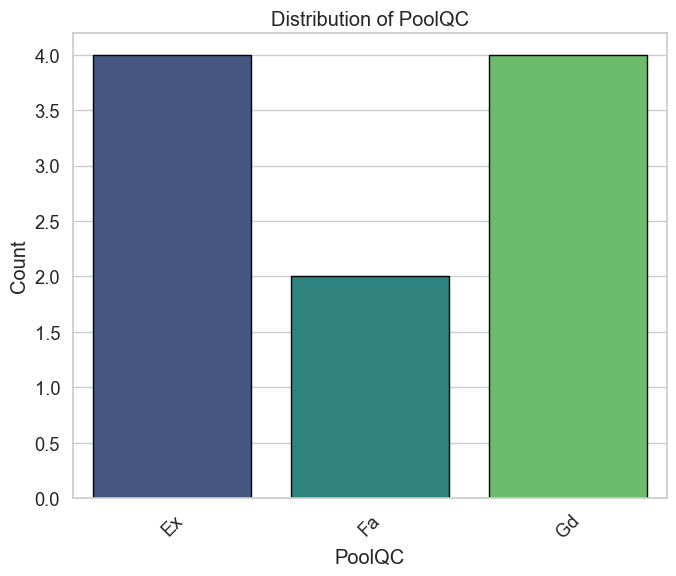

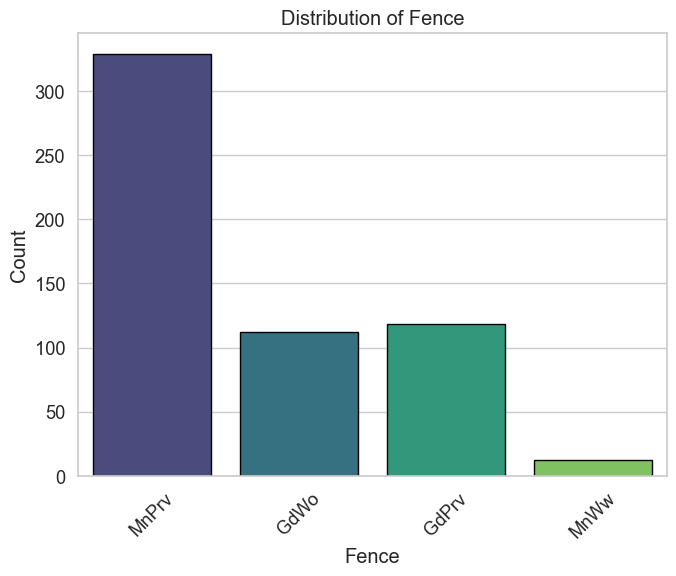

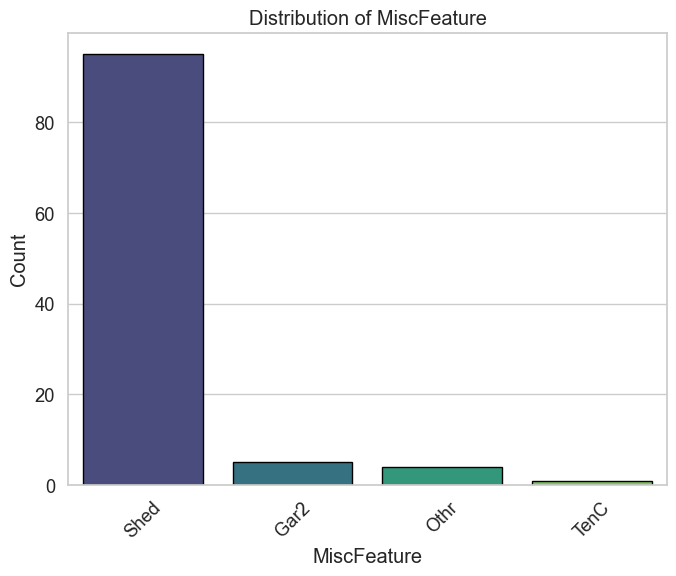

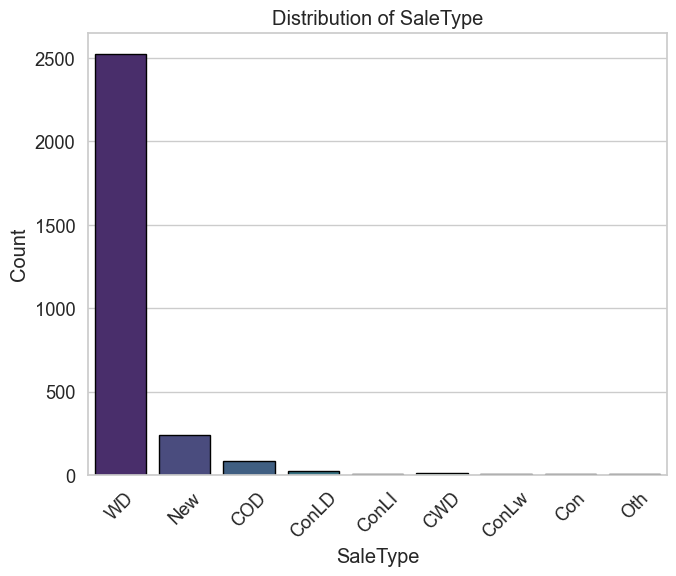

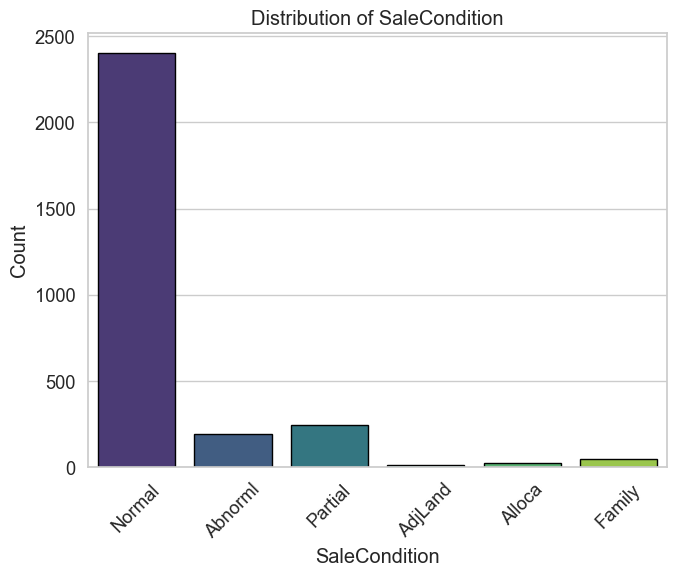

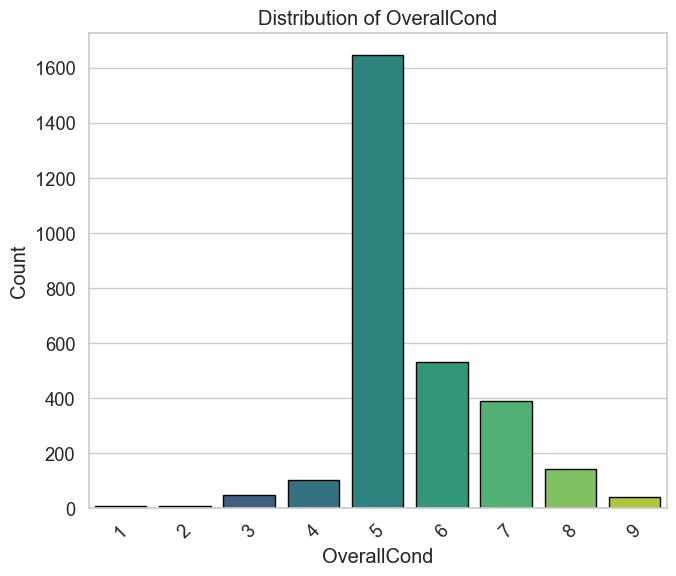

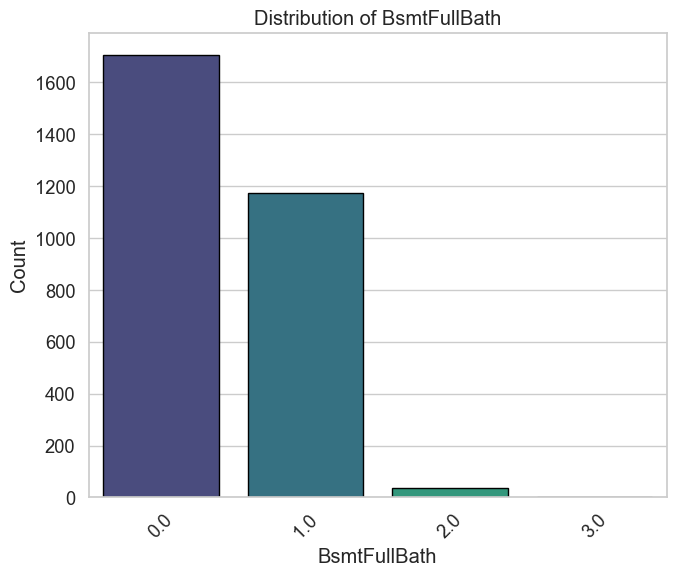

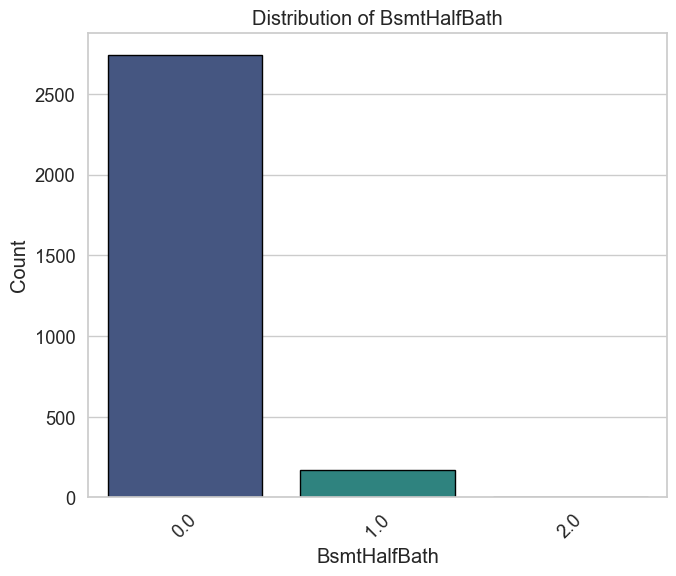

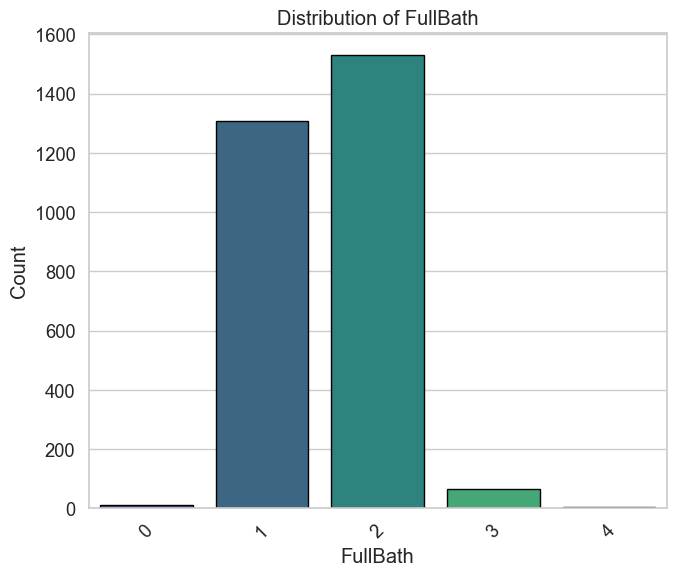

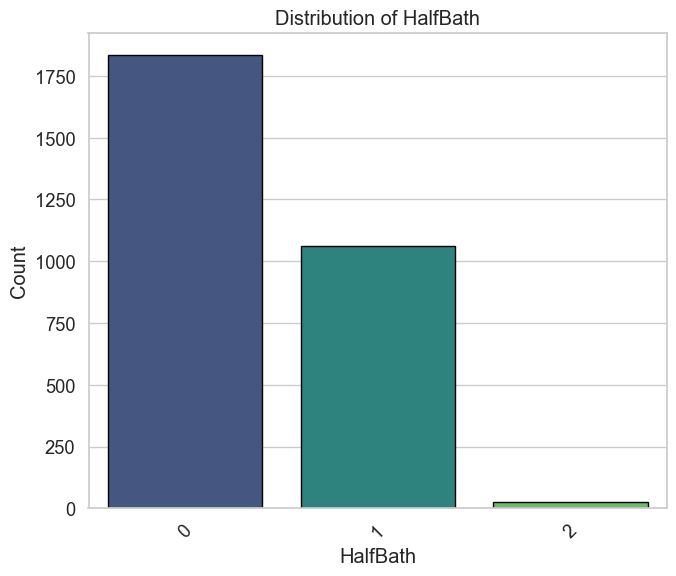

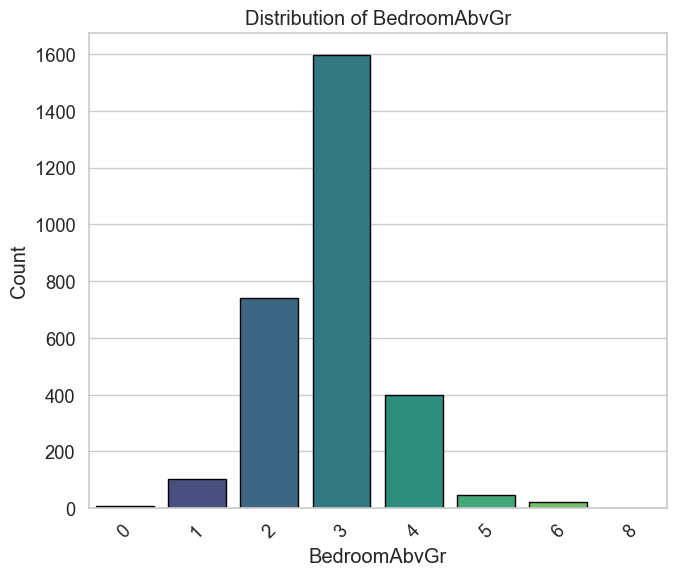

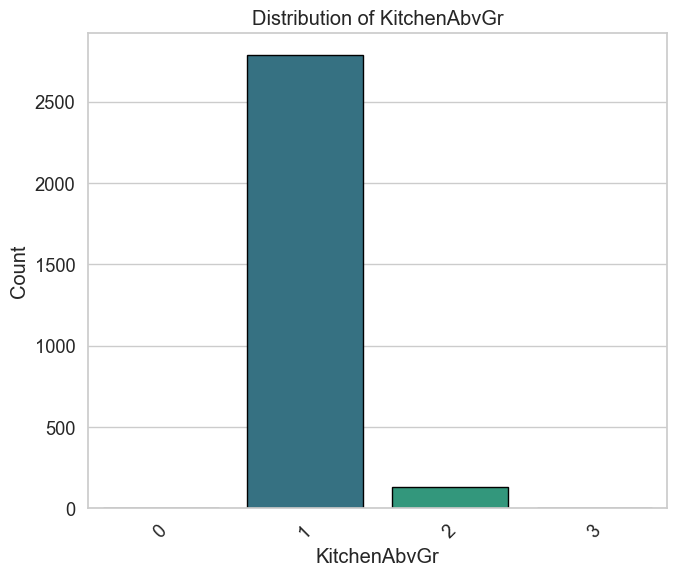

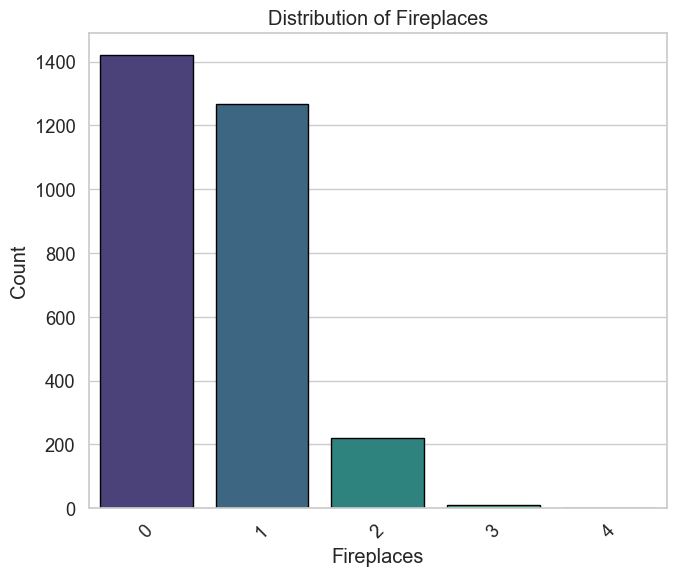

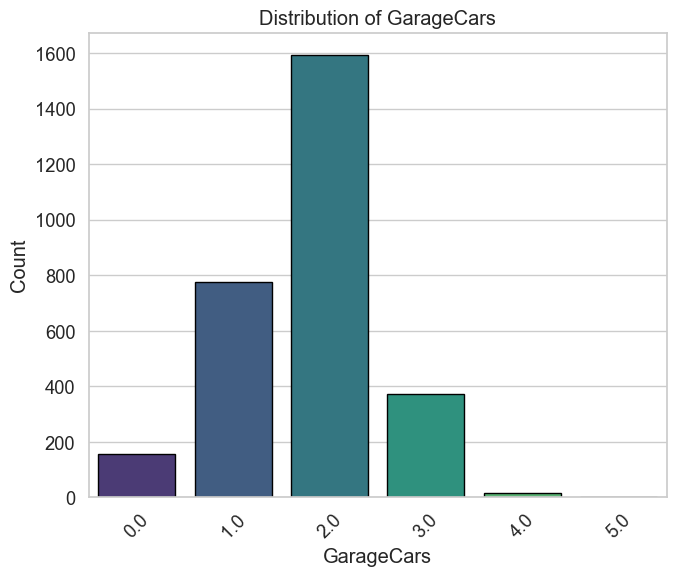

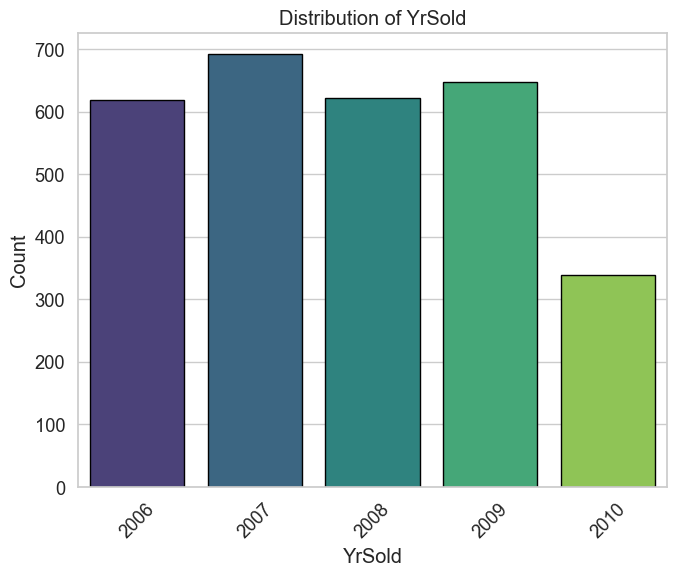

In [368]:
for col in cat_cols:
    to_analysis_cat(house, col, ratio=True, plot=True) #type:ignore 

#### 1.2.3 Analysis of Categorical Variables by Target
-   Function to comparision with means, ratio and count of categorical variables by the target variable.

In [369]:
def cat_by_target(dataframe, target, c_cols, plot=False):
    
    cat_tar = pd.DataFrame({'Target Mean': dataframe.groupby(c_cols)[target].mean(), 
                            'Count': dataframe[c_cols].value_counts(), 
                            'Ratio (%)': 100 * dataframe[c_cols].value_counts() / len(dataframe)})
    
    print('-' * 80)
    print(c_cols)
    print('-' * 80)
    print(cat_tar, end='\n\n\n')
    
    if plot:
        colors = ['#6c94dc','#b1cffc', '#94bcfb', '#c4dcfc']
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
            
           # Violin plot of the target variable by category
        sns.violinplot(x=c_cols, y=target, data=dataframe, ax=ax1, palette='coolwarm', inner='box')
        ax1.set_title(f'{target} Distribution by {c_cols} (Violin Plot)')
        ax1.set_ylabel(target)
        ax1.set_xlabel(c_cols)
        
        # Point plot of the target mean by category
        sns.pointplot(x=c_cols, y=target, data=dataframe, ax=ax2, palette='coolwarm', ci='sd', markers='o')
        ax2.set_title(f'{target} Mean by {c_cols} (Point Plot)')
        ax2.set_ylabel(f'Mean {target}')
        ax2.set_xlabel(c_cols)
           
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.tight_layout()
        plt.show()

--------------------------------------------------------------------------------
MSZoning
--------------------------------------------------------------------------------
          Target Mean  Count  Ratio (%)
MSZoning                               
C (all)     74528.000     25      0.856
FV         214014.062    139      4.762
RH         131558.375     26      0.891
RL         191004.995   2265     77.595
RM         126316.830    460     15.759




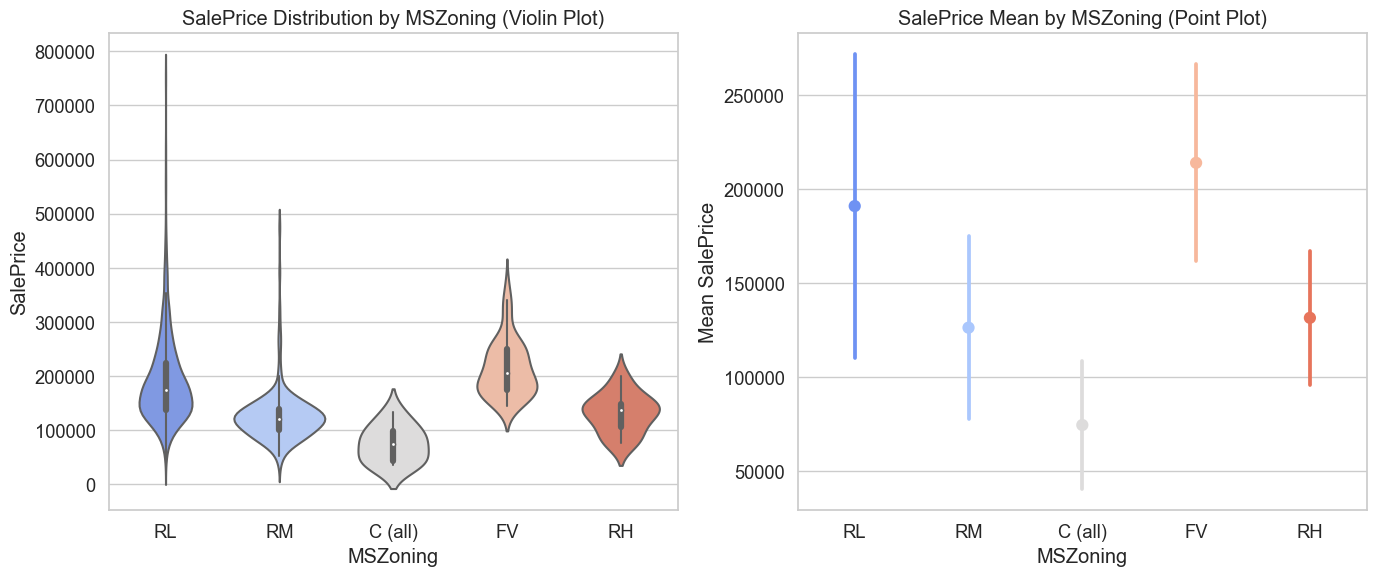

--------------------------------------------------------------------------------
Street
--------------------------------------------------------------------------------
        Target Mean  Count  Ratio (%)
Street                               
Grvl     130190.500     12      0.411
Pave     181130.539   2907     99.589




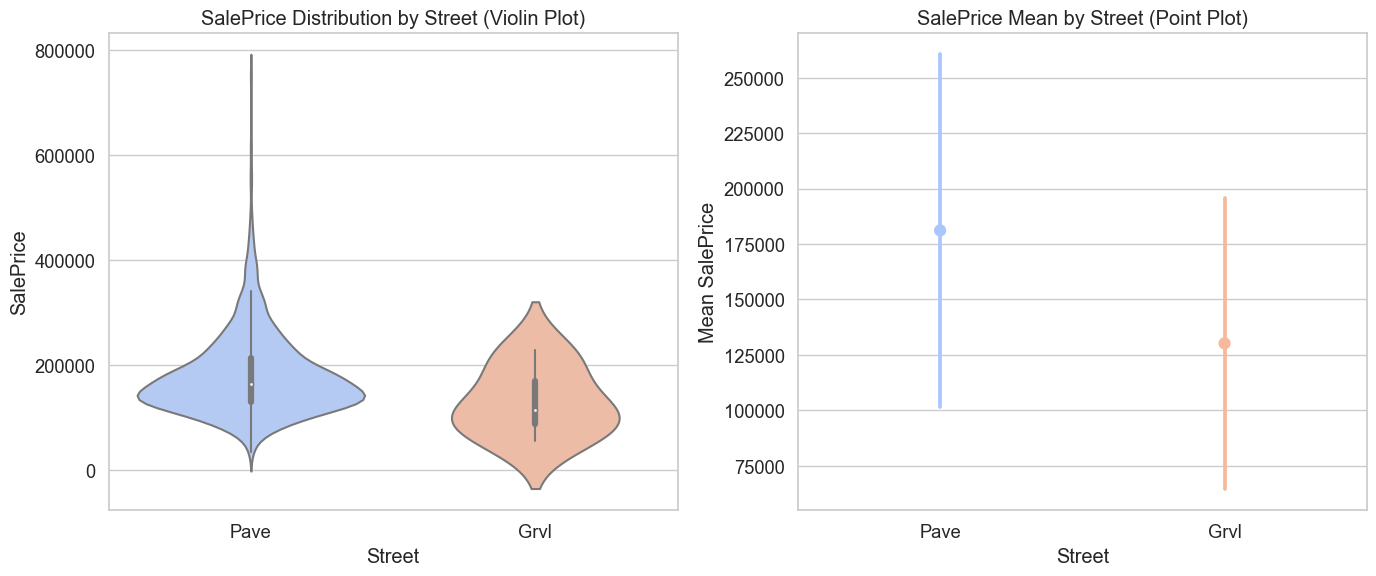

--------------------------------------------------------------------------------
Alley
--------------------------------------------------------------------------------
       Target Mean  Count  Ratio (%)
Alley                               
Grvl    122219.080    120      4.111
Pave    168000.585     78      2.672




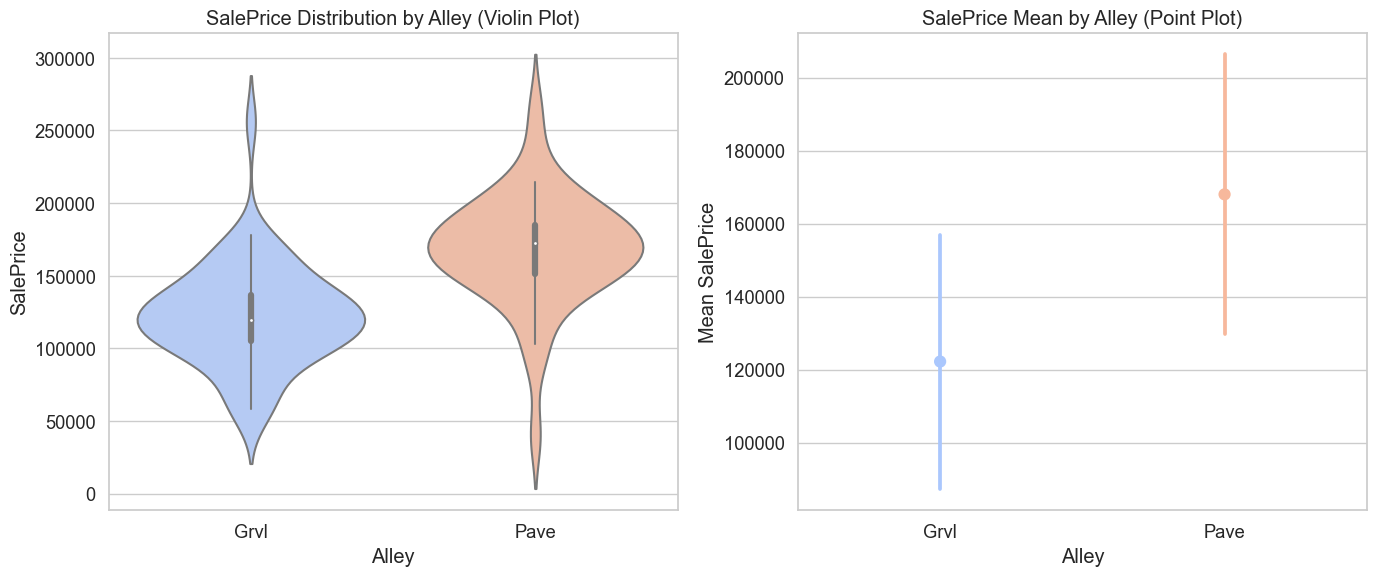

--------------------------------------------------------------------------------
LotShape
--------------------------------------------------------------------------------
          Target Mean  Count  Ratio (%)
LotShape                               
IR1        206101.665    968     33.162
IR2        239833.366     76      2.604
IR3        216036.500     16      0.548
Reg        164754.818   1859     63.686




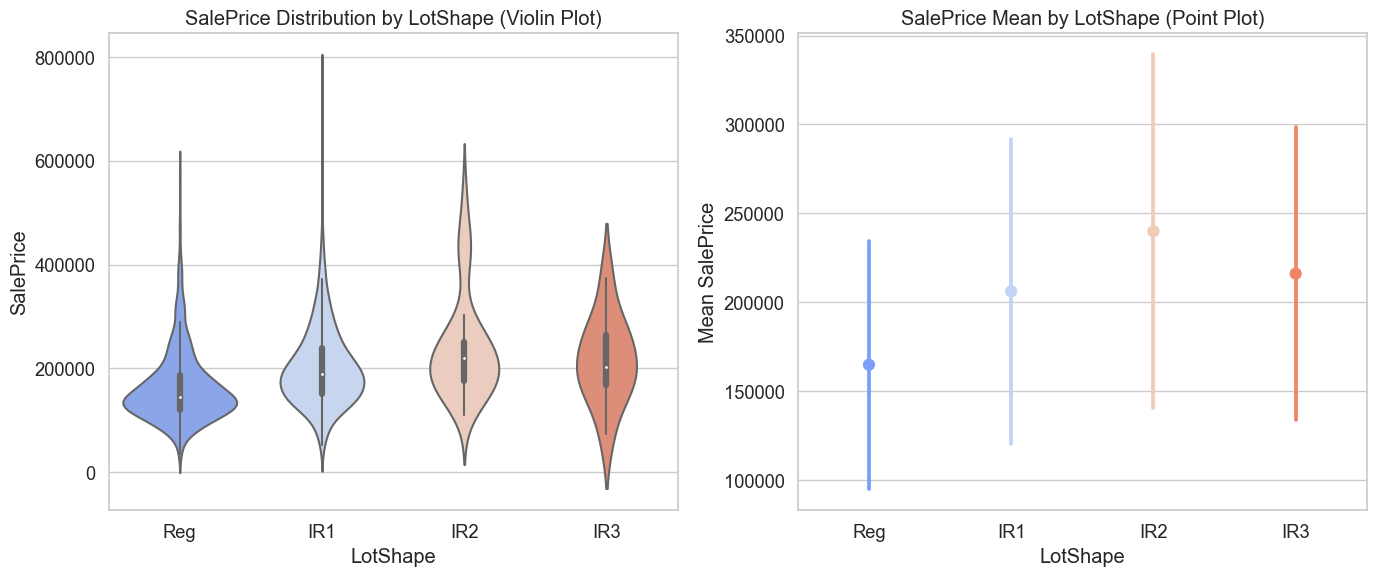

--------------------------------------------------------------------------------
LandContour
--------------------------------------------------------------------------------
             Target Mean  Count  Ratio (%)
LandContour                               
Bnk           143104.079    117      4.008
HLS           231533.940    120      4.111
Low           203661.111     60      2.055
Lvl           180183.747   2622     89.825




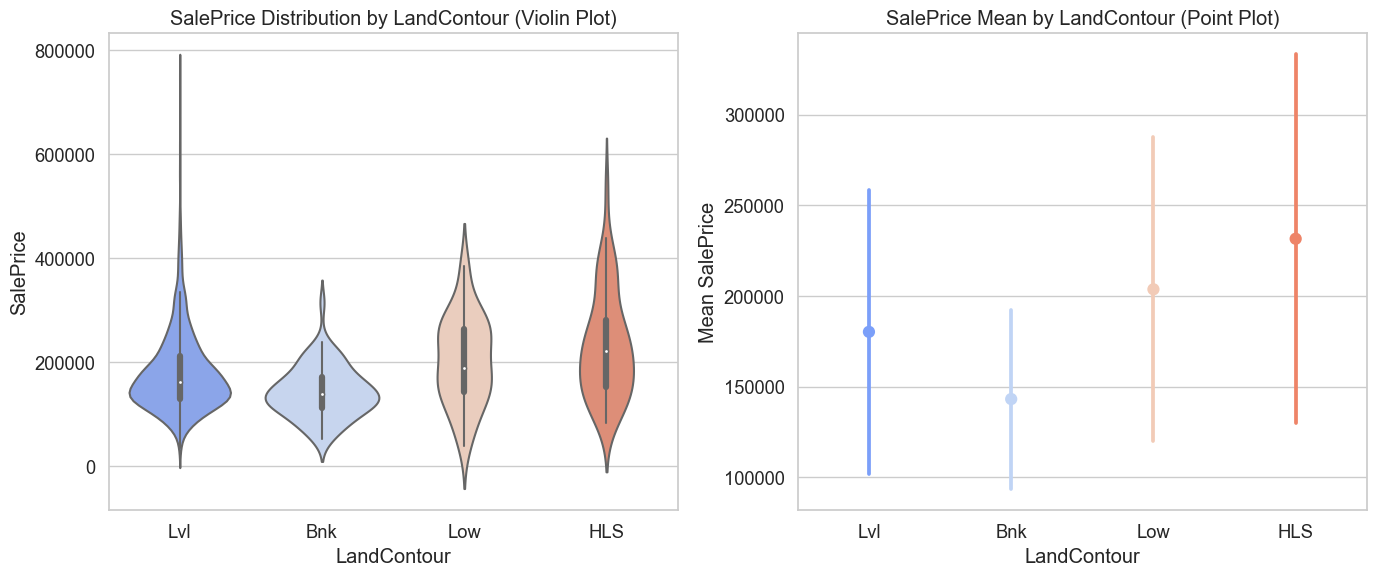

--------------------------------------------------------------------------------
Utilities
--------------------------------------------------------------------------------
           Target Mean  Count  Ratio (%)
Utilities                               
AllPub      180950.957   2916     99.897
NoSeWa      137500.000      1      0.034




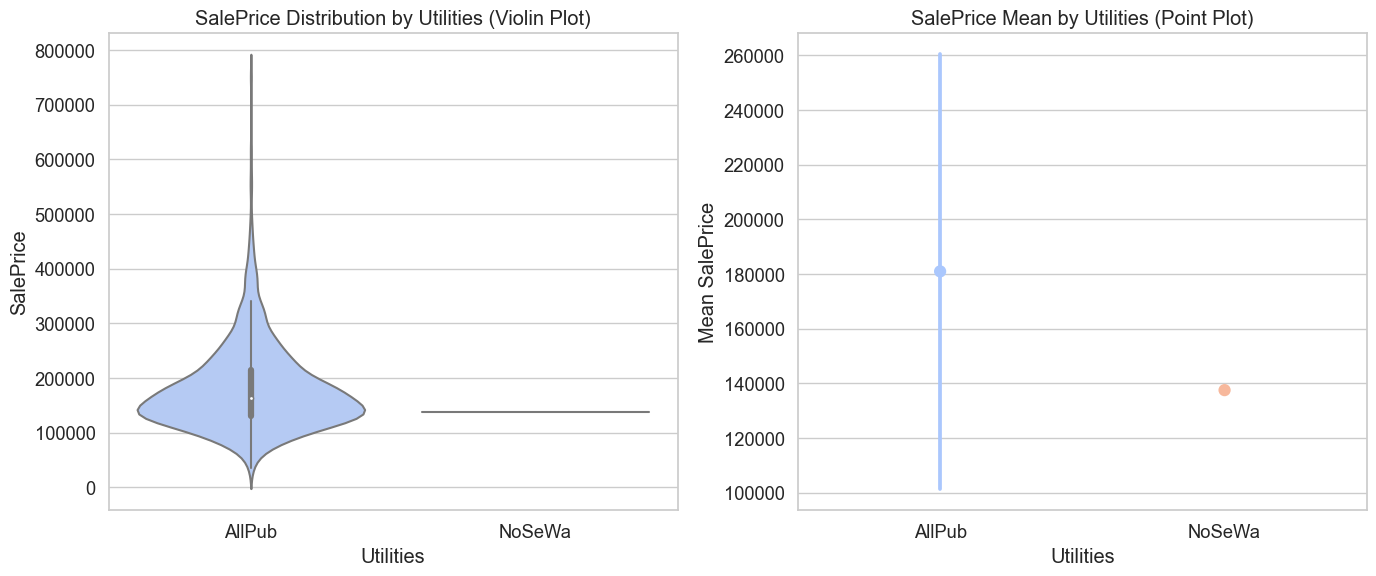

--------------------------------------------------------------------------------
LotConfig
--------------------------------------------------------------------------------
           Target Mean  Count  Ratio (%)
LotConfig                               
Corner      181623.426    511     17.506
CulDSac     223854.617    176      6.029
FR2         177934.574     85      2.912
FR3         208475.000     14      0.480
Inside      176938.048   2133     73.073




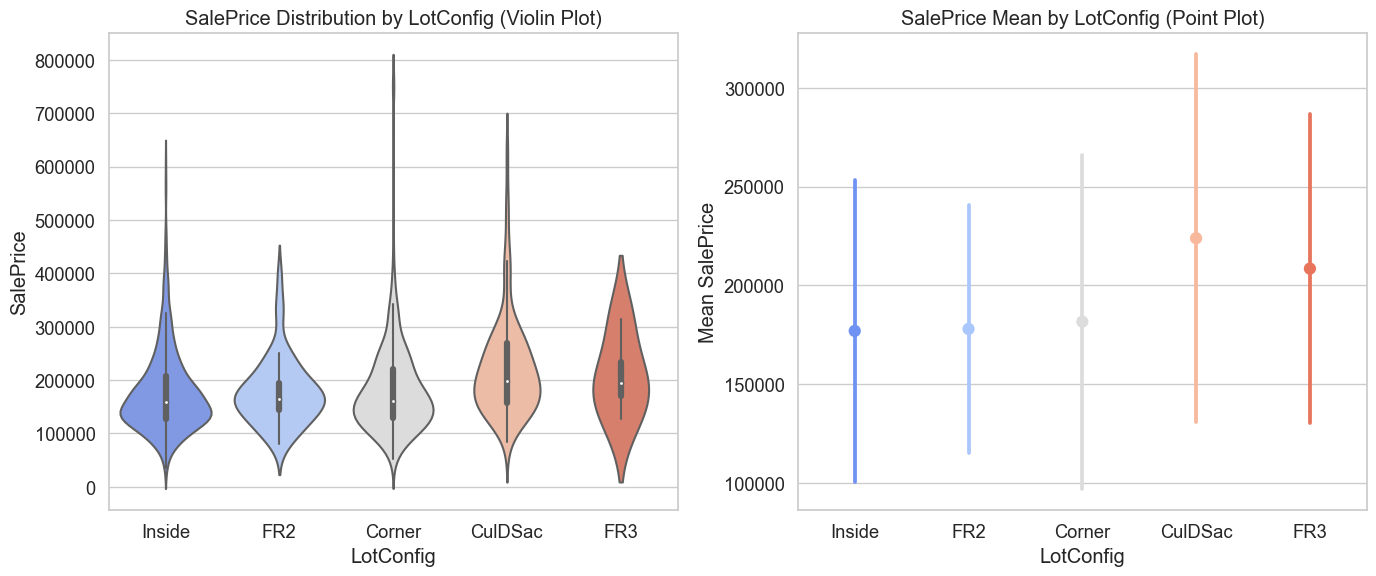

--------------------------------------------------------------------------------
LandSlope
--------------------------------------------------------------------------------
           Target Mean  Count  Ratio (%)
LandSlope                               
Gtl         179956.800   2778     95.170
Mod         196734.138    125      4.282
Sev         204379.231     16      0.548




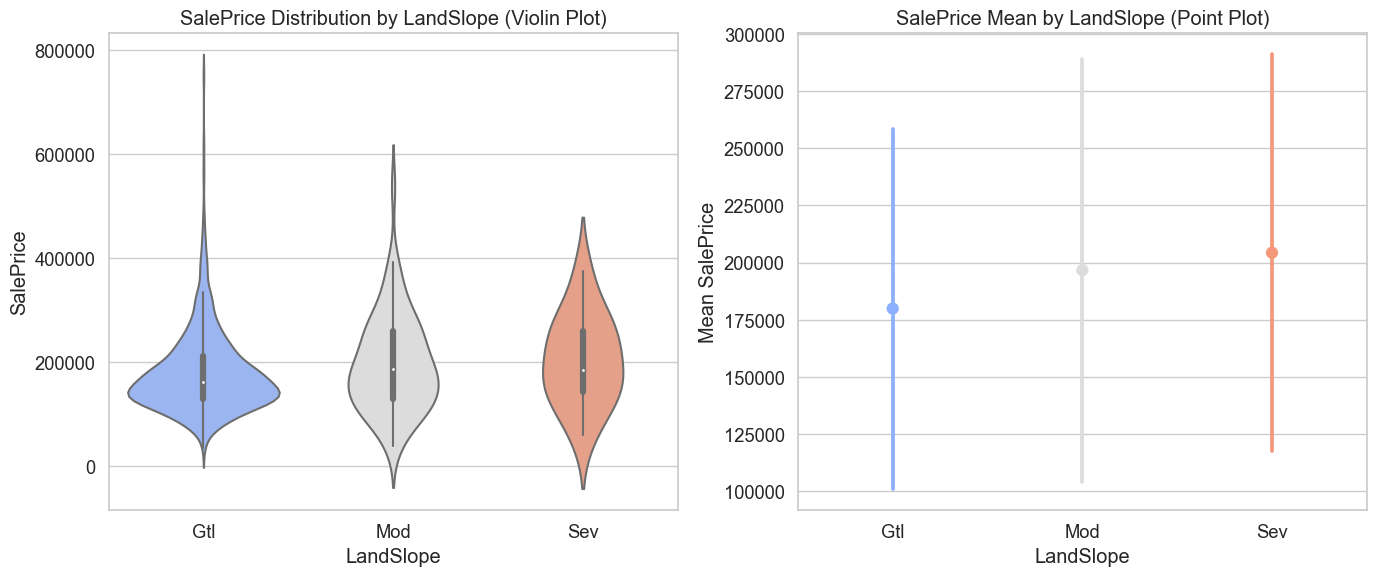

--------------------------------------------------------------------------------
Neighborhood
--------------------------------------------------------------------------------
              Target Mean  Count  Ratio (%)
Neighborhood                               
Blmngtn        194870.882     28      0.959
Blueste        137500.000     10      0.343
BrDale         104493.750     30      1.028
BrkSide        124834.052    108      3.700
ClearCr        212565.429     44      1.507
CollgCr        197965.773    267      9.147
Crawfor        210624.725    103      3.529
Edwards        128219.700    194      6.646
Gilbert        192854.506    165      5.653
IDOTRR         100123.784     93      3.186
MeadowV         98576.471     37      1.268
Mitchel        156270.122    114      3.905
NAmes          145847.080    443     15.176
NPkVill        142694.444     23      0.788
NWAmes         189050.068    131      4.488
NoRidge        335295.317     71      2.432
NridgHt        316270.623    166 

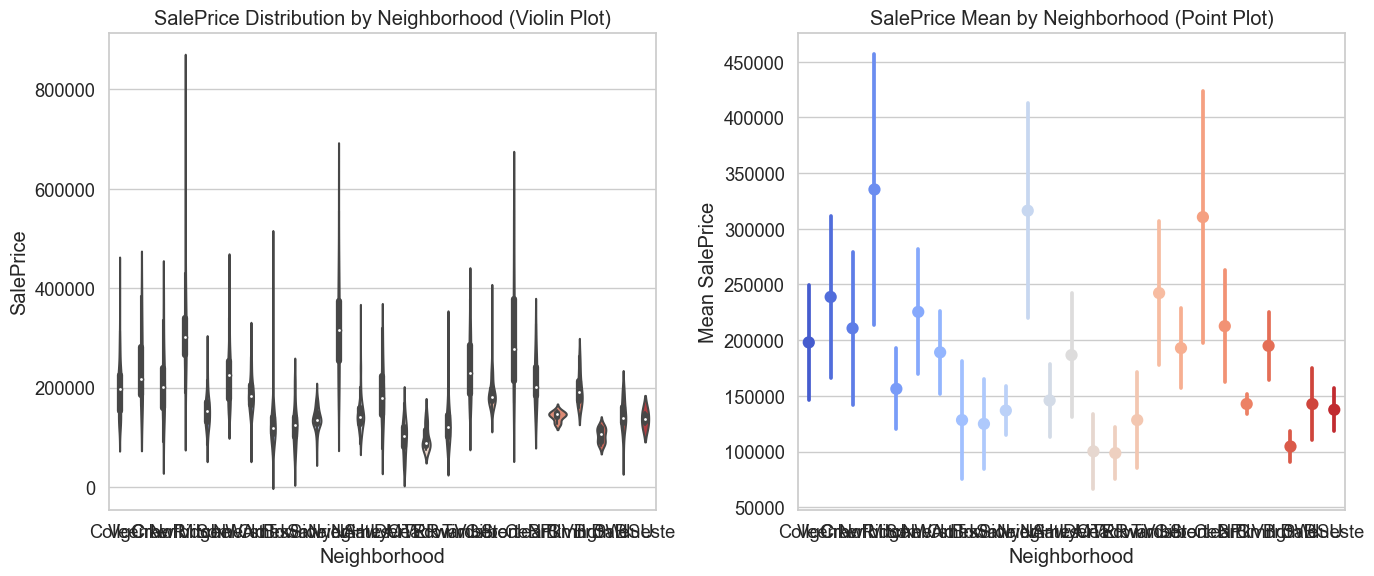

--------------------------------------------------------------------------------
Condition1
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
Condition1                               
Artery       135091.667     92      3.152
Feedr        142475.481    164      5.618
Norm         184495.492   2511     86.023
PosA         225875.000     20      0.685
PosN         215184.211     39      1.336
RRAe         138400.000     28      0.959
RRAn         184396.615     50      1.713
RRNe         190750.000      6      0.206
RRNn         212400.000      9      0.308




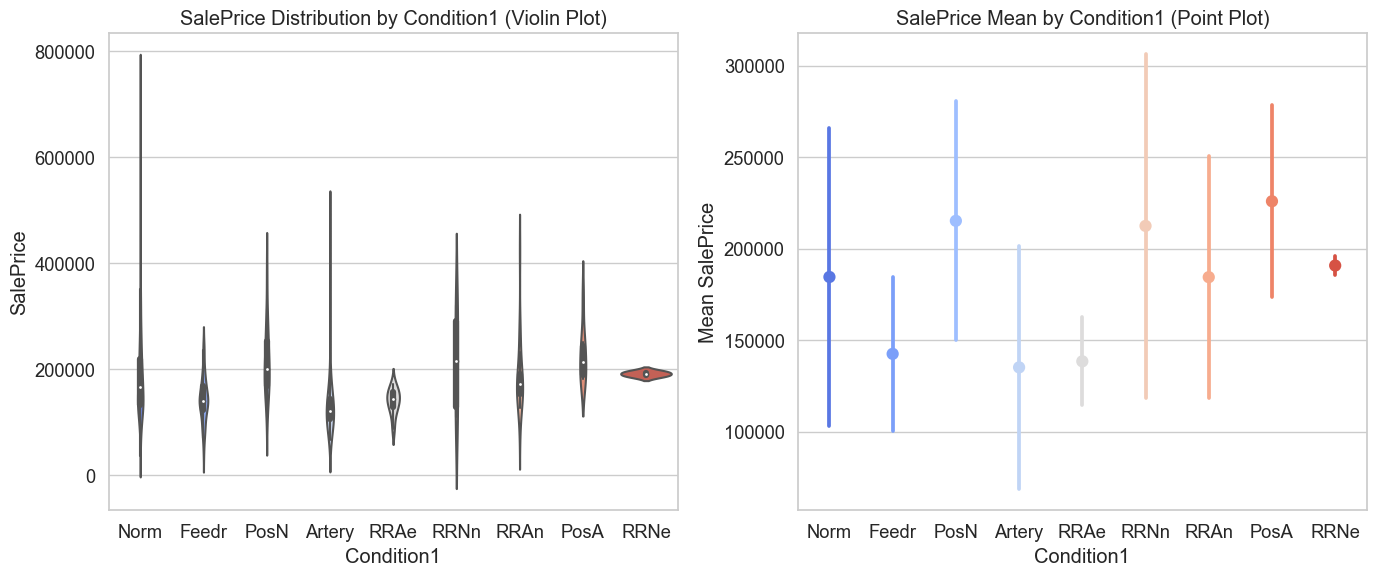

--------------------------------------------------------------------------------
Condition2
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
Condition2                               
Artery       106500.000      5      0.171
Feedr        121166.667     13      0.445
Norm         181169.406   2889     98.972
PosA         325000.000      4      0.137
PosN         284875.000      4      0.137
RRAe         190000.000      1      0.034
RRAn         136905.000      1      0.034
RRNn          96750.000      2      0.069




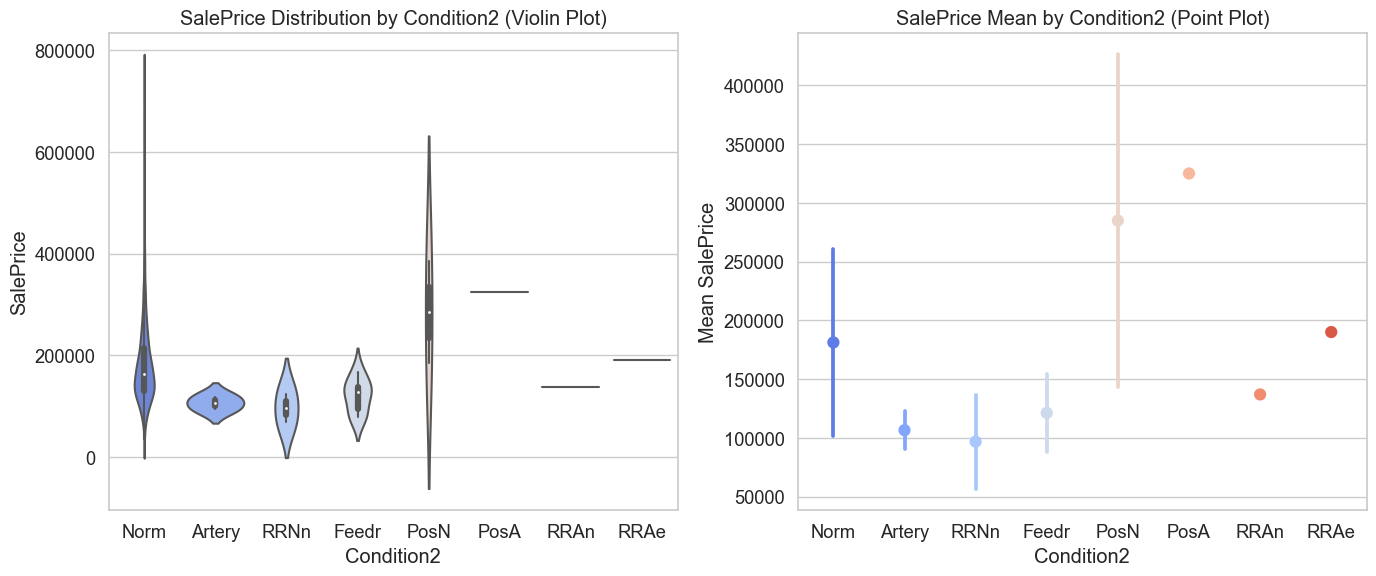

--------------------------------------------------------------------------------
BldgType
--------------------------------------------------------------------------------
          Target Mean  Count  Ratio (%)
BldgType                               
1Fam       185763.807   2425     83.076
2fmCon     128432.258     62      2.124
Duplex     133541.077    109      3.734
Twnhs      135911.628     96      3.289
TwnhsE     181959.342    227      7.777




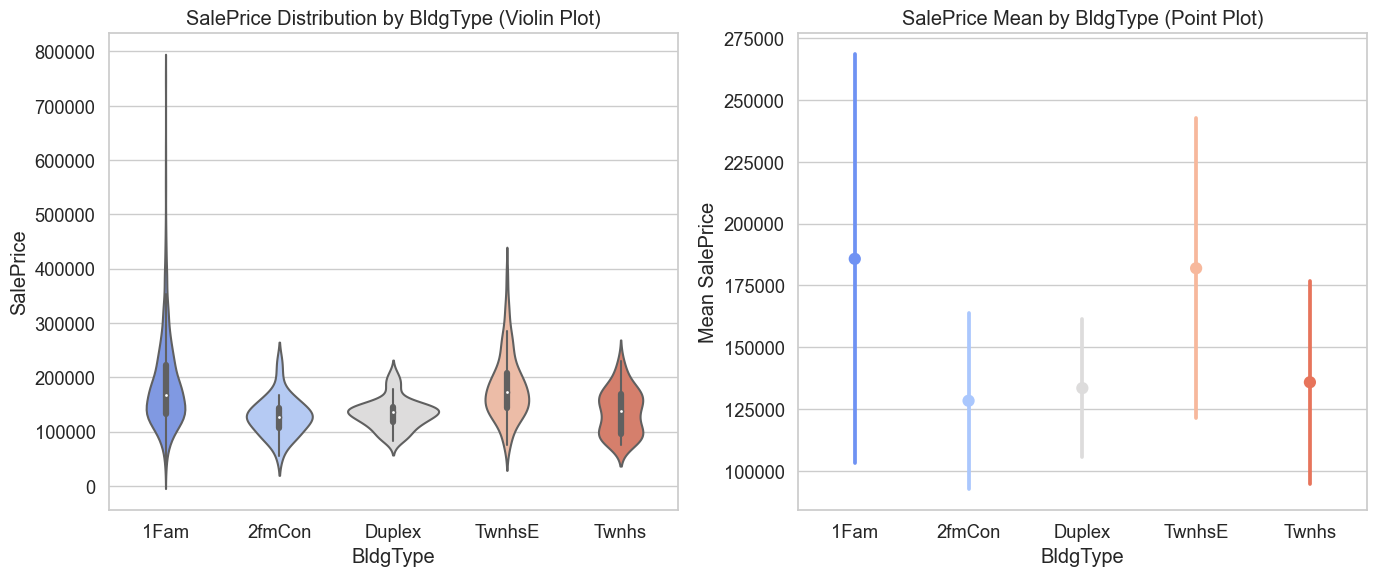

--------------------------------------------------------------------------------
HouseStyle
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
HouseStyle                               
1.5Fin       143116.740    314     10.757
1.5Unf       110150.000     19      0.651
1Story       175985.478   1471     50.394
2.5Fin       220000.000      8      0.274
2.5Unf       157354.545     24      0.822
2Story       210051.764    872     29.873
SFoyer       135074.486     83      2.843
SLvl         166703.385    128      4.385




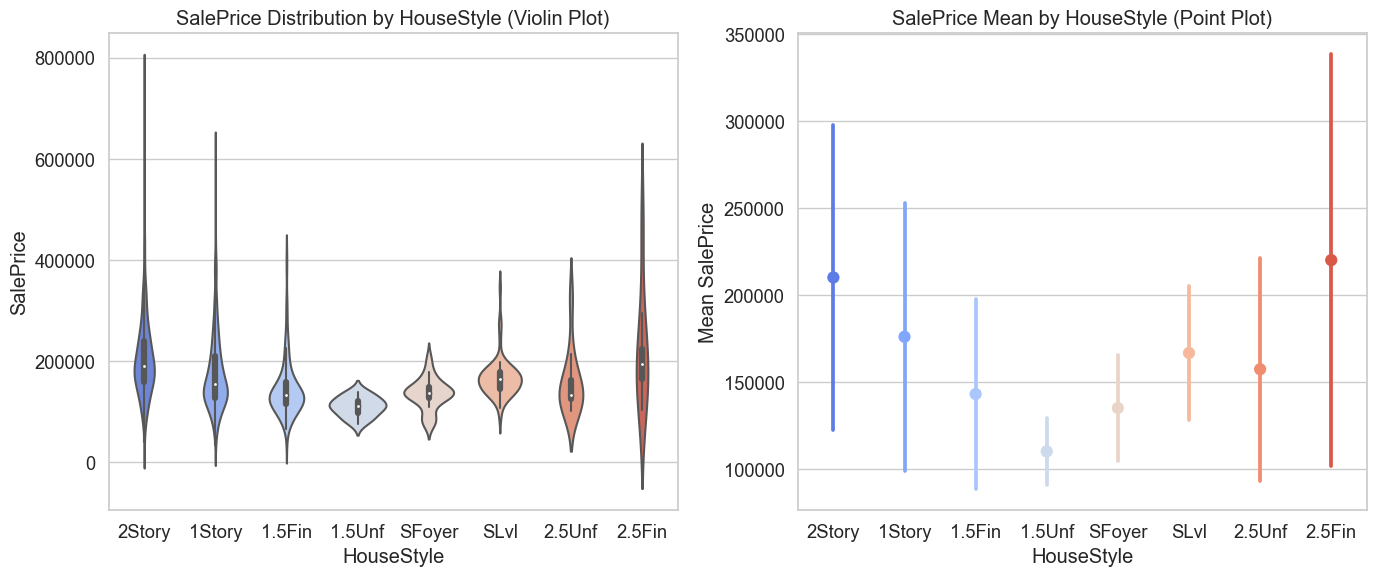

--------------------------------------------------------------------------------
RoofStyle
--------------------------------------------------------------------------------
           Target Mean  Count  Ratio (%)
RoofStyle                               
Flat        194690.000     20      0.685
Gable       171483.956   2310     79.137
Gambrel     148909.091     22      0.754
Hip         218876.934    551     18.876
Mansard     180568.429     11      0.377
Shed        225000.000      5      0.171




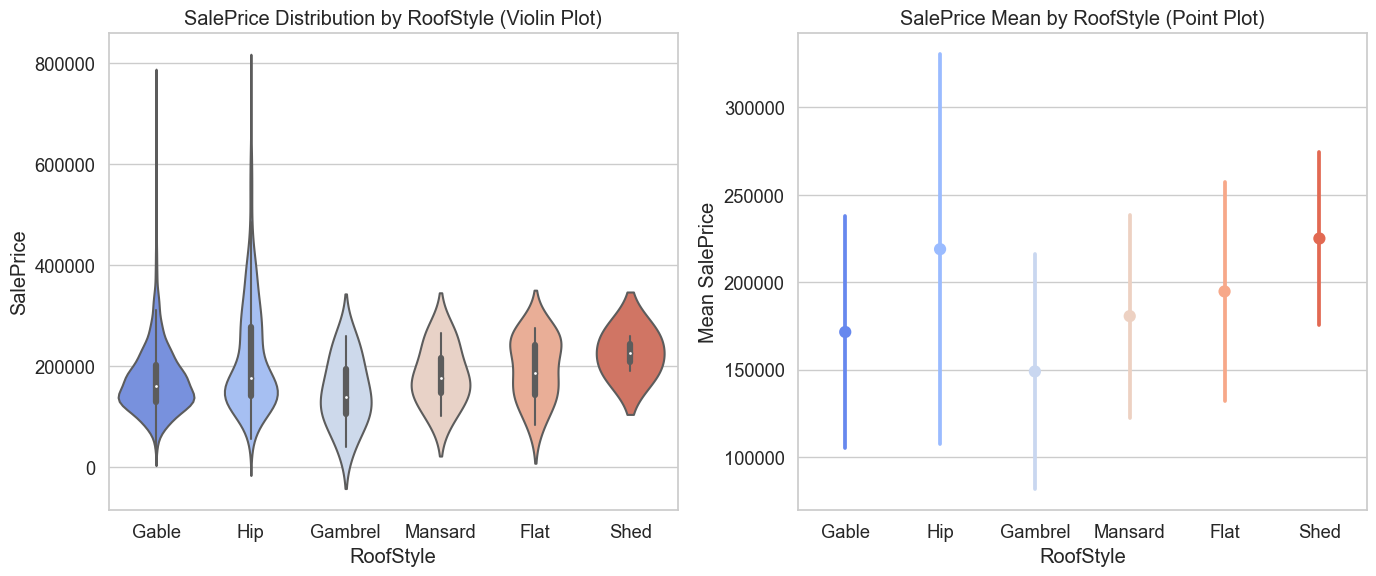

--------------------------------------------------------------------------------
RoofMatl
--------------------------------------------------------------------------------
          Target Mean  Count  Ratio (%)
RoofMatl                               
ClyTile    160000.000      1      0.034
CompShg    179803.679   2876     98.527
Membran    241500.000      1      0.034
Metal      180000.000      1      0.034
Roll       137000.000      1      0.034
Tar&Grv    185406.364     23      0.788
WdShake    241400.000      9      0.308
WdShngl    390250.000      7      0.240




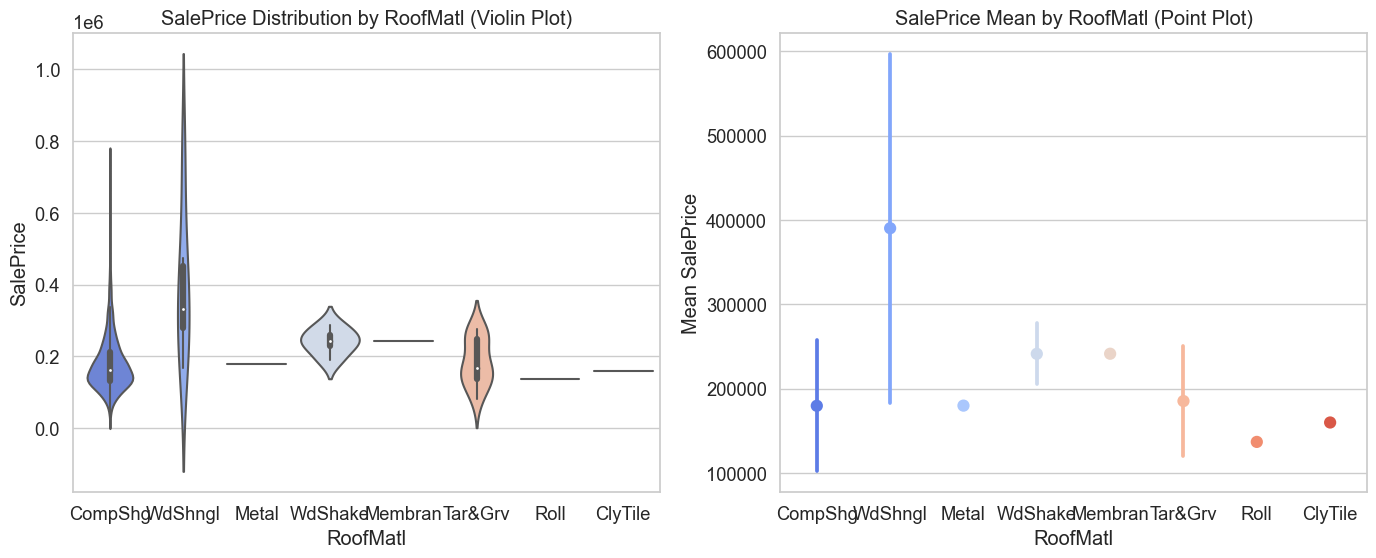

--------------------------------------------------------------------------------
Exterior1st
--------------------------------------------------------------------------------
             Target Mean  Count  Ratio (%)
Exterior1st                               
AsbShng       107385.550     44      1.507
AsphShn       100000.000      2      0.069
BrkComm        71000.000      6      0.206
BrkFace       194573.000     87      2.980
CBlock        105000.000      2      0.069
CemntBd       231690.656    126      4.317
HdBoard       163077.450    442     15.142
ImStucc       262000.000      1      0.034
MetalSd       149422.177    450     15.416
Plywood       175942.380    221      7.571
Stone         258500.000      2      0.069
Stucco        162990.000     43      1.473
VinylSd       213732.901   1025     35.115
Wd Sdng       149841.646    411     14.080
WdShing       150655.077     56      1.918




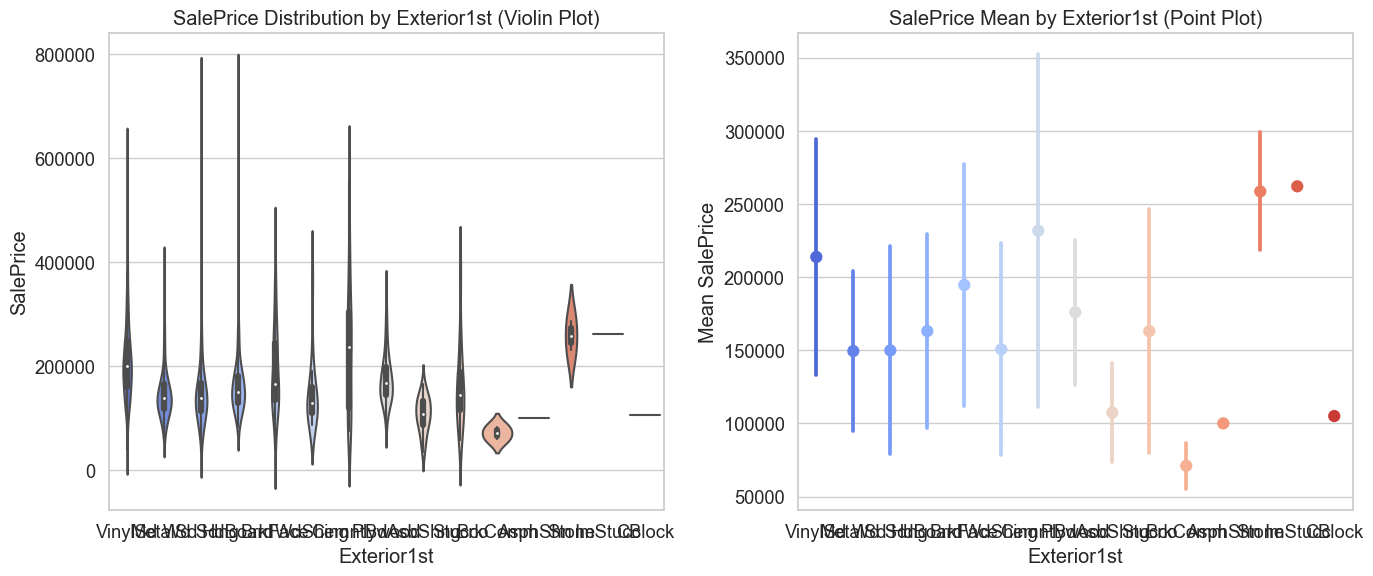

--------------------------------------------------------------------------------
Exterior2nd
--------------------------------------------------------------------------------
             Target Mean  Count  Ratio (%)
Exterior2nd                               
AsbShng       114060.550     38      1.302
AsphShn       138000.000      4      0.137
Brk Cmn       126714.286     22      0.754
BrkFace       195818.000     47      1.610
CBlock        105000.000      3      0.103
CmentBd       230093.833    126      4.317
HdBoard       167661.565    406     13.909
ImStucc       252070.000     15      0.514
MetalSd       149803.173    447     15.313
Other         319000.000      1      0.034
Plywood       168112.387    270      9.250
Stone         158224.800      6      0.206
Stucco        155905.154     47      1.610
VinylSd       214432.460   1014     34.738
Wd Sdng       148386.066    391     13.395
Wd Shng       161328.947     81      2.775




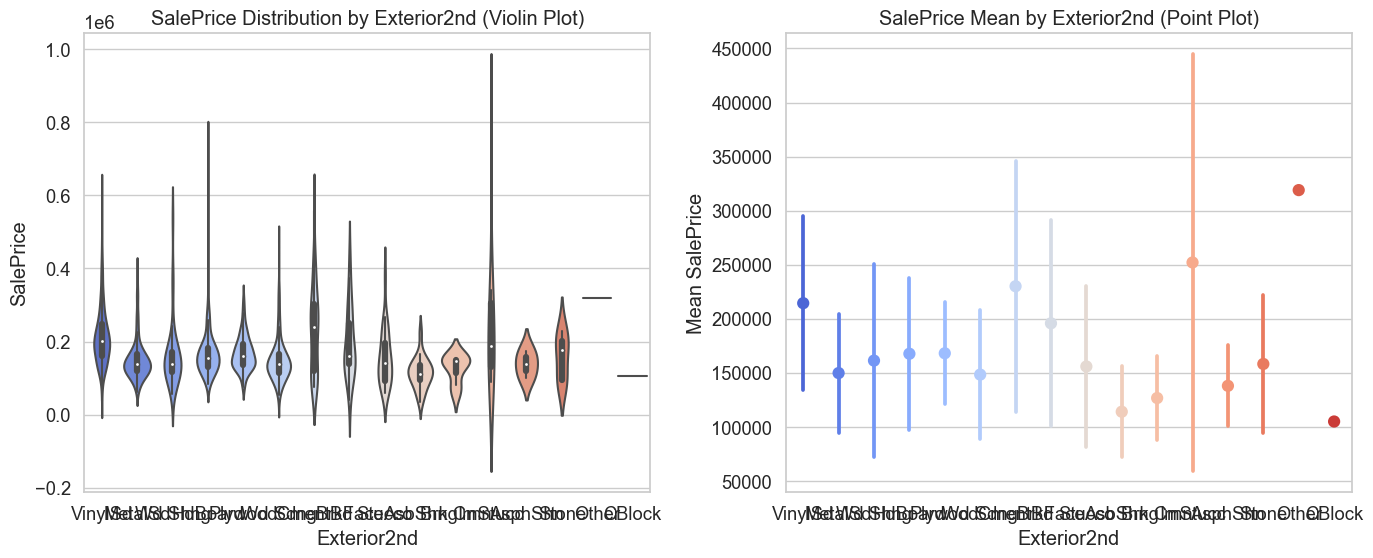

--------------------------------------------------------------------------------
MasVnrType
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
MasVnrType                               
BrkCmn       146318.067     25      0.856
BrkFace      204691.872    879     30.113
Stone        265583.625    249      8.530




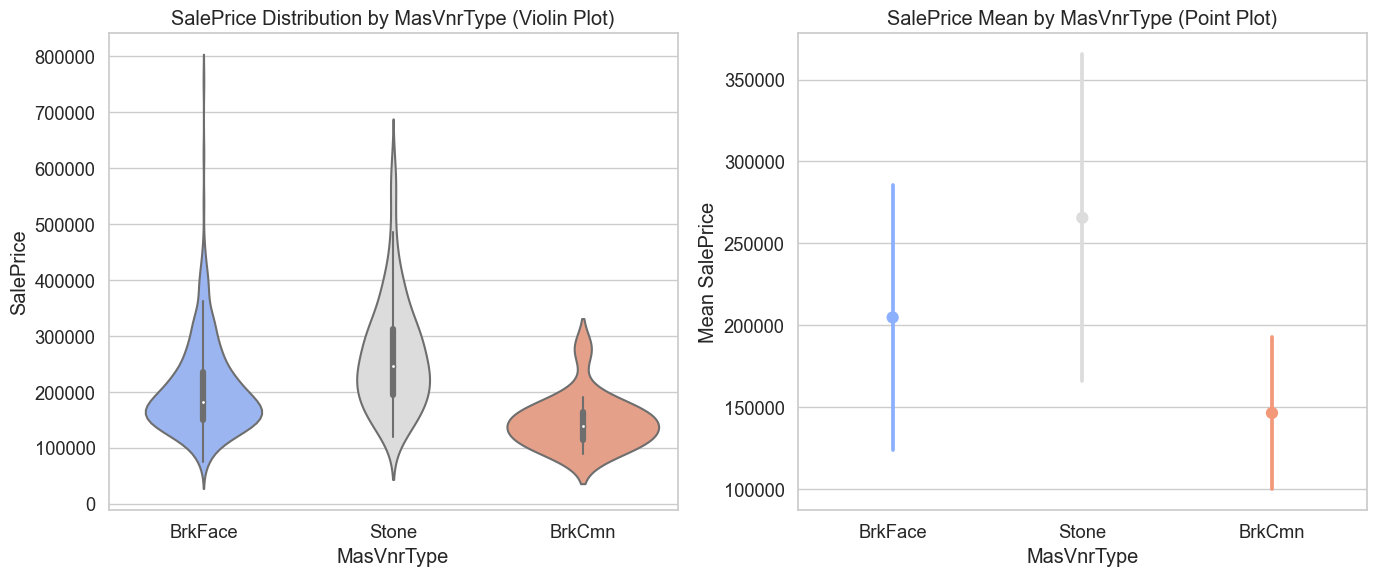

--------------------------------------------------------------------------------
ExterQual
--------------------------------------------------------------------------------
           Target Mean  Count  Ratio (%)
ExterQual                               
Ex          367360.962    107      3.666
Fa           87985.214     35      1.199
Gd          231633.510    979     33.539
TA          144341.313   1798     61.596




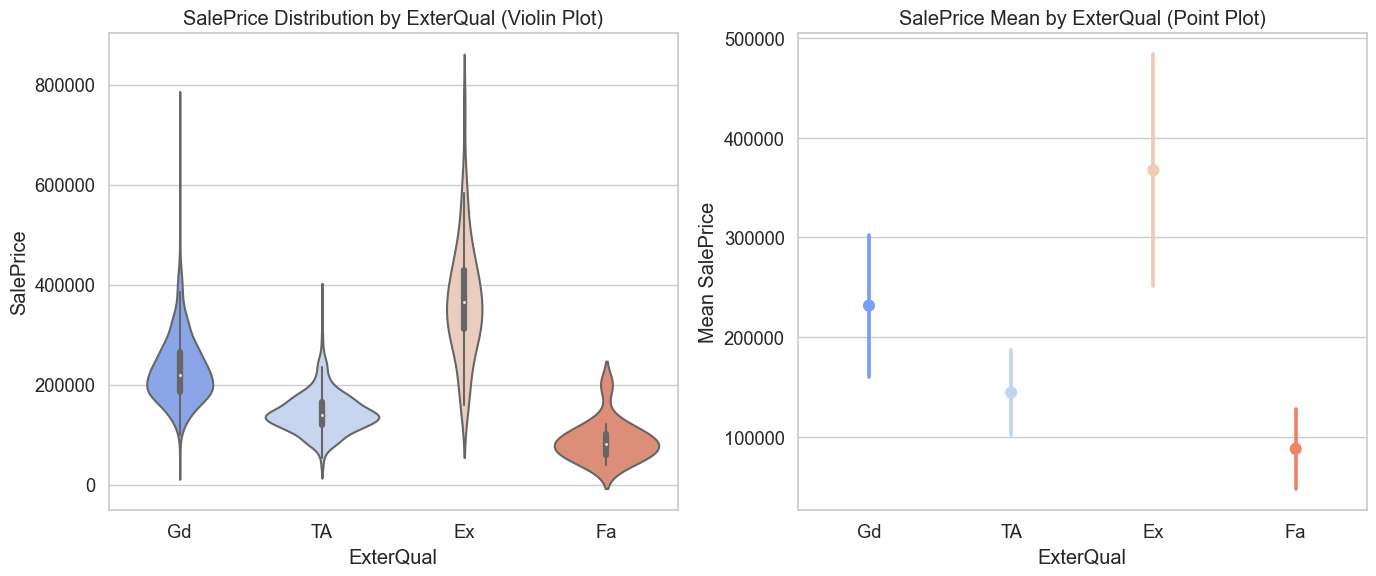

--------------------------------------------------------------------------------
ExterCond
--------------------------------------------------------------------------------
           Target Mean  Count  Ratio (%)
ExterCond                               
Ex          201333.333     12      0.411
Fa          102595.143     67      2.295
Gd          168897.568    299     10.243
Po           76500.000      3      0.103
TA          184034.896   2538     86.948




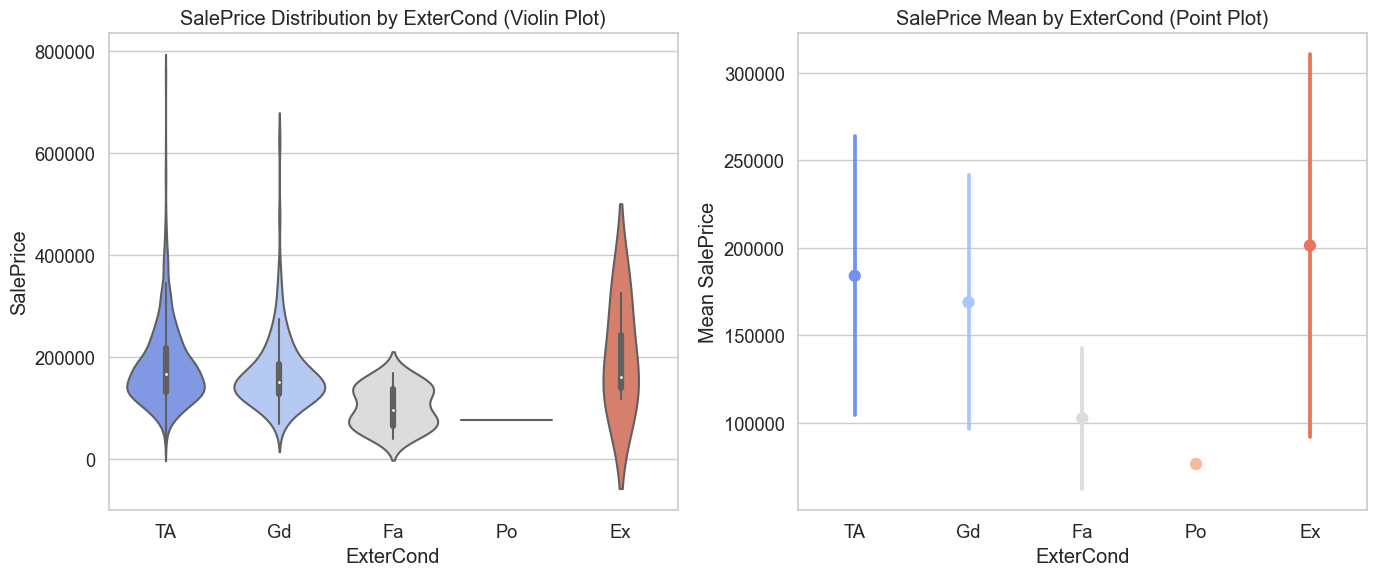

--------------------------------------------------------------------------------
Foundation
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
Foundation                               
BrkTil       132291.075    311     10.654
CBlock       149805.715   1235     42.309
PConc        225230.442   1308     44.810
Slab         107365.625     49      1.679
Stone        165959.167     11      0.377
Wood         185666.667      5      0.171




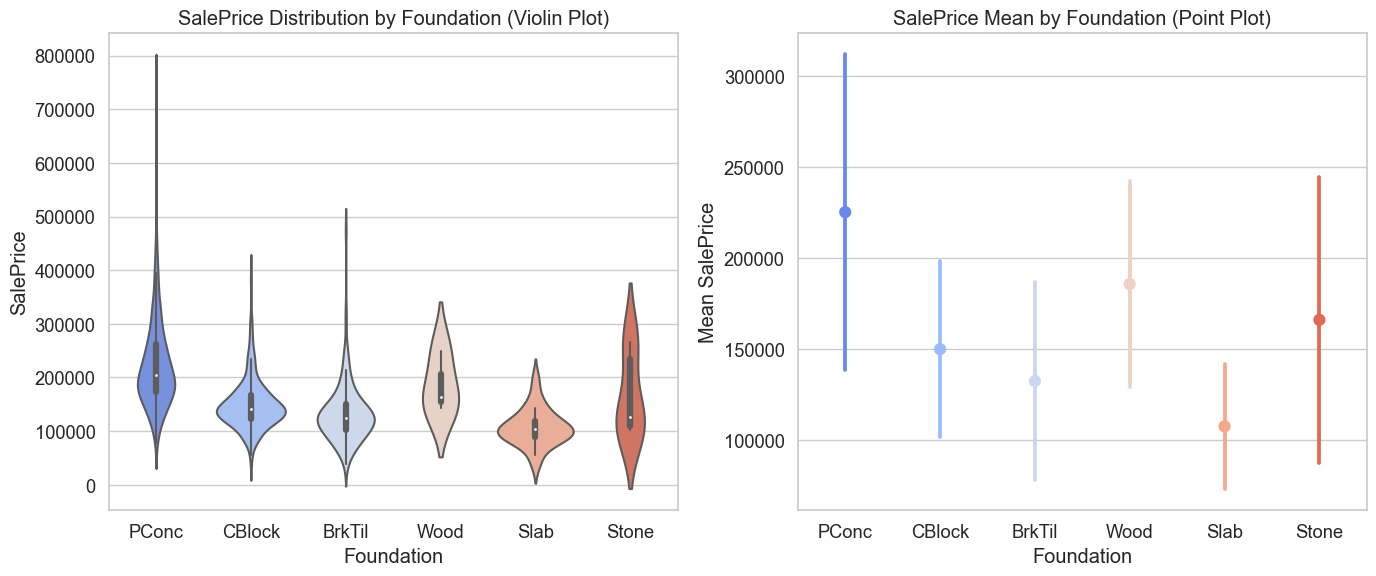

--------------------------------------------------------------------------------
BsmtQual
--------------------------------------------------------------------------------
          Target Mean  Count  Ratio (%)
BsmtQual                               
Ex         327041.041    258      8.839
Fa         115692.029     88      3.015
Gd         202688.479   1209     41.418
TA         140759.818   1283     43.953




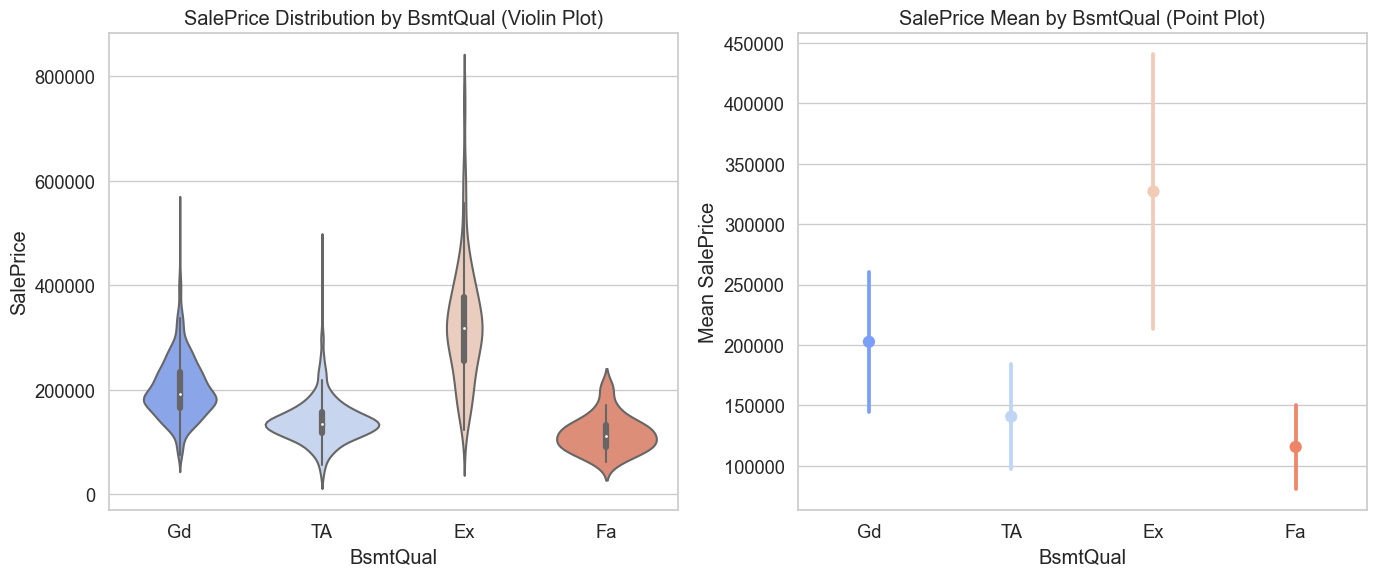

--------------------------------------------------------------------------------
BsmtCond
--------------------------------------------------------------------------------
          Target Mean  Count  Ratio (%)
BsmtCond                               
Fa         121809.533    104      3.563
Gd         213599.908    122      4.180
Po          64000.000      5      0.171
TA         183632.621   2606     89.277




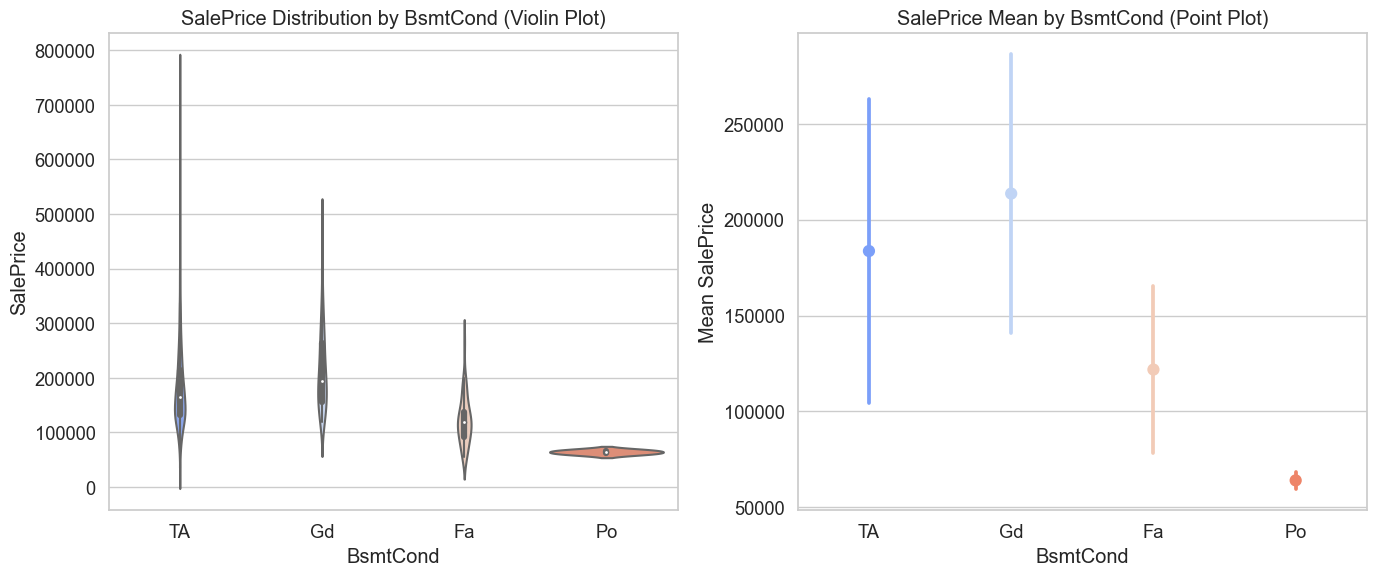

--------------------------------------------------------------------------------
BsmtExposure
--------------------------------------------------------------------------------
              Target Mean  Count  Ratio (%)
BsmtExposure                               
Av             206643.421    418     14.320
Gd             257689.806    276      9.455
Mn             192789.658    239      8.188
No             165652.296   1904     65.228




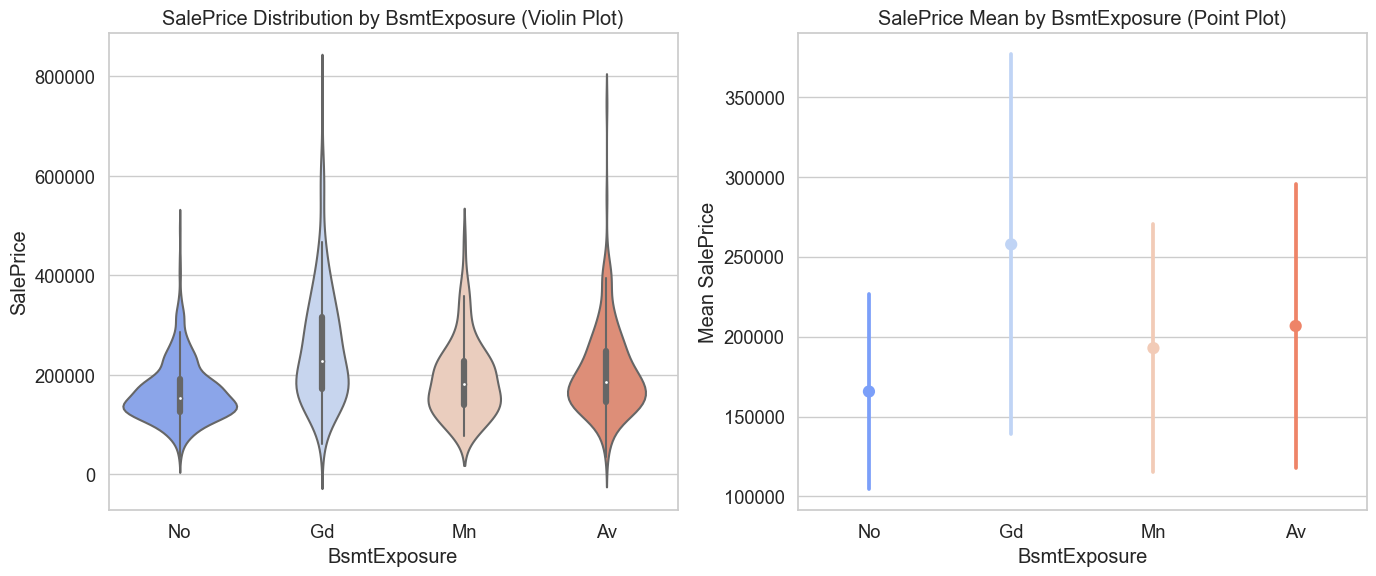

--------------------------------------------------------------------------------
BsmtFinType1
--------------------------------------------------------------------------------
              Target Mean  Count  Ratio (%)
BsmtFinType1                               
ALQ            161573.068    429     14.697
BLQ            149493.655    269      9.215
GLQ            235413.720    849     29.085
LwQ            151852.703    154      5.276
Rec            146889.248    288      9.866
Unf            170670.577    851     29.154




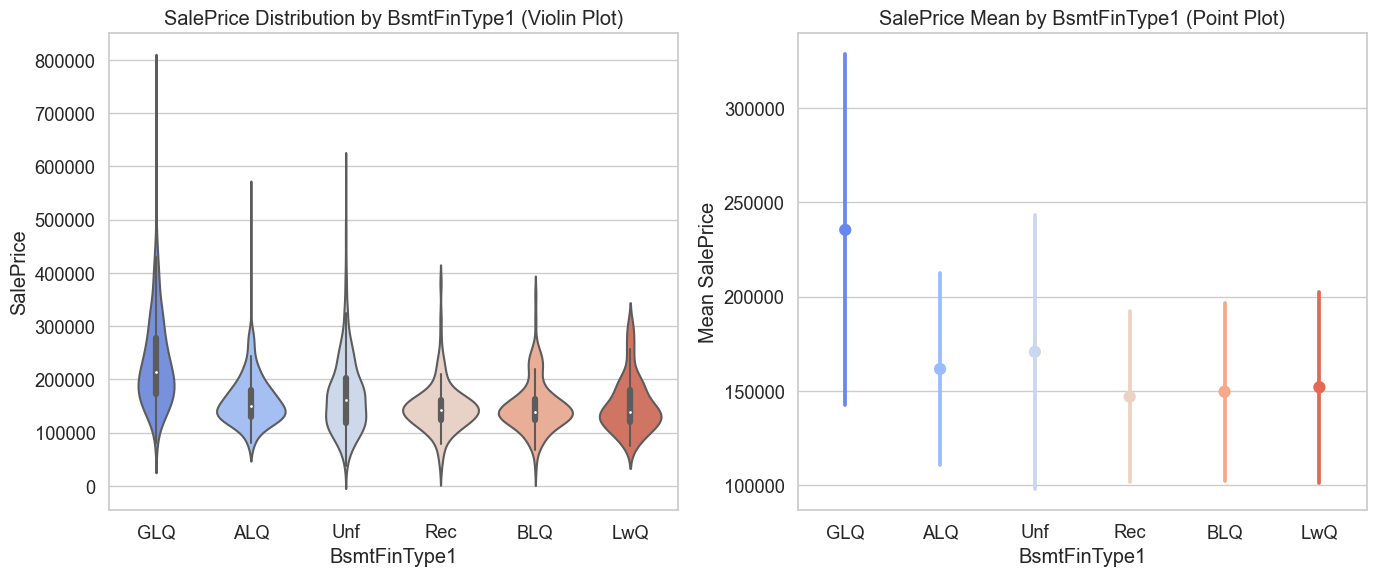

--------------------------------------------------------------------------------
BsmtFinType2
--------------------------------------------------------------------------------
              Target Mean  Count  Ratio (%)
BsmtFinType2                               
ALQ            209942.105     52      1.781
BLQ            151101.000     68      2.330
GLQ            180982.143     34      1.165
LwQ            164364.130     87      2.980
Rec            164917.130    105      3.597
Unf            184694.690   2493     85.406




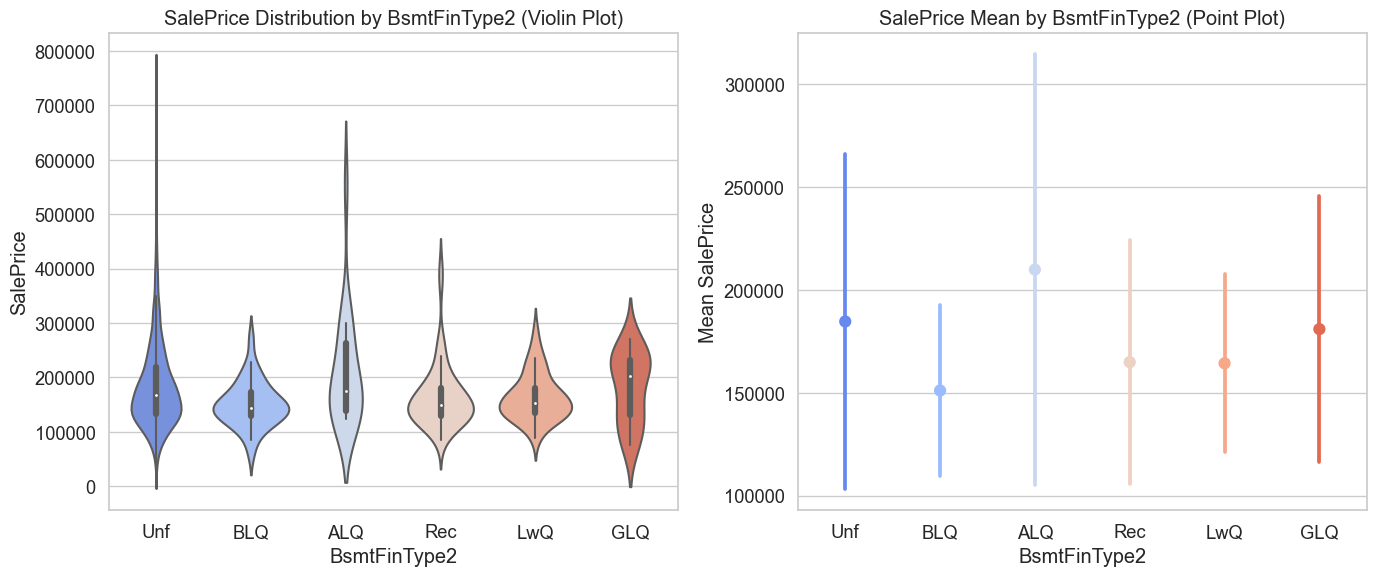

--------------------------------------------------------------------------------
Heating
--------------------------------------------------------------------------------
         Target Mean  Count  Ratio (%)
Heating                               
Floor      72500.000      1      0.034
GasA      182021.195   2874     98.458
GasW      166632.167     27      0.925
Grav       75271.429      9      0.308
OthW      125750.000      2      0.069
Wall       92100.000      6      0.206




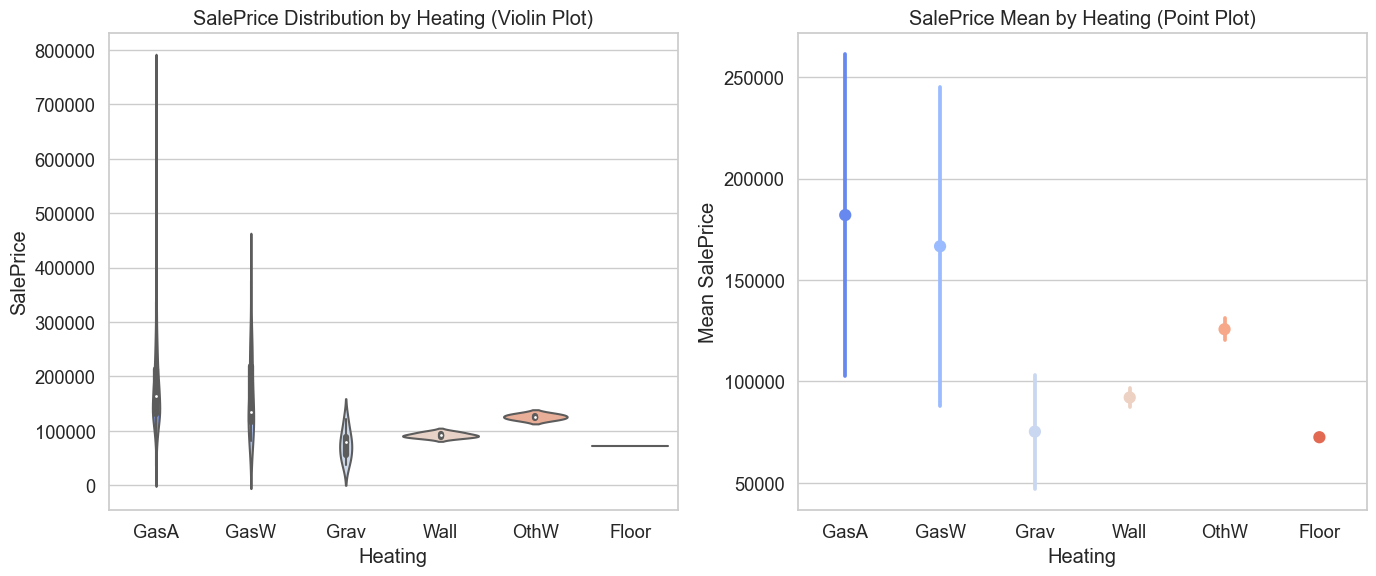

--------------------------------------------------------------------------------
HeatingQC
--------------------------------------------------------------------------------
           Target Mean  Count  Ratio (%)
HeatingQC                               
Ex          214914.429   1493     51.148
Fa          123919.490     92      3.152
Gd          156858.871    474     16.238
Po           87000.000      3      0.103
TA          142362.876    857     29.359




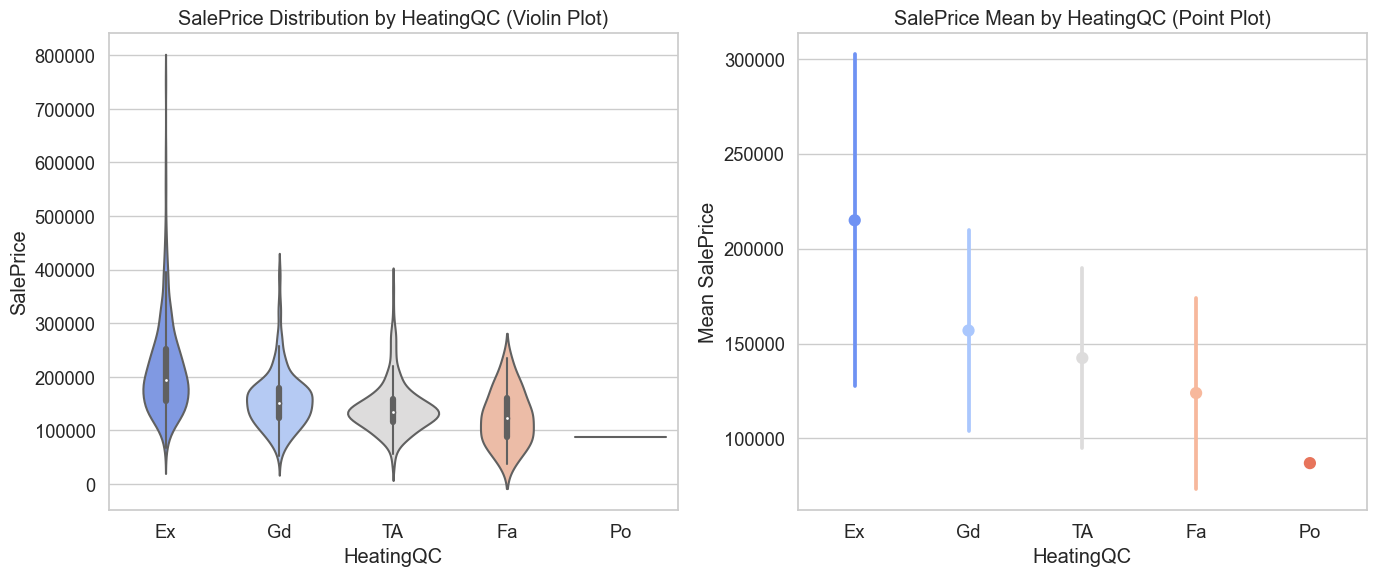

--------------------------------------------------------------------------------
CentralAir
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
CentralAir                               
N            105264.074    196      6.715
Y            186186.710   2723     93.285




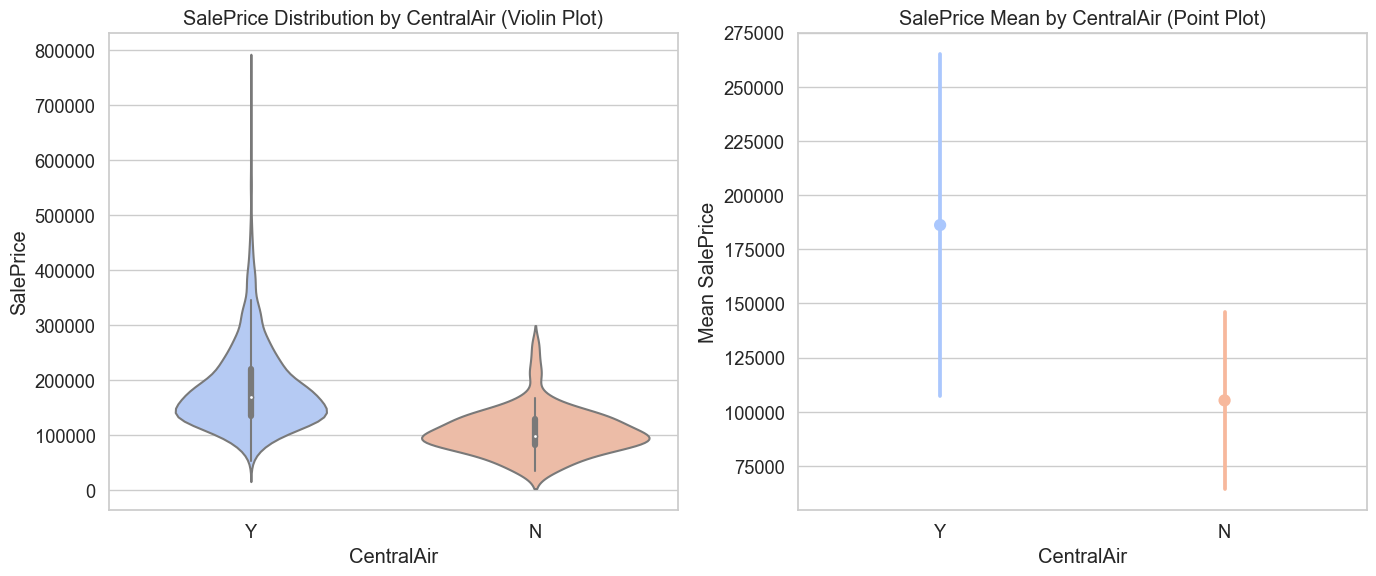

--------------------------------------------------------------------------------
Electrical
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
Electrical                               
FuseA        122196.894    188      6.441
FuseF        107675.444     50      1.713
FuseP         97333.333      8      0.274
Mix           67000.000      1      0.034
SBrkr        186825.113   2671     91.504




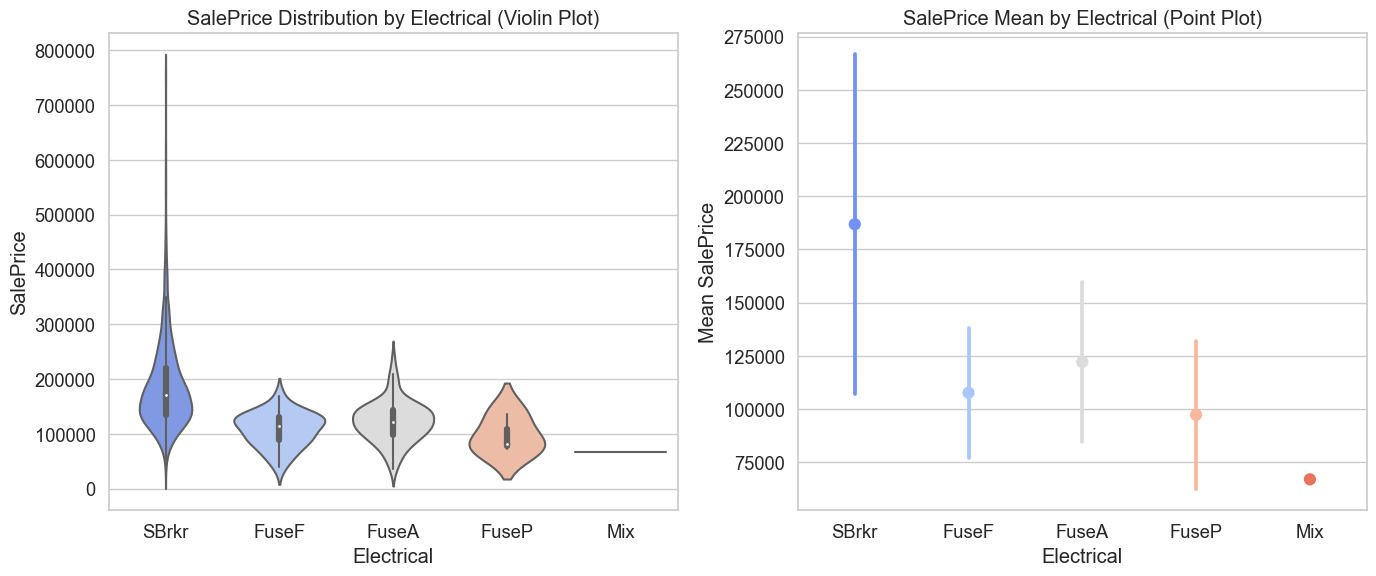

--------------------------------------------------------------------------------
KitchenQual
--------------------------------------------------------------------------------
             Target Mean  Count  Ratio (%)
KitchenQual                               
Ex            328554.670    205      7.023
Fa            105565.205     70      2.398
Gd            212116.024   1151     39.431
TA            139962.512   1492     51.113




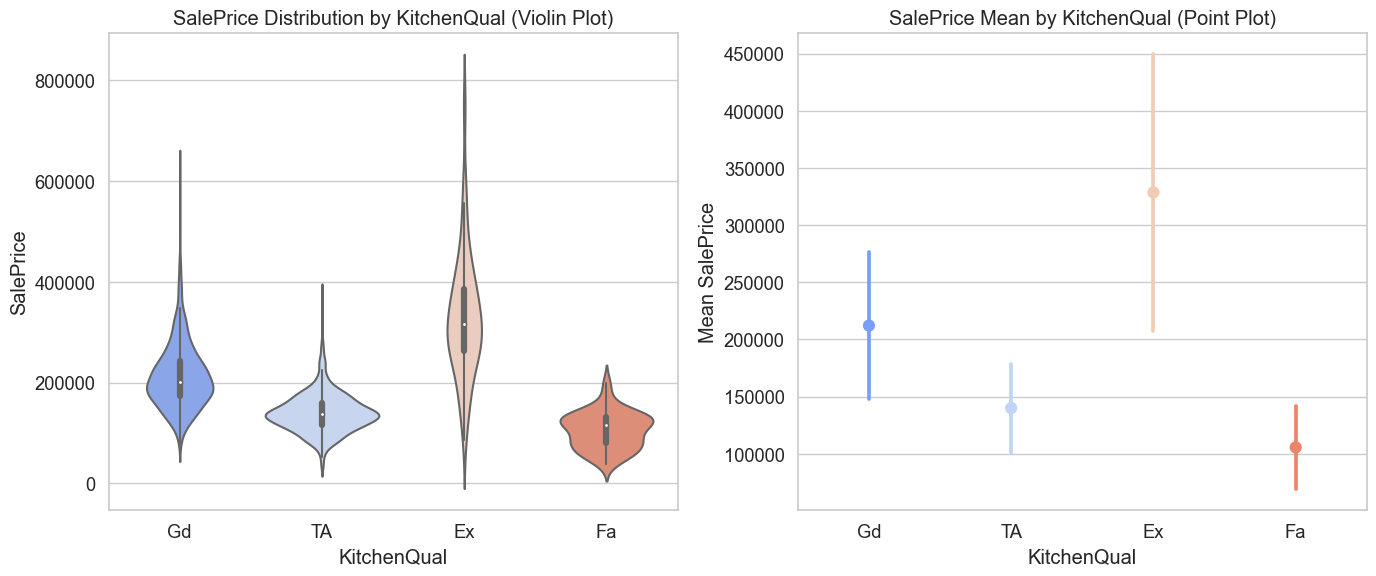

--------------------------------------------------------------------------------
Functional
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
Functional                               
Maj1         153948.143     19      0.651
Maj2          85800.000      9      0.308
Min1         146385.484     65      2.227
Min2         144240.647     70      2.398
Mod          168393.333     35      1.199
Sev          129000.000      2      0.069
Typ          183429.147   2717     93.080




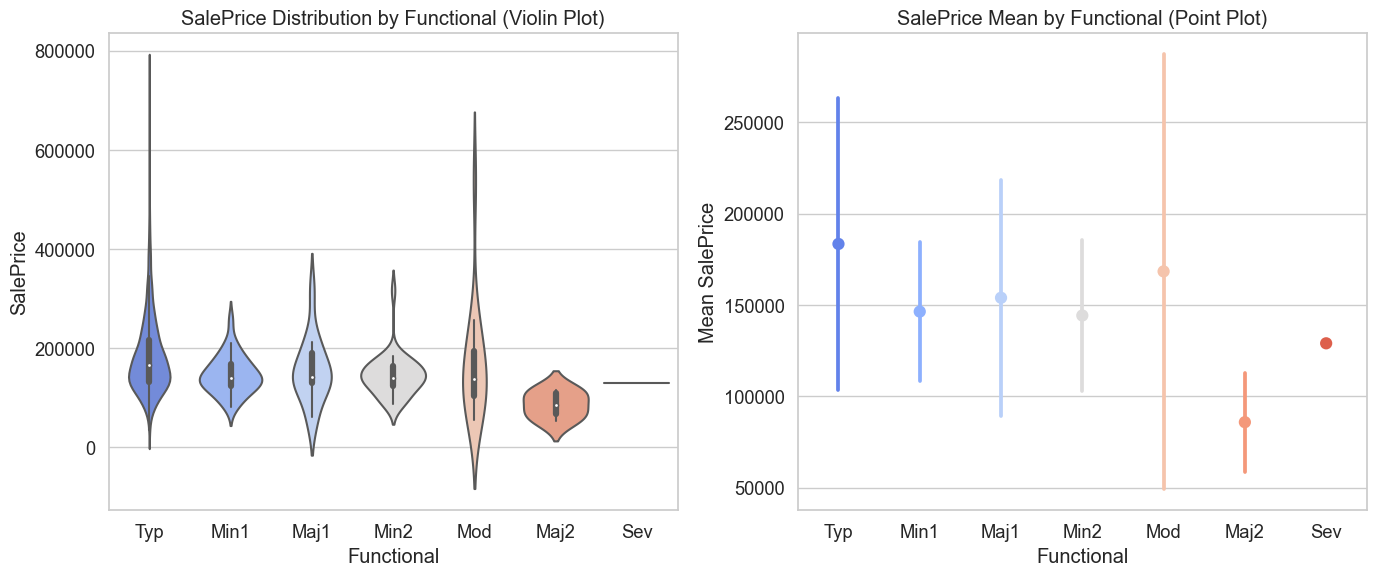

--------------------------------------------------------------------------------
FireplaceQu
--------------------------------------------------------------------------------
             Target Mean  Count  Ratio (%)
FireplaceQu                               
Ex            337712.500     43      1.473
Fa            167298.485     74      2.535
Gd            226351.416    744     25.488
Po            129764.150     46      1.576
TA            205723.489    592     20.281




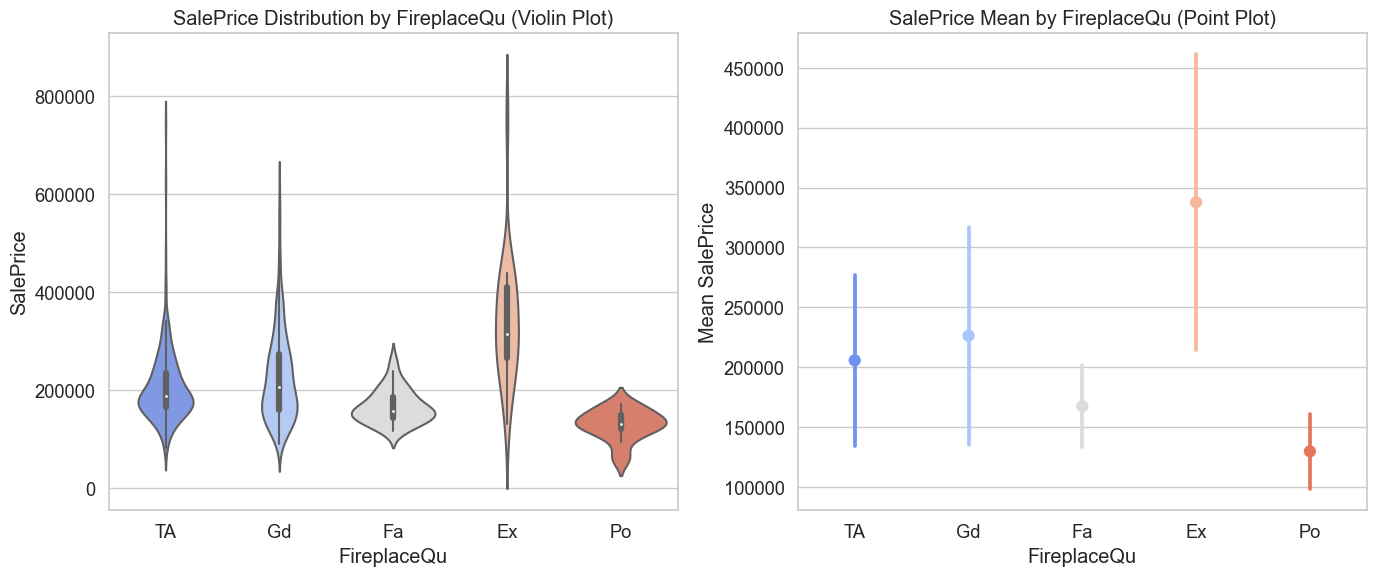

--------------------------------------------------------------------------------
GarageType
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
GarageType                               
2Types       151283.333     23      0.788
Attchd       202892.656   1723     59.027
Basment      160570.684     36      1.233
BuiltIn      254751.739    186      6.372
CarPort      109962.111     15      0.514
Detchd       134091.163    779     26.687




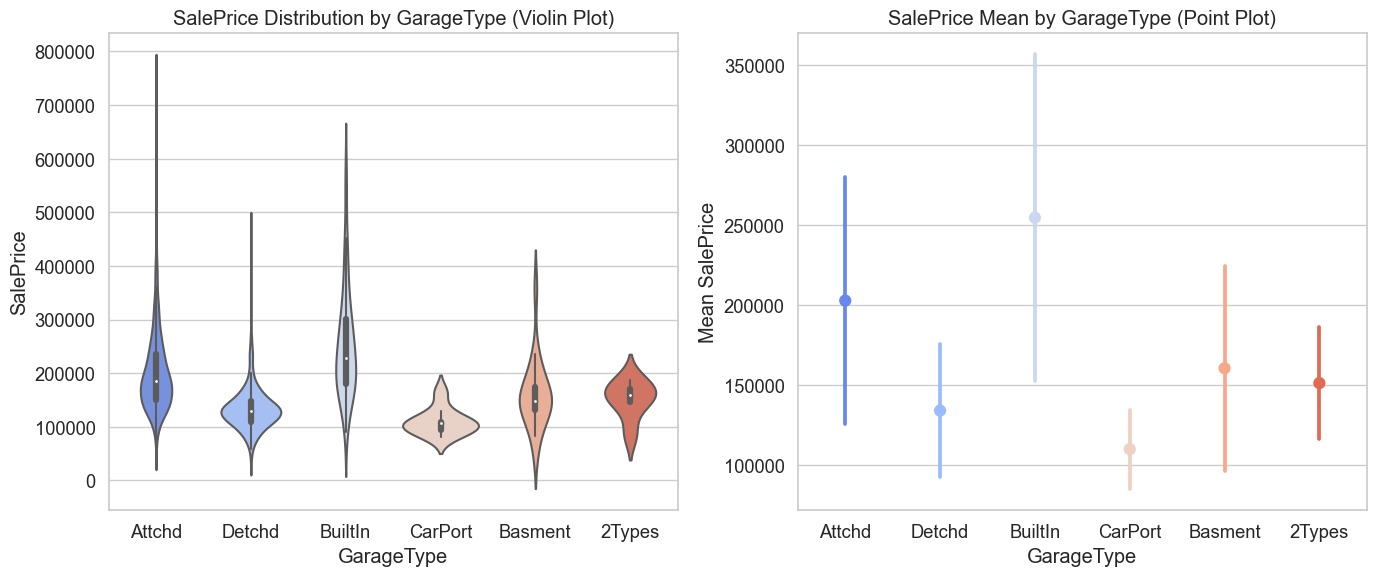

--------------------------------------------------------------------------------
GarageFinish
--------------------------------------------------------------------------------
              Target Mean  Count  Ratio (%)
GarageFinish                               
Fin            240052.690    719     24.632
RFn            202068.870    811     27.783
Unf            142156.423   1230     42.138




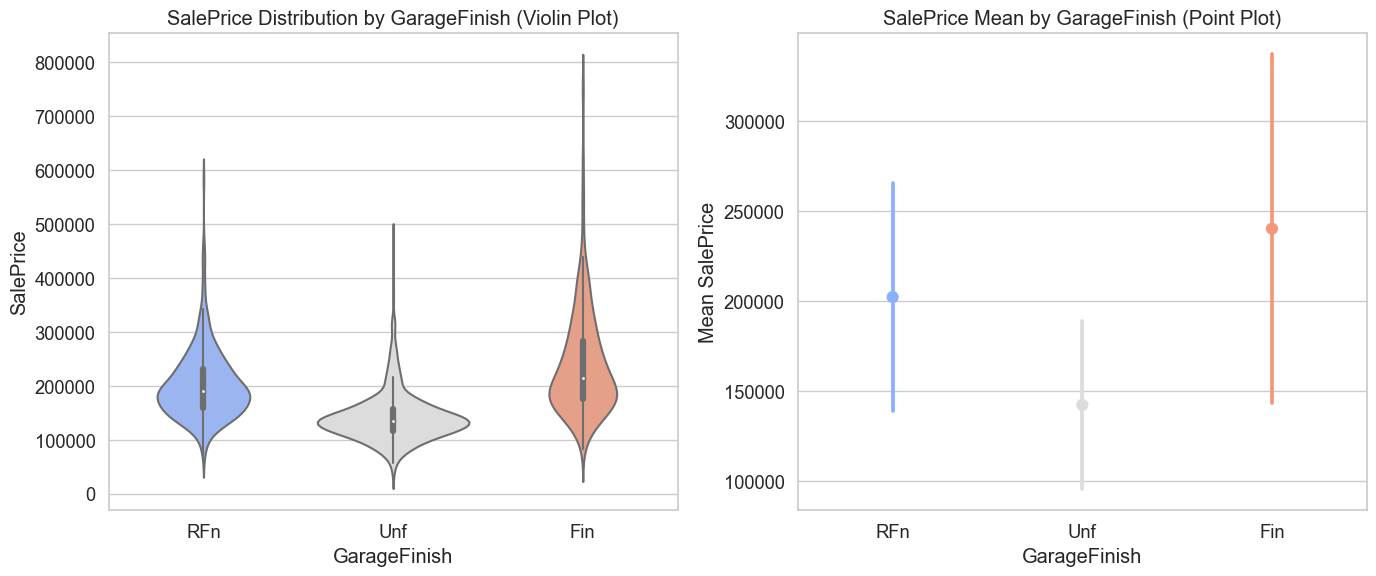

--------------------------------------------------------------------------------
GarageQual
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
GarageQual                               
Ex           241000.000      3      0.103
Fa           123573.354    124      4.248
Gd           215860.714     24      0.822
Po           100166.667      5      0.171
TA           187489.836   2604     89.209




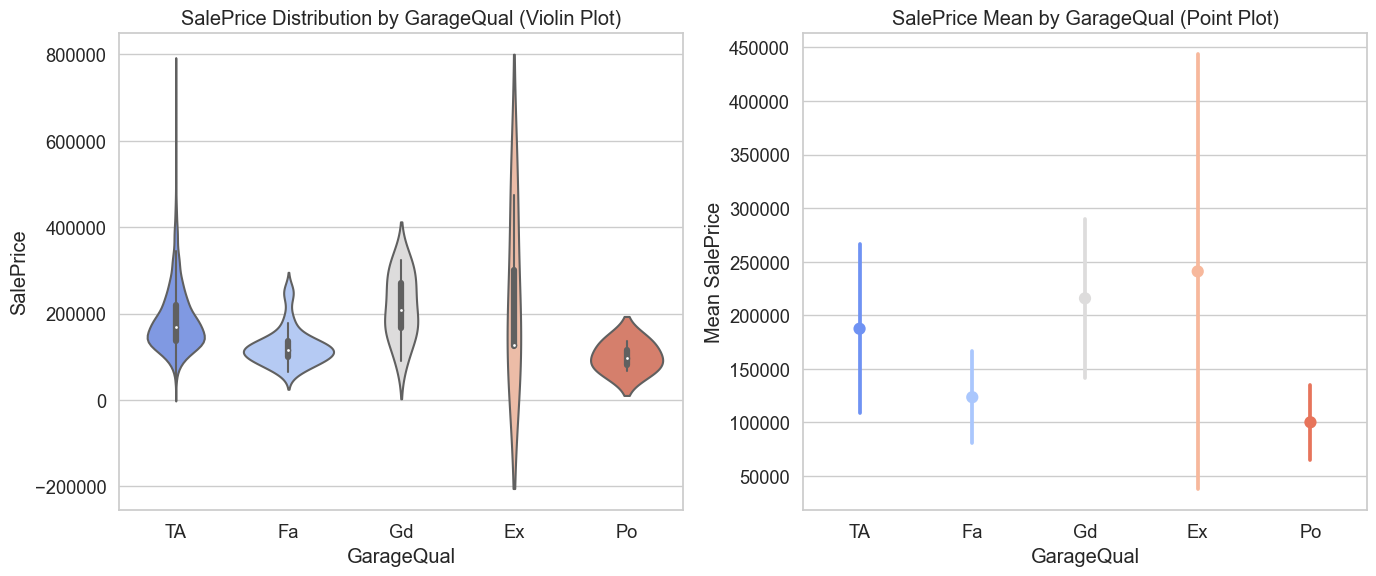

--------------------------------------------------------------------------------
GarageCond
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
GarageCond                               
Ex           124000.000      3      0.103
Fa           114654.029     74      2.535
Gd           179930.000     15      0.514
Po           108500.000     14      0.480
TA           187885.735   2654     90.922




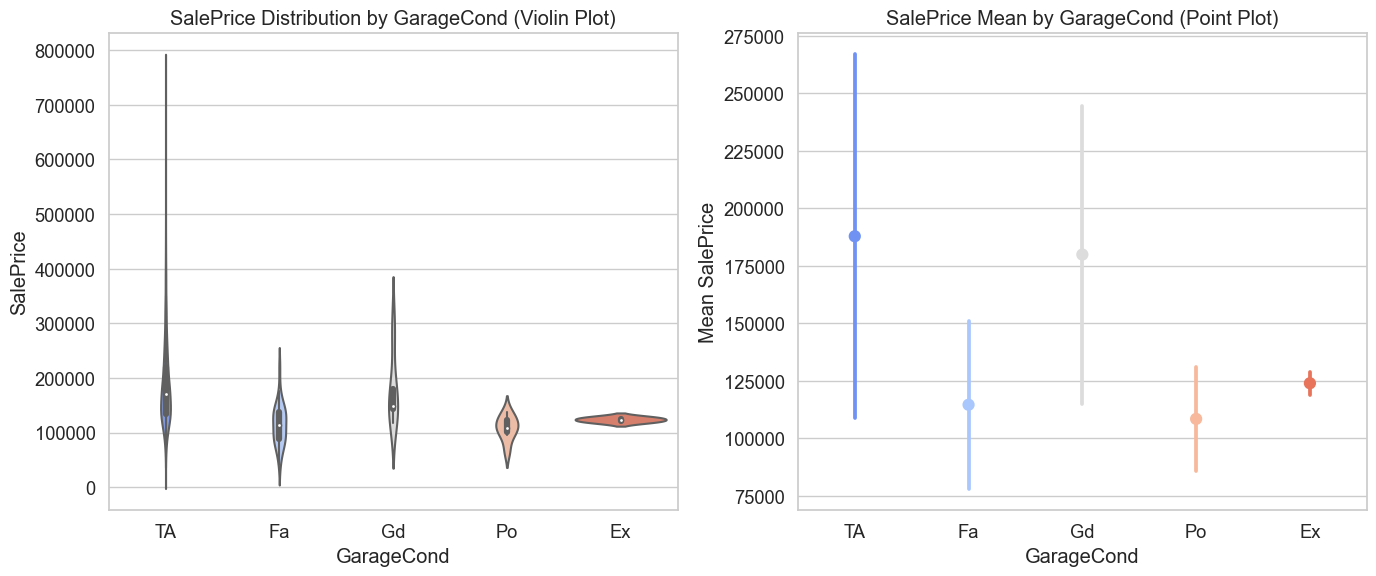

--------------------------------------------------------------------------------
PavedDrive
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
PavedDrive                               
N            115039.122    216      7.400
P            132330.000     62      2.124
Y            186433.974   2641     90.476




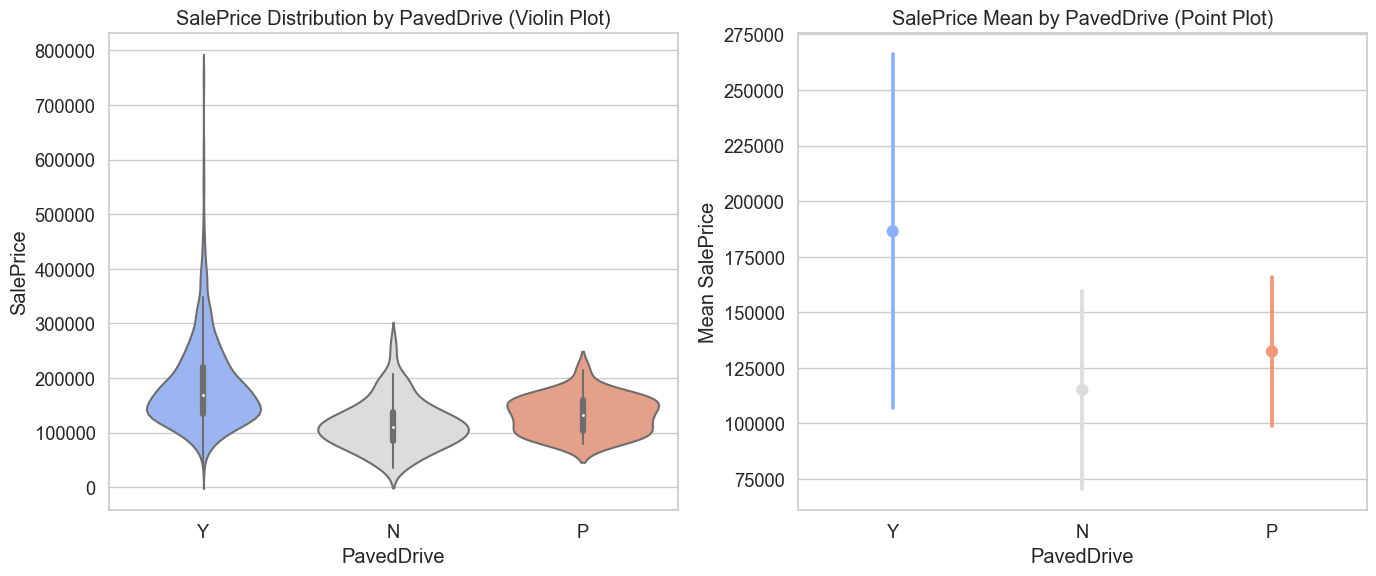

--------------------------------------------------------------------------------
PoolQC
--------------------------------------------------------------------------------
        Target Mean  Count  Ratio (%)
PoolQC                               
Ex       490000.000      4      0.137
Fa       215500.000      2      0.069
Gd       201990.000      4      0.137




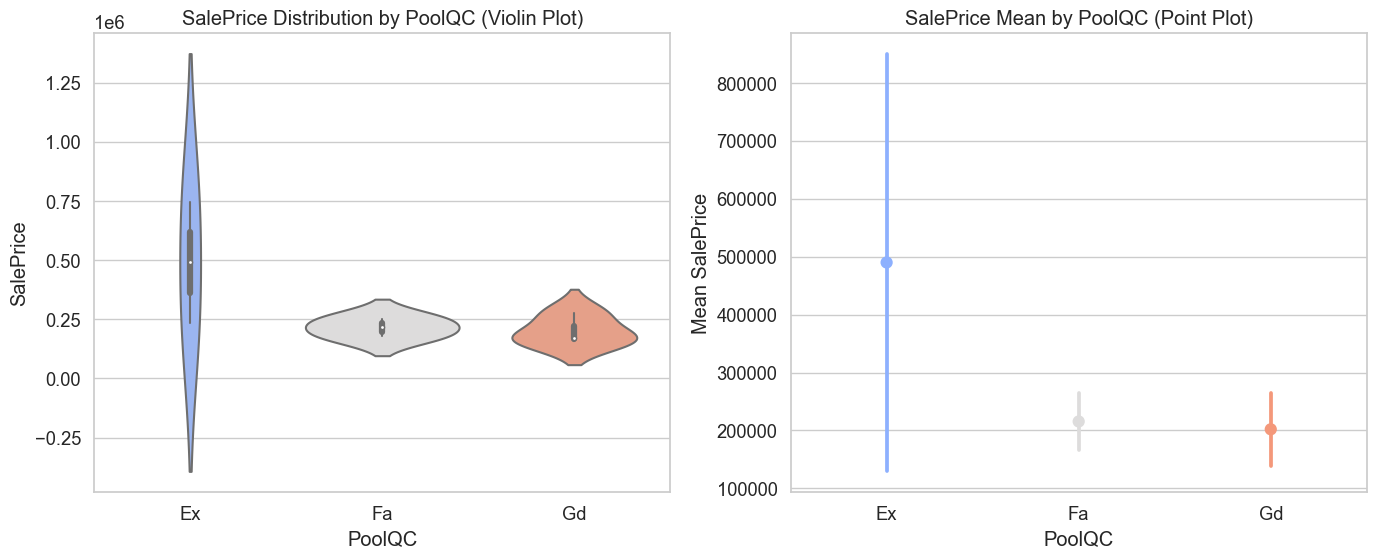

--------------------------------------------------------------------------------
Fence
--------------------------------------------------------------------------------
       Target Mean  Count  Ratio (%)
Fence                               
GdPrv   178927.458    118      4.042
GdWo    140379.315    112      3.837
MnPrv   148751.089    329     11.271
MnWw    134286.364     12      0.411




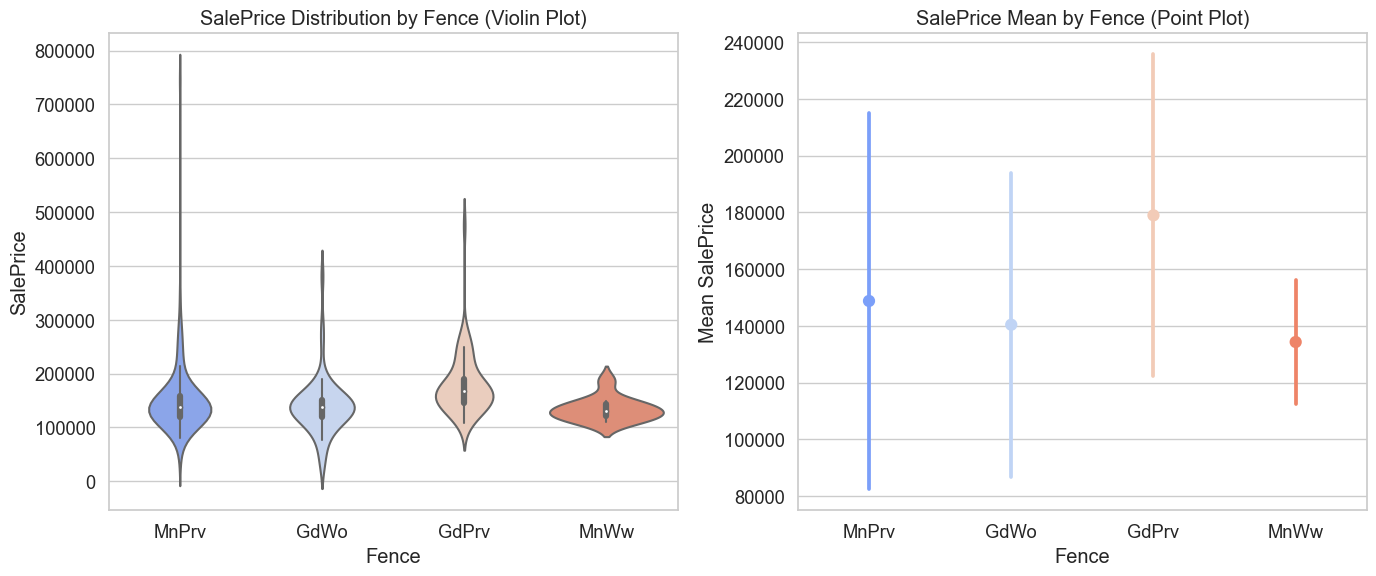

--------------------------------------------------------------------------------
MiscFeature
--------------------------------------------------------------------------------
             Target Mean  Count  Ratio (%)
MiscFeature                               
Gar2          170750.000      5      0.171
Othr           94000.000      4      0.137
Shed          151187.612     95      3.255
TenC          250000.000      1      0.034




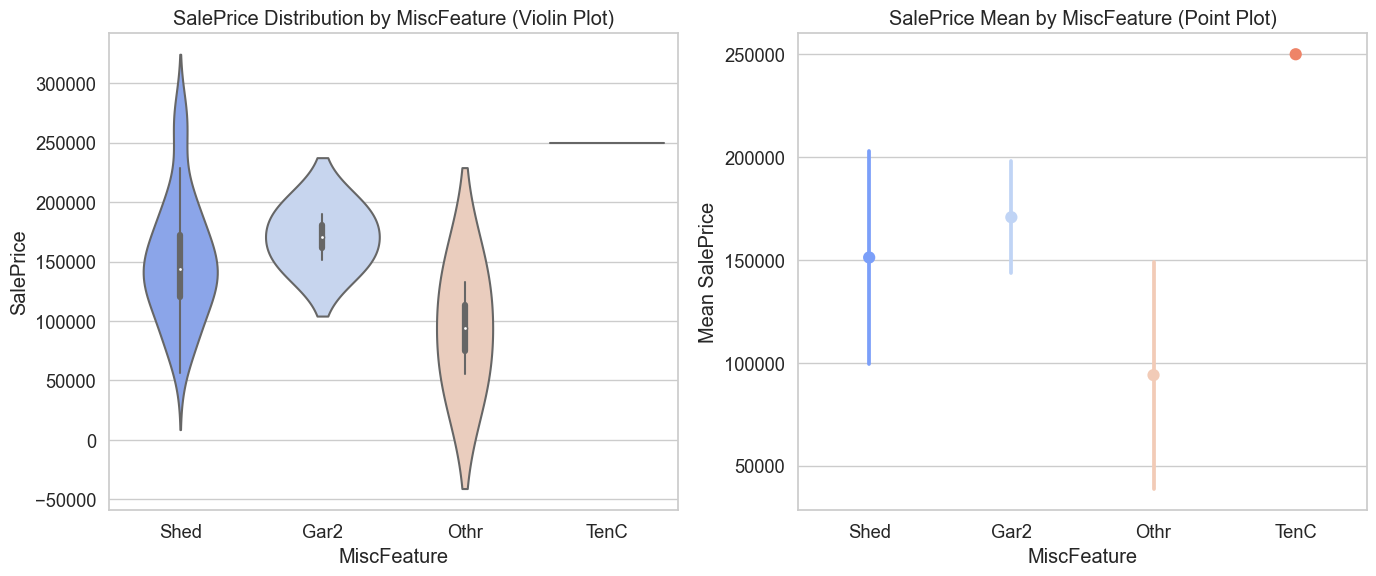

--------------------------------------------------------------------------------
SaleType
--------------------------------------------------------------------------------
          Target Mean  Count  Ratio (%)
SaleType                               
COD        143973.256     87      2.980
CWD        210600.000     12      0.411
Con        269600.000      5      0.171
ConLD      138780.889     26      0.891
ConLI      200390.000      9      0.308
ConLw      143700.000      8      0.274
New        274945.418    239      8.188
Oth        119850.000      7      0.240
WD         173401.837   2525     86.502




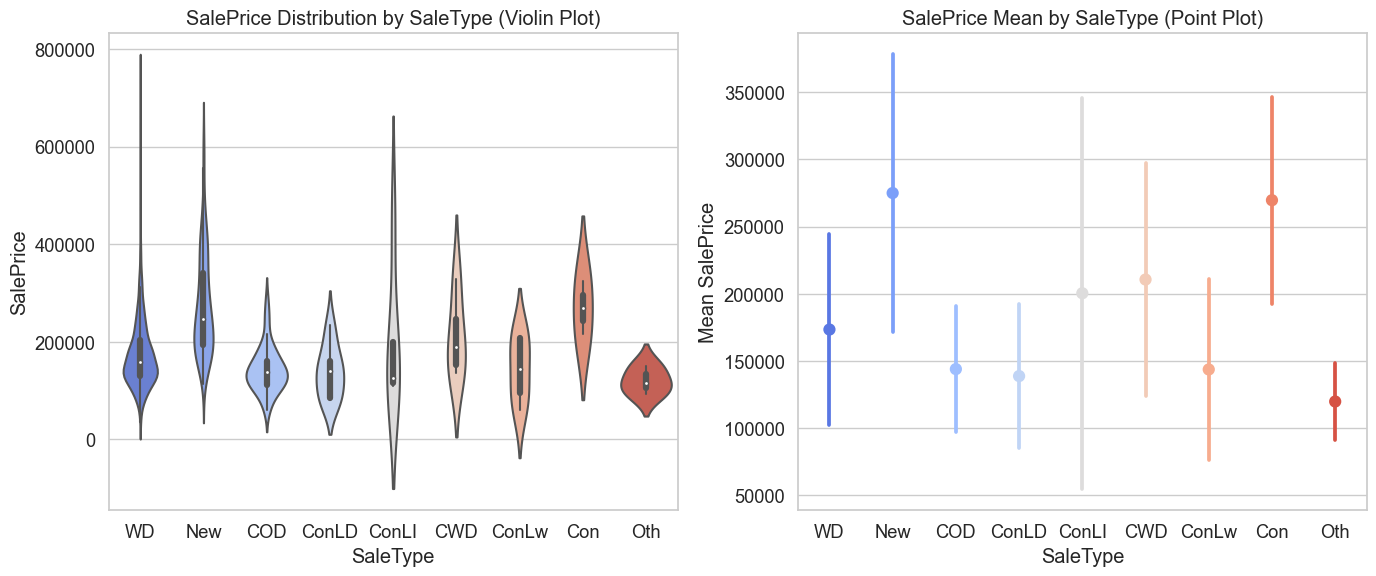

--------------------------------------------------------------------------------
SaleCondition
--------------------------------------------------------------------------------
               Target Mean  Count  Ratio (%)
SaleCondition                               
Abnorml         146526.624    190      6.509
AdjLand         104125.000     12      0.411
Alloca          167377.417     24      0.822
Family          149600.000     46      1.576
Normal          175202.220   2402     82.288
Partial         272291.752    245      8.393




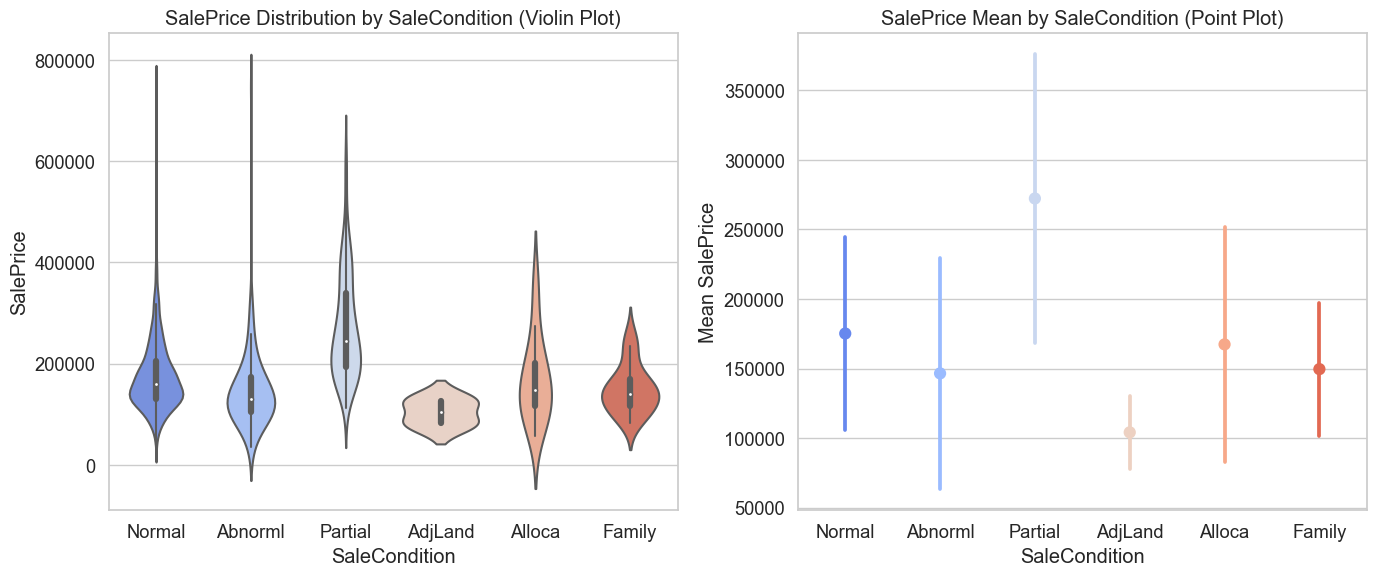

--------------------------------------------------------------------------------
OverallCond
--------------------------------------------------------------------------------
             Target Mean  Count  Ratio (%)
OverallCond                               
1              61000.000      7      0.240
2             141986.400     10      0.343
3             101929.400     50      1.713
4             120438.439    101      3.460
5             203146.915   1645     56.355
6             153961.591    531     18.191
7             158145.488    390     13.361
8             155651.736    144      4.933
9             216004.545     41      1.405




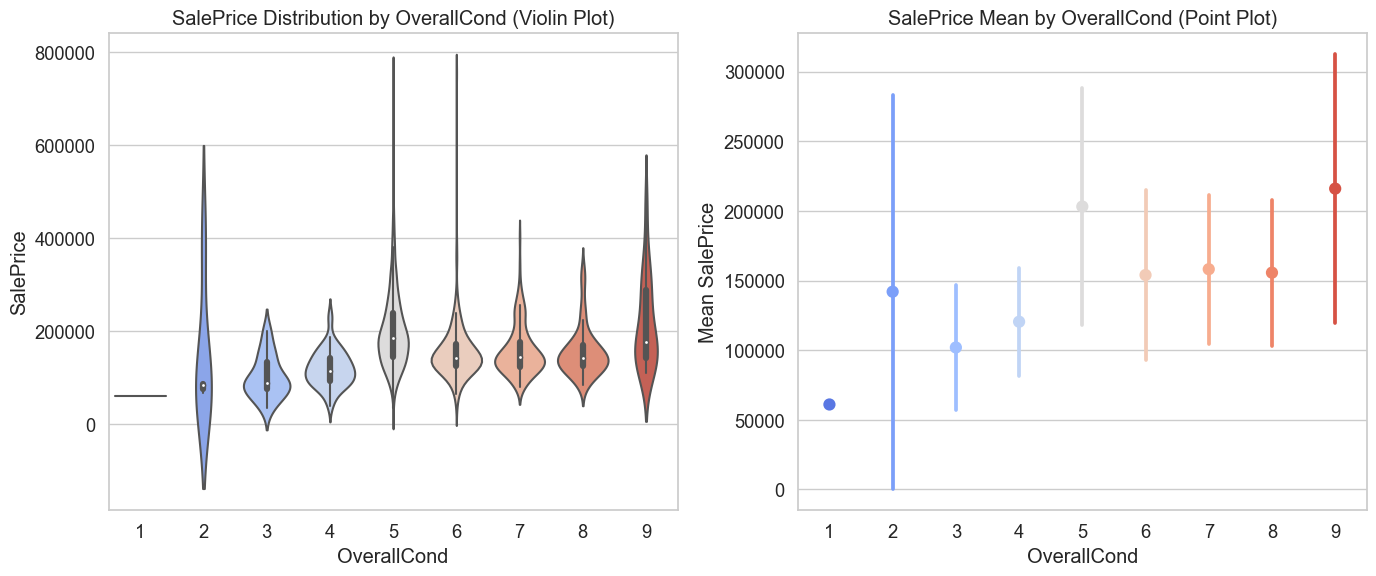

--------------------------------------------------------------------------------
BsmtFullBath
--------------------------------------------------------------------------------
              Target Mean  Count  Ratio (%)
BsmtFullBath                               
0.000          165521.640   1705     58.410
1.000          202522.918   1172     40.151
2.000          213063.067     38      1.302
3.000          179000.000      2      0.069




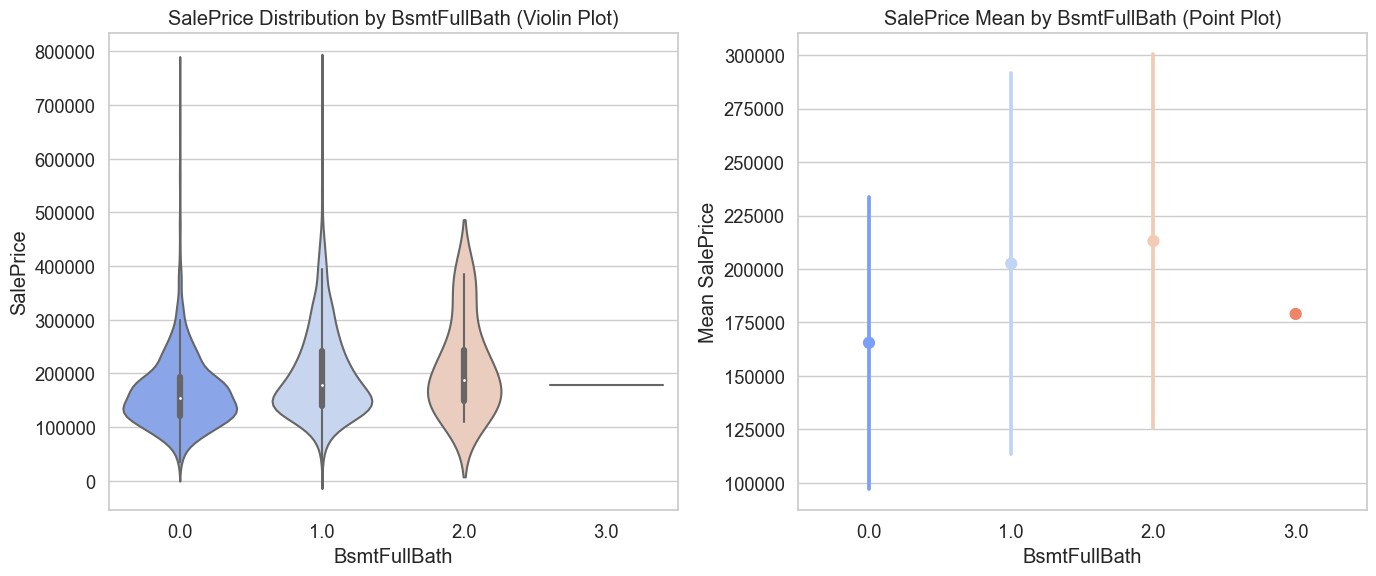

--------------------------------------------------------------------------------
BsmtHalfBath
--------------------------------------------------------------------------------
              Target Mean  Count  Ratio (%)
BsmtHalfBath                               
0.000          181230.330   2742     93.936
1.000          176098.125    171      5.858
2.000          160850.500      4      0.137




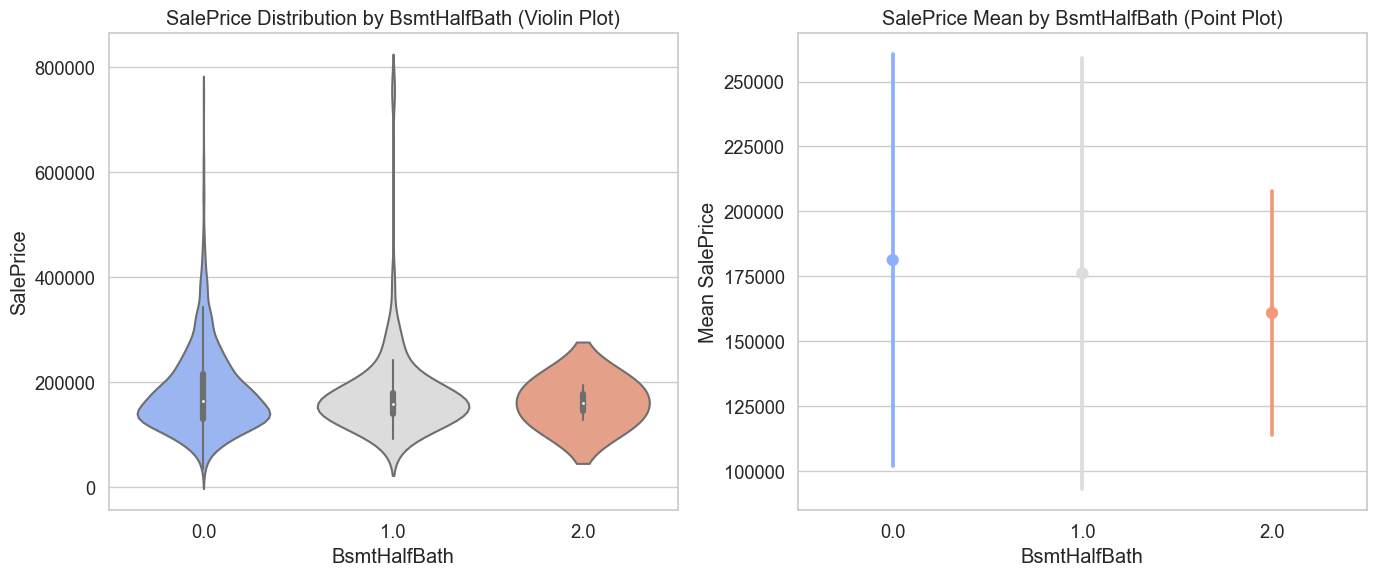

--------------------------------------------------------------------------------
FullBath
--------------------------------------------------------------------------------
          Target Mean  Count  Ratio (%)
FullBath                               
0          165200.889     12      0.411
1          134751.440   1309     44.844
2          213009.826   1530     52.415
3          347822.909     64      2.193
4                 NaN      4      0.137




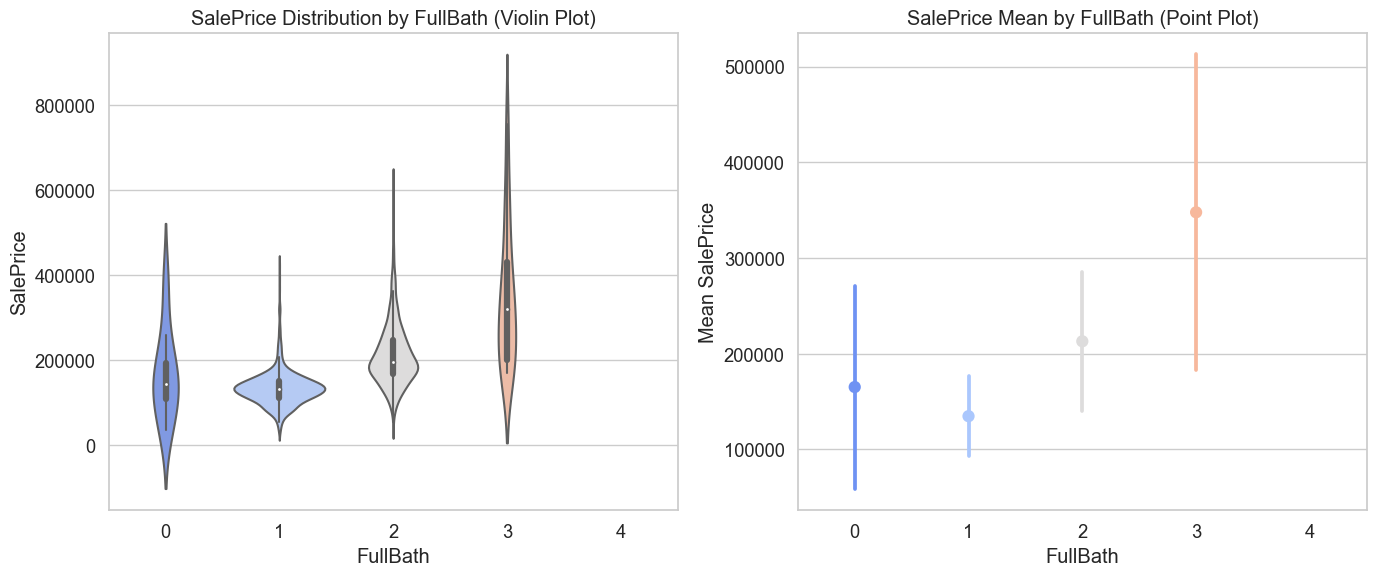

--------------------------------------------------------------------------------
HalfBath
--------------------------------------------------------------------------------
          Target Mean  Count  Ratio (%)
HalfBath                               
0          162534.885   1834     62.830
1          212721.961   1060     36.314
2          162028.917     25      0.856




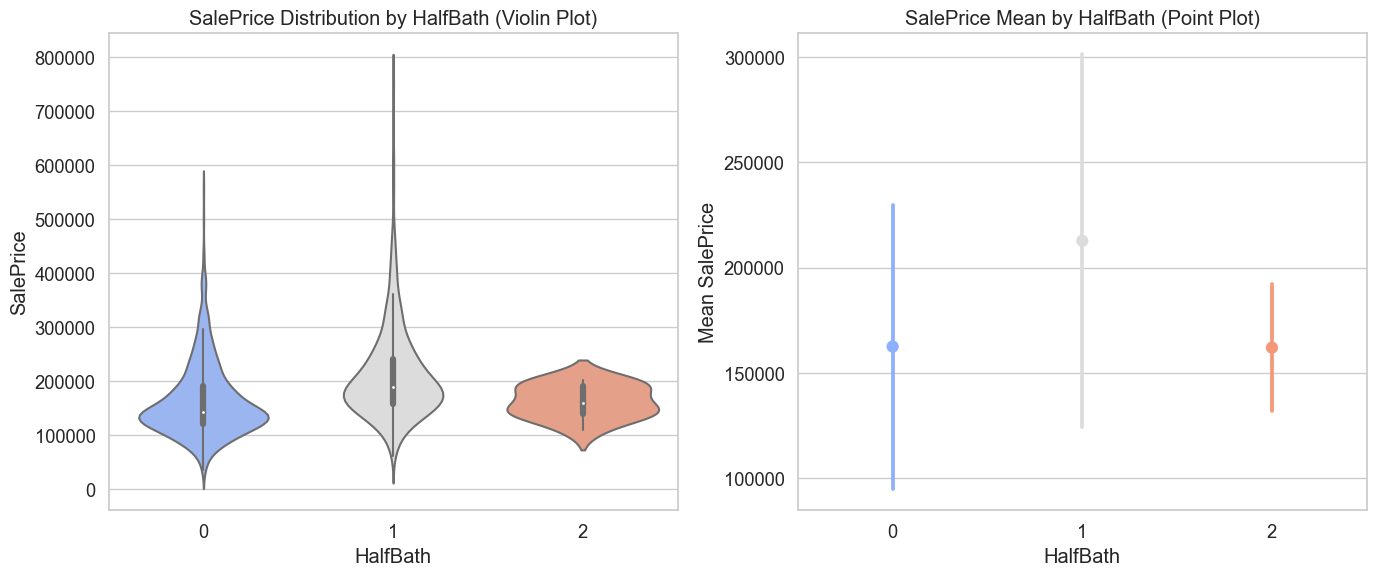

--------------------------------------------------------------------------------
BedroomAbvGr
--------------------------------------------------------------------------------
              Target Mean  Count  Ratio (%)
BedroomAbvGr                               
0              221493.167      8      0.274
1              173162.420    103      3.529
2              158197.659    742     25.420
3              181056.871   1596     54.676
4              220421.254    400     13.703
5              180819.048     48      1.644
6              143779.000     21      0.719
8              200000.000      1      0.034




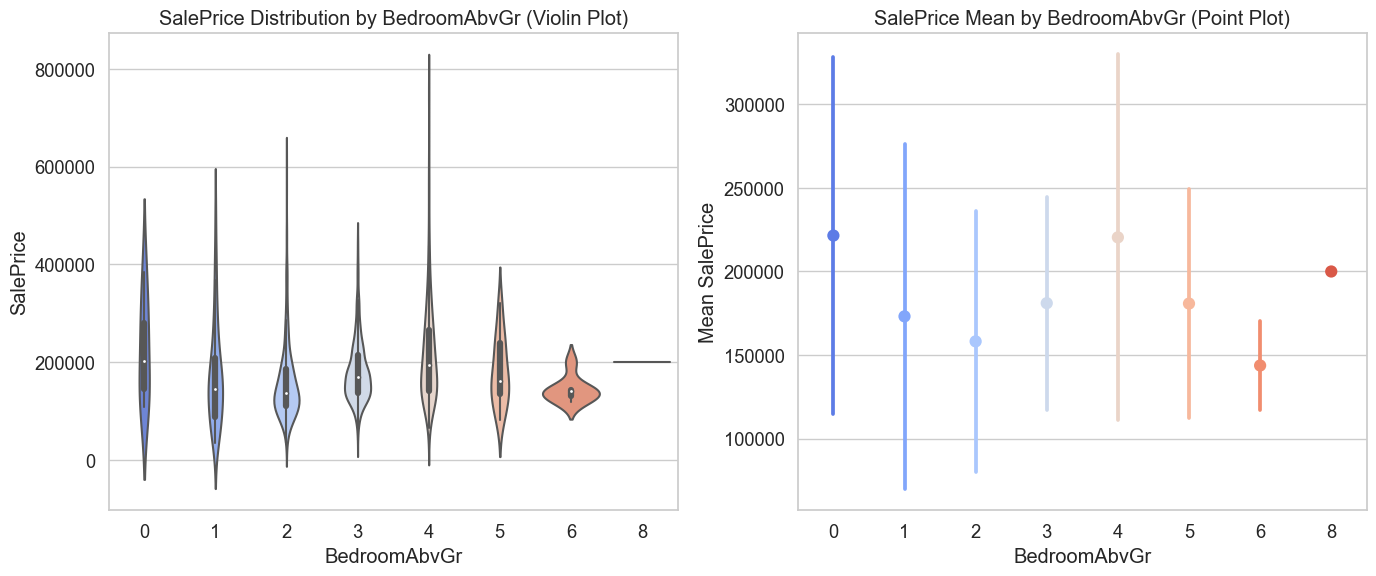

--------------------------------------------------------------------------------
KitchenAbvGr
--------------------------------------------------------------------------------
              Target Mean  Count  Ratio (%)
KitchenAbvGr                               
0              127500.000      3      0.103
1              183388.790   2785     95.409
2              131096.154    129      4.419
3              109500.000      2      0.069




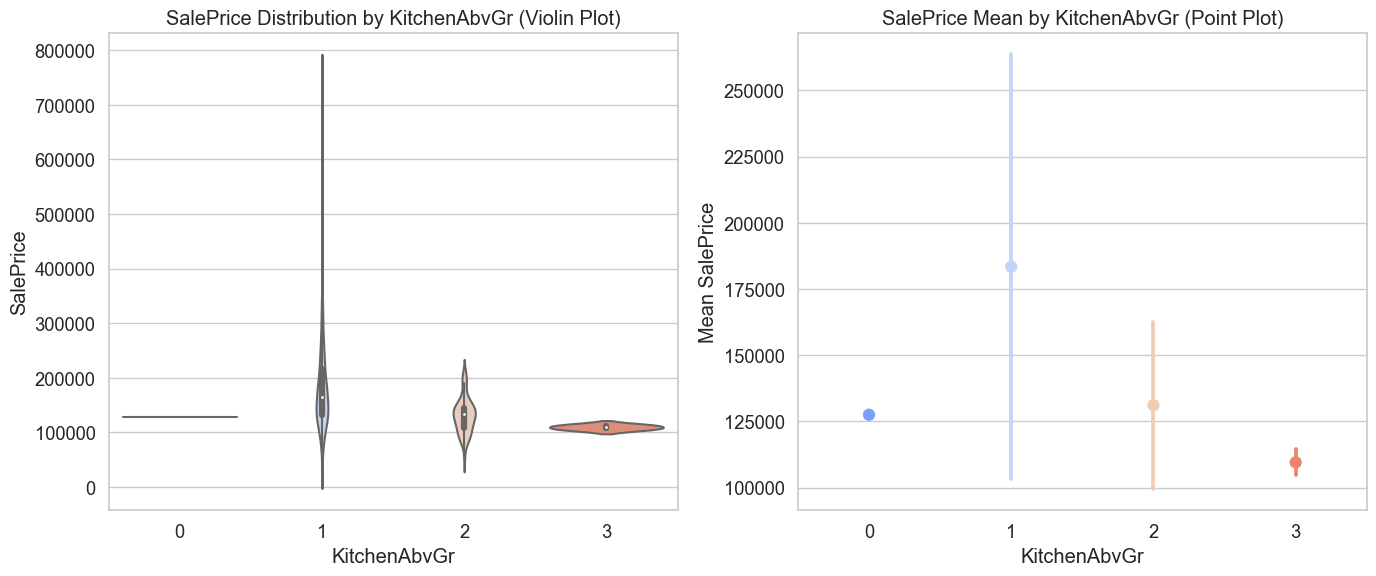

--------------------------------------------------------------------------------
Fireplaces
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
Fireplaces                               
0            141331.483   1420     48.647
1            211843.909   1268     43.440
2            240588.539    219      7.503
3            252000.000     11      0.377
4                   NaN      1      0.034




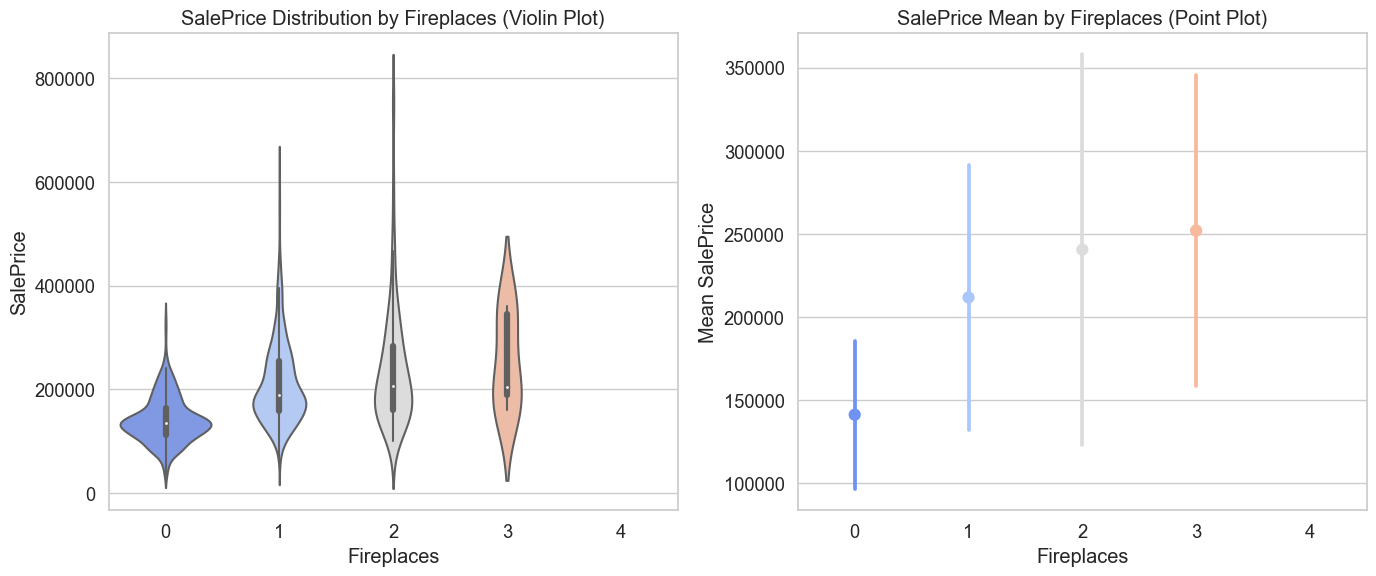

--------------------------------------------------------------------------------
GarageCars
--------------------------------------------------------------------------------
            Target Mean  Count  Ratio (%)
GarageCars                               
0.000        103317.284    157      5.379
1.000        128116.688    776     26.584
2.000        183851.664   1594     54.608
3.000        309636.122    374     12.813
4.000        192655.800     16      0.548
5.000               NaN      1      0.034




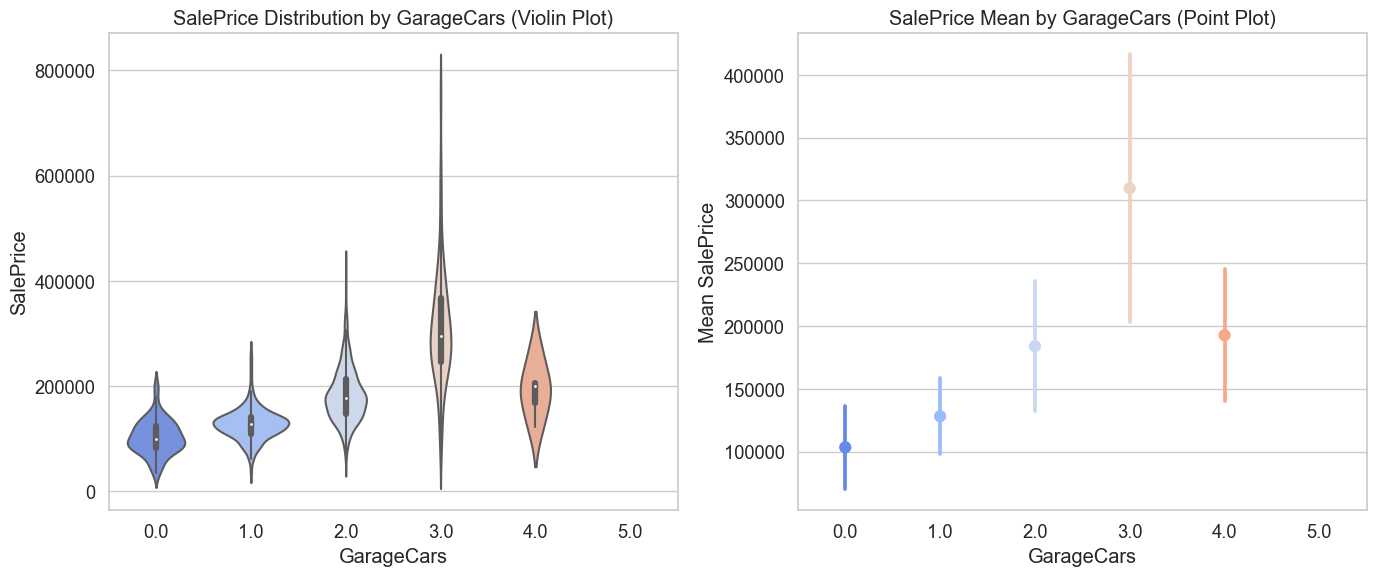

--------------------------------------------------------------------------------
YrSold
--------------------------------------------------------------------------------
        Target Mean  Count  Ratio (%)
YrSold                               
2006     182549.459    619     21.206
2007     186063.152    692     23.707
2008     177360.839    622     21.309
2009     179432.104    647     22.165
2010     177393.674    339     11.614




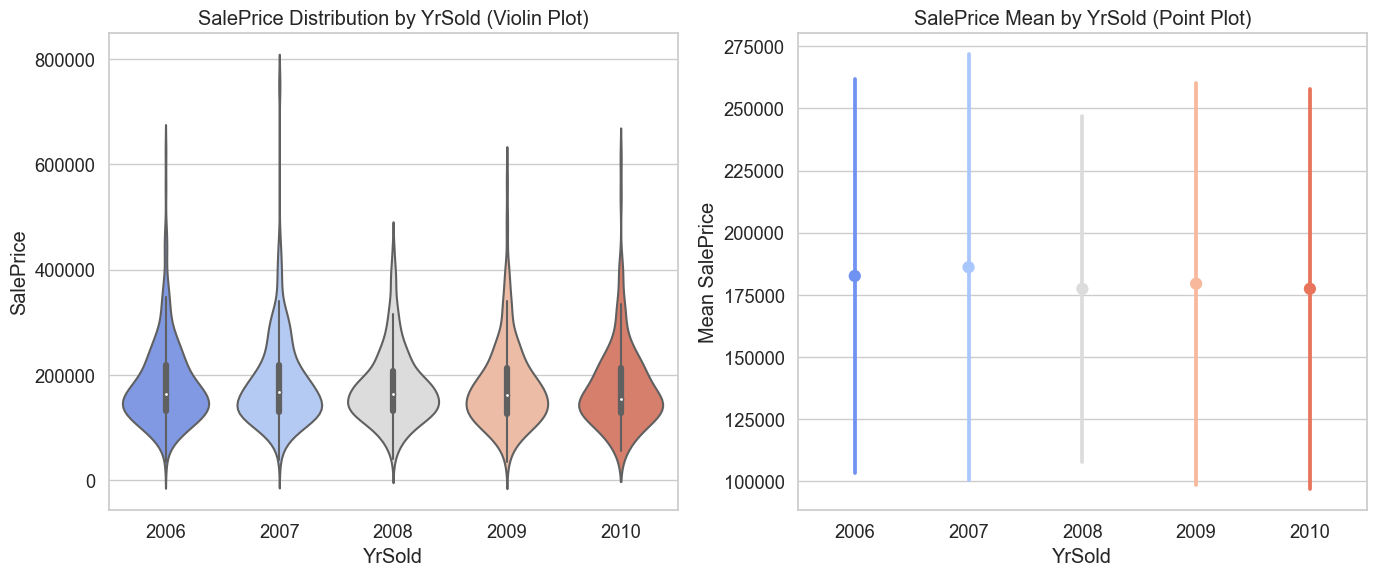

In [370]:
# Using For loop to execute the function for each categorical column.
for col in cat_cols:
    cat_by_target(house, 'SalePrice', col, plot=True) #type= ignore

#### 1.2.4 Numerical Variable Analysis 
-   Function to summarize and optionally plot numerical variables.

In [371]:
def to_analysis_num(dataframe, n_cols, bins=20, T=False, plot=False ): 
    """
    Analyze numerical columns in a DataFrame by providing descriptive statistics
    and optionally plotting boxplots.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    n_cols (list): A list of numerical columns to analyze.
    T (bool): If True, prints the descriptive statistics with specified quantiles.
    plot (bool): If True, plots Hist Plots.
    Density Calculation: Using density formula, calculates the normal distribution (Gaussian) density for the column data.
    
        """
    if not all(col in dataframe.columns for col in n_cols):
        raise ValueError("Some columns in n_cols do not exist in the DataFrame.")
    
    
    if T:                                # Transpose for better output
        quantiles = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99]#list of percentiles which included in the descriptive statistics.
        
        print(dataframe[n_cols].describe(percentiles=quantiles).T)

    if plot:
        num_cols = len(n_cols)
        fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(6 * num_cols, 6))
        
        if num_cols == 1:
            axs = [axs]  #  Convert the axl into List.
        # Columnwise Ploting the chart
        for i, col in enumerate(n_cols):
            # Histogram
            n, bins_hist, patches = axs[i].hist(dataframe[col], 
                                                bins=bins, density=True, 
                                                label=col, edgecolor='black', 
                                                alpha=0.9, color='#bad6fc')
            #Density
            density = 1/(dataframe[col].std() * (2 * np.pi)**0.5) * \
                      np.exp(-(bins_hist - dataframe[col].mean())**2 / (2 * dataframe[col].std()**2))
            axs[i].plot(bins_hist, density, color='#b1cffc', linewidth=1, label='Density')

            axs[i].set_title(f'Distribution of {col} Variable')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency / Density')
            axs[i].legend(loc='upper right')
            axs[i].grid(axis='y')
        
        plt.tight_layout()       
        plt.show()
        

                 count      mean      std      min       5%      25%      50%       75%       95%       99%        max
Id            2919.000  1460.000  842.787    1.000  146.900  730.500 1460.000  2189.500  2773.100  2889.820   2919.000
MSSubClass    2919.000    57.138   42.518   20.000   20.000   20.000   50.000    70.000   160.000   190.000    190.000
LotFrontage   2433.000    69.306   23.345   21.000   32.000   59.000   68.000    80.000   107.000   135.680    313.000
LotArea       2919.000 10168.114 7886.996 1300.000 3182.000 7478.000 9453.000 11570.000 17142.900 33038.640 215245.000
OverallQual   2919.000     6.089    1.410    1.000    4.000    5.000    6.000     7.000     8.000    10.000     10.000
YearBuilt     2919.000  1971.313   30.291 1872.000 1915.000 1953.500 1973.000  2001.000  2007.000  2008.000   2010.000
YearRemodAdd  2919.000  1984.264   20.894 1950.000 1950.000 1965.000 1993.000  2004.000  2007.000  2009.000   2010.000
MasVnrArea    2896.000   102.201  179.334    0.0

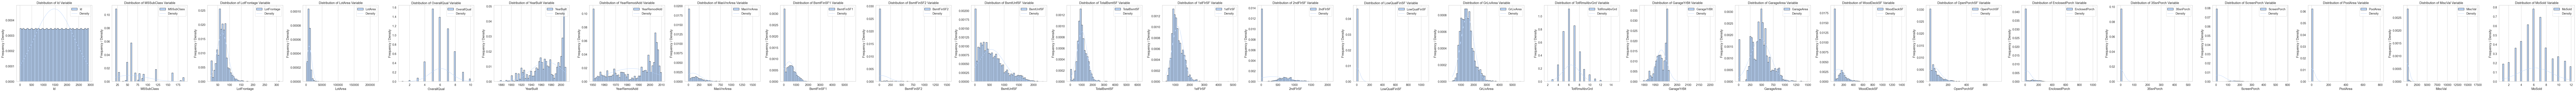

In [372]:
num_cols = [col for col in num_cols if 'SalePrice' not in col]
to_analysis_num(house, num_cols, bins=50, T=True, plot=True)

#### 1.2.5 Analysis of Numerical Variables by Target
-   Function to compare the means of numerical columns by the target variable.

In [373]:
def num_by_target (dataframe, target):
    dataframe[target].hist(bins=100, alpha=0.7, color='#6c94dc')

    plt.title('Distribution of SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Frequency')
    plt.show()


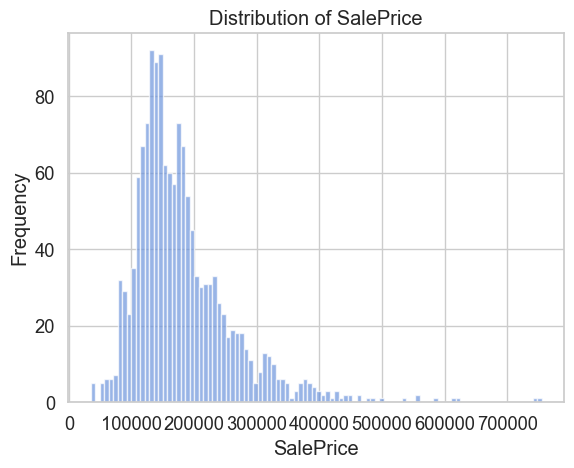

In [374]:
num_by_target(house,'SalePrice')

#### 1.2.5 Finding Ouliers Analysis in Dataset
-   Function to calculate outlier in Dataset.

In [375]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    # Calculate the first and third quartiles
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    
    # Compute the interquartile range (IQR)
    interquantile_range = quartile3 - quartile1
    
    # Determine the upper and lower limits for outliers
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range

   # Return the lower and upper limits
    return low_limit, up_limit


In [376]:
def check_outlier(dataframe, col_name):
    # Get the lower and upper limits for outliers
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    
    # Print the limits for debugging
    print(f"{col_name} - Low limit: {low_limit}, Up limit: {up_limit}")
    
    # Check if any values are outside the limits
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
            

In [377]:
from tabulate import tabulate

# Create a list to store the results
results = []

# Iterate through each column in num_cols
for col in num_cols:
    # Check for outliers and store the result
    has_outliers = check_outlier(house, col)
    results.append([col, has_outliers])

# Print the results in a tabular format
print(tabulate(results, headers=['Column', 'Has Outliers'], tablefmt='pretty'))

Id - Low limit: -3792.3999999999996, Up limit: 6712.4
MSSubClass - Low limit: -190.0, Up limit: 370.0
LotFrontage - Low limit: -80.5, Up limit: 219.5
LotArea - Low limit: -17759.35, Up limit: 38084.25
OverallQual - Low limit: -2.0, Up limit: 14.0
YearBuilt - Low limit: 1777.0, Up limit: 2145.0
YearRemodAdd - Low limit: 1864.5, Up limit: 2092.5
MasVnrArea - Low limit: -699.75, Up limit: 1166.25
BsmtFinSF1 - Low limit: -1911.0, Up limit: 3185.0
BsmtFinSF2 - Low limit: -652.5, Up limit: 1087.5
BsmtUnfSF - Low limit: -2212.350000000001, Up limit: 3687.2500000000014
TotalBsmtSF - Low limit: -1526.1000000000001, Up limit: 3757.5
1stFlrSF - Low limit: -1080.3999999999996, Up limit: 3576.3999999999996
2ndFlrSF - Low limit: -1696.7999999999997, Up limit: 2827.9999999999995
LowQualFinSF - Low limit: 0.0, Up limit: 0.0
GrLivArea - Low limit: -1543.7999999999997, Up limit: 4869.0
TotRmsAbvGrd - Low limit: -3.5, Up limit: 16.5
GarageYrBlt - Low limit: 1809.5, Up limit: 2125.5
GarageArea - Low limit

In [378]:
#Our dataset has some outliers.
#We will use the IQR method to detect and remove outliers.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    

In [379]:
for col in num_cols:
    if col != 'SalePrice':
        replace_with_thresholds(house, col)

In [380]:
#from tabulate import tabulate

# Create a list to store the results
results = []
# Iterate through each column in num_cols
for col in num_cols:
    # Check for outliers and store the result
    has_outliers = check_outlier(house, col)
    results.append([col, has_outliers])
# Print the results in a tabular format
print(tabulate(results, headers=['Column', 'Has Outliers'], tablefmt='pretty'))

Id - Low limit: -3792.3999999999996, Up limit: 6712.4
MSSubClass - Low limit: -190.0, Up limit: 370.0
LotFrontage - Low limit: -80.5, Up limit: 219.5
LotArea - Low limit: -17759.35, Up limit: 38084.25
OverallQual - Low limit: -2.0, Up limit: 14.0
YearBuilt - Low limit: 1777.0, Up limit: 2145.0
YearRemodAdd - Low limit: 1864.5, Up limit: 2092.5
MasVnrArea - Low limit: -699.75, Up limit: 1166.25
BsmtFinSF1 - Low limit: -1911.0, Up limit: 3185.0
BsmtFinSF2 - Low limit: -652.5, Up limit: 1087.5
BsmtUnfSF - Low limit: -2212.350000000001, Up limit: 3687.2500000000014
TotalBsmtSF - Low limit: -1526.1000000000001, Up limit: 3757.5
1stFlrSF - Low limit: -1080.3999999999996, Up limit: 3576.3999999999996
2ndFlrSF - Low limit: -1696.7999999999997, Up limit: 2827.9999999999995
LowQualFinSF - Low limit: 0.0, Up limit: 0.0
GrLivArea - Low limit: -1543.7999999999997, Up limit: 4869.0
TotRmsAbvGrd - Low limit: -3.5, Up limit: 16.5
GarageYrBlt - Low limit: 1809.5, Up limit: 2125.5
GarageArea - Low limit

### 1.2.6 Correlation Analysis
-   Showing  correlation matrix for numerical variables.

In [381]:
from matplotlib.colors import LinearSegmentedColormap
def corr_by_num(dataframe, target, n_cols, plot=False):
    num_df = dataframe[n_cols]
    corr_matrix = num_df.corr()
    print('-' * 80)

    corr_with_tar = num_df.corrwith(dataframe[target]).sort_values(ascending=False)
    highest_corr = corr_with_tar.drop(target).idxmax()
    highest_corr_value = corr_with_tar[highest_corr]
    print(f'Highest Correlation: {highest_corr} ({highest_corr_value})')
    print('-' * 80)

    if plot:
        custom_cmap = LinearSegmentedColormap.from_list('custom', ['yellow','red'])
        plt.figure(figsize=[20, 15])
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=custom_cmap,
                    linewidths=.5,linecolor='black', cbar_kws={'label': 'Scale'})
        plt.title('Correlation Matrix:', fontsize=20)
        plt.xticks(fontsize=7, rotation=40)
        plt.yticks(fontsize=7, rotation=0)
        plt.tight_layout()
        plt.show()

--------------------------------------------------------------------------------
Highest Correlation: OverallQual (0.7909816005838052)
--------------------------------------------------------------------------------


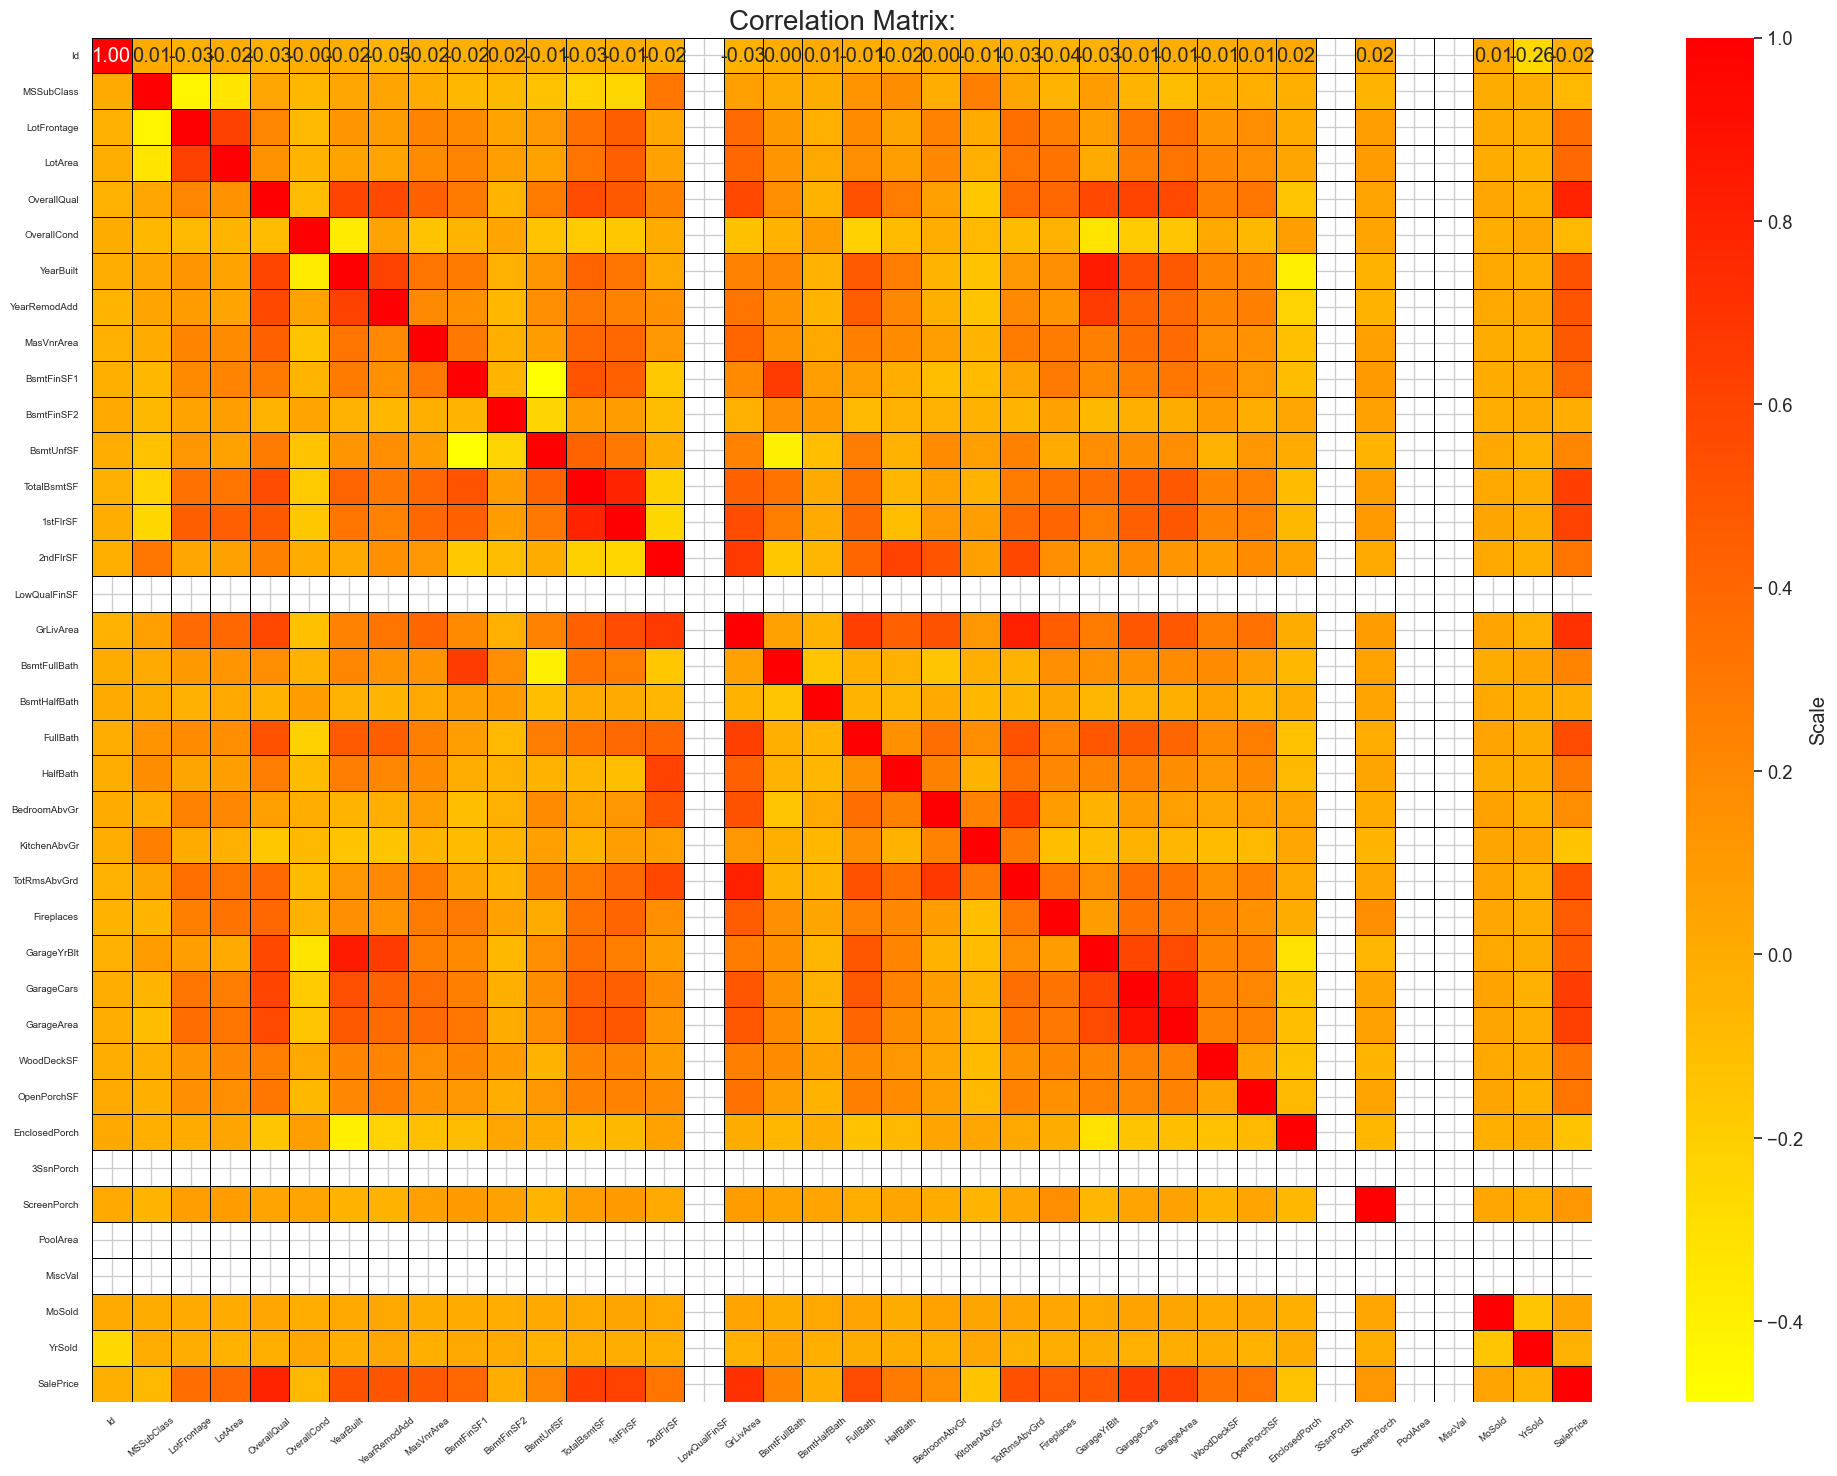

In [382]:
num_cols = house.select_dtypes(include= ['float64', 'int64']).columns.tolist()  
corr_by_num(house, 'SalePrice', num_cols, plot=True) 

# num_cols = house.select_dtypes(include= ['float64', 'int64']).columns.tolist()  # to get all numerical 
# corr_by_num(house, 'SalePrice', num_cols, plot=True)

#### 1.2.7 Missing Value Analysis

In [383]:
from tabulate import tabulate

# Calculate missing values per column, sort them, and convert to a DataFrame
missing_values = house.isnull().sum().sort_values(ascending=False).reset_index()
missing_values.columns = ['Column', 'Missing_Value']

# Print the results in a tabular format
print(tabulate(missing_values, headers='keys', tablefmt='pretty'))


+----+---------------+---------------+
|    |    Column     | Missing_Value |
+----+---------------+---------------+
| 0  |    PoolQC     |     2909      |
| 1  |  MiscFeature  |     2814      |
| 2  |     Alley     |     2721      |
| 3  |     Fence     |     2348      |
| 4  |  MasVnrType   |     1766      |
| 5  |   SalePrice   |     1459      |
| 6  |  FireplaceQu  |     1420      |
| 7  |  LotFrontage  |      486      |
| 8  |  GarageYrBlt  |      159      |
| 9  | GarageFinish  |      159      |
| 10 |  GarageQual   |      159      |
| 11 |  GarageCond   |      159      |
| 12 |  GarageType   |      157      |
| 13 | BsmtExposure  |      82       |
| 14 |   BsmtCond    |      82       |
| 15 |   BsmtQual    |      81       |
| 16 | BsmtFinType2  |      80       |
| 17 | BsmtFinType1  |      79       |
| 18 |  MasVnrArea   |      23       |
| 19 |   MSZoning    |       4       |
| 20 |  Functional   |       2       |
| 21 | BsmtFullBath  |       2       |
| 22 |   Utilities   |   

In [384]:
# Function for calculate the Missing value in data frame.
def missing_values_table(dataframe, na_name=False):
    # Identify columns with missing values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    
    # Calculate the number of missing values in each column
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    
    # Calculate the percentage of missing values in each column
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    # Create a DataFrame to store the results
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    
    # Print the results
    print(tabulate(missing_df, headers='keys', tablefmt='pretty'))

    #print(missing_df, end='\n')
    
    # Optionally return the names of columns with missing values
    if na_name:
        return na_columns

In [385]:
# Identify columns with missing values and describe them
na_columns = missing_values_table(house, na_name=True)
print(tabulate(house[na_columns].describe().T, headers='keys', tablefmt='pretty'))


+--------------+--------+-------+
|              | n_miss | ratio |
+--------------+--------+-------+
|    PoolQC    | 2909.0 | 99.66 |
| MiscFeature  | 2814.0 | 96.4  |
|    Alley     | 2721.0 | 93.22 |
|    Fence     | 2348.0 | 80.44 |
|  MasVnrType  | 1766.0 | 60.5  |
|  SalePrice   | 1459.0 | 49.98 |
| FireplaceQu  | 1420.0 | 48.65 |
| LotFrontage  | 486.0  | 16.65 |
|  GarageCond  | 159.0  | 5.45  |
| GarageYrBlt  | 159.0  | 5.45  |
| GarageFinish | 159.0  | 5.45  |
|  GarageQual  | 159.0  | 5.45  |
|  GarageType  | 157.0  | 5.38  |
| BsmtExposure |  82.0  | 2.81  |
|   BsmtCond   |  82.0  | 2.81  |
|   BsmtQual   |  81.0  | 2.77  |
| BsmtFinType2 |  80.0  | 2.74  |
| BsmtFinType1 |  79.0  | 2.71  |
|  MasVnrArea  |  23.0  | 0.79  |
|   MSZoning   |  4.0   | 0.14  |
|  Functional  |  2.0   | 0.07  |
| BsmtHalfBath |  2.0   | 0.07  |
| BsmtFullBath |  2.0   | 0.07  |
|  Utilities   |  2.0   | 0.07  |
| KitchenQual  |  1.0   | 0.03  |
| TotalBsmtSF  |  1.0   | 0.03  |
|  BsmtUnfSF  

In [386]:
# Function to fill out some missing values with 'No'.
def fill_with_no(house, na_cols):
    for col in na_cols:
        house[col].fillna((f'No'), inplace=True)

In [387]:
from tabulate import tabulate
some_na_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

fill_with_no(house, some_na_cols)

print(tabulate(house[some_na_cols].head(), headers='keys', tablefmt='pretty'))


+---+-------+----------+----------+--------------+--------------+--------------+-------------+------------+--------------+------------+------------+--------+-------+-------------+
|   | Alley | BsmtQual | BsmtCond | BsmtExposure | BsmtFinType1 | BsmtFinType2 | FireplaceQu | GarageType | GarageFinish | GarageQual | GarageCond | PoolQC | Fence | MiscFeature |
+---+-------+----------+----------+--------------+--------------+--------------+-------------+------------+--------------+------------+------------+--------+-------+-------------+
| 0 |  No   |    Gd    |    TA    |      No      |     GLQ      |     Unf      |     No      |   Attchd   |     RFn      |     TA     |     TA     |   No   |  No   |     No      |
| 1 |  No   |    Gd    |    TA    |      Gd      |     ALQ      |     Unf      |     TA      |   Attchd   |     RFn      |     TA     |     TA     |   No   |  No   |     No      |
| 2 |  No   |    Gd    |    TA    |      Mn      |     GLQ      |     Unf      |     TA      |   Att

In [388]:
house[some_na_cols].describe().T

count unique     top  freq
Alley         2919      3      No  2721
BsmtQual      2919      5      TA  1283
BsmtCond      2919      5      TA  2606
BsmtExposure  2919      4      No  1986
BsmtFinType1  2919      7     Unf   851
BsmtFinType2  2919      7     Unf  2493
FireplaceQu   2919      6      No  1420
GarageType    2919      7  Attchd  1723
GarageFinish  2919      4     Unf  1230
GarageQual    2919      6      TA  2604
GarageCond    2919      6      TA  2654
PoolQC        2919      4      No  2909
Fence         2919      5      No  2348
MiscFeature   2919      5      No  2814

In [389]:
#Function to fill out the rest of missing values.

from tabulate import tabulate
print(tabulate(missing_values_table(house, na_name=True), headers='keys', tablefmt='pretty'))

+--------------+--------+-------+
|              | n_miss | ratio |
+--------------+--------+-------+
|  MasVnrType  | 1766.0 | 60.5  |
|  SalePrice   | 1459.0 | 49.98 |
| LotFrontage  | 486.0  | 16.65 |
| GarageYrBlt  | 159.0  | 5.45  |
|  MasVnrArea  |  23.0  | 0.79  |
|   MSZoning   |  4.0   | 0.14  |
| BsmtFullBath |  2.0   | 0.07  |
| BsmtHalfBath |  2.0   | 0.07  |
|  Functional  |  2.0   | 0.07  |
|  Utilities   |  2.0   | 0.07  |
| Exterior2nd  |  1.0   | 0.03  |
|  BsmtFinSF1  |  1.0   | 0.03  |
|  BsmtFinSF2  |  1.0   | 0.03  |
|  BsmtUnfSF   |  1.0   | 0.03  |
| Exterior1st  |  1.0   | 0.03  |
|  Electrical  |  1.0   | 0.03  |
| KitchenQual  |  1.0   | 0.03  |
|  GarageCars  |  1.0   | 0.03  |
|  GarageArea  |  1.0   | 0.03  |
|   SaleType   |  1.0   | 0.03  |
| TotalBsmtSF  |  1.0   | 0.03  |
+--------------+--------+-------+
+---+---+---+---+---+---+---+---+
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
+---+---+---+---+---+---+---+---+
| M | S | Z | o | n | i | n | g |
| L | o | t | 

In [390]:
# Function define for identify the missing values and showing before and After imputation. 
 
def quick_missing_imp(data, num_method='median', cat_length=20, target='SalePrice'):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
    temp_target = data[target]
    
    heading('--BEFORE--')
    #print(missing_values_table(house, na_name=True), headers='keys', tablefmt='pretty'))
    print(data[variables_with_na].isnull().sum(), '\n\n')
   
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == 'O' and len(x.unique()) <= cat_length) else x, axis=0)
    if num_method == 'mean':
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != 'O' else x, axis=0)
    elif num_method == 'median':
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != 'O' else x, axis=0)
    data[target] = temp_target
    
    heading("--AFTER-- \n Imputation method is 'MODE' for categorical variables!")
   
    heading(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    
    print(data[variables_with_na].isnull().sum(), "\n\n")
    return data

house = quick_missing_imp(house, num_method='median', cat_length=17)


--------------------------------------------------
--BEFORE--
--------------------------------------------------
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


--------------------------------------------------
--AFTER-- 
 IMPUTATION METHOD IS 'MODE' FOR CATEGORICAL VARIABLES!
--------------------------------------------------
--------------------------------------------------
 IMPUTATION METHOD IS 'MEDIAN' FOR NUMERIC VARIABLES! 

--------------------------------------------------
MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        

In [391]:
# To verify if missing values have been addressed.

house.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

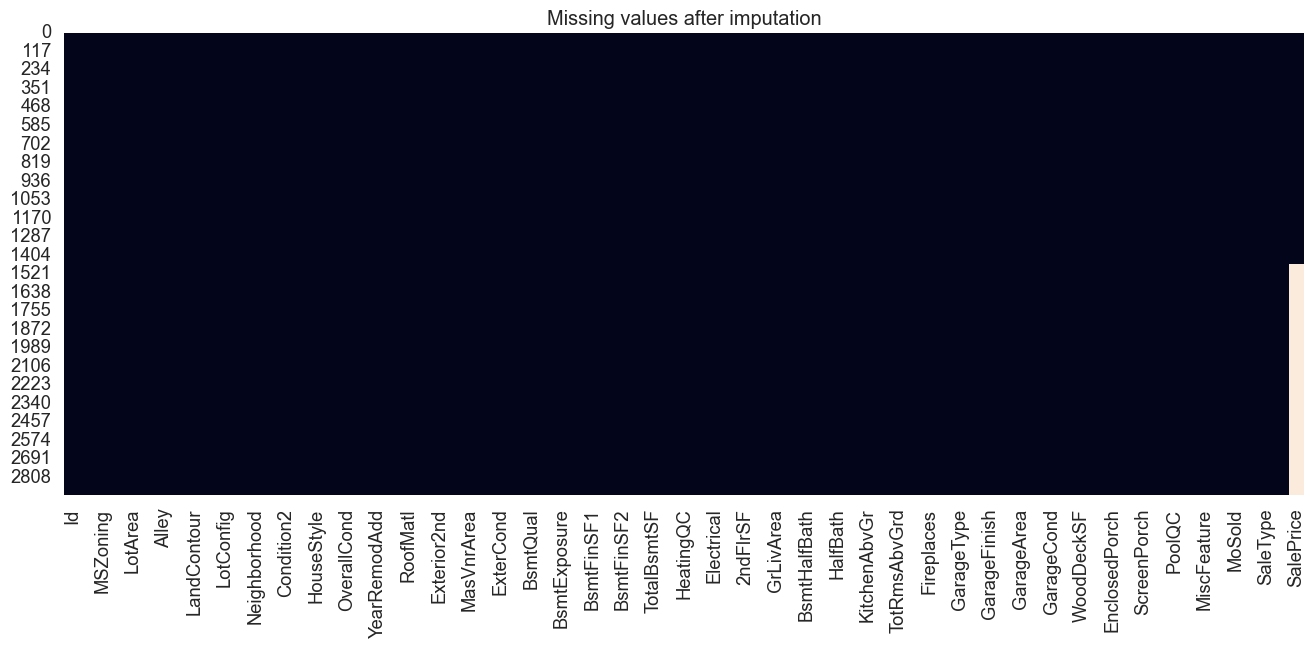

In [392]:
# Plotting heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(house.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

- Function is used to identify and categorize columns in a DataFrame based on their data types

In [393]:
cat_cols, cat_but_car, num_cols = grab_col_names(house,car_th=35)

Observations: 2919
Variables: 81
cat_cols: 57
num_cols: 24
cat_but_car: 0
num_but_cat: 14


- Quick understanding the structure and characteristics of a DataFrame.

In [394]:
def identify_check(house):
    # Check the shape of the DataFrame
    
    shape = house.shape
    
    # Data types of each column
    dtypes = house.dtypes
    
    # Check for missing values
    missing_values = house.isnull().sum()
    
    # Count unique values for each column
    unique_values = house.nunique()
    
    # Basic statistics for numerical columns
    stats = house.describe()
    
    # Categorical columns overview
    cat_overview = {col: house[col].value_counts() for col in house.select_dtypes(include=['object']).columns}
    
    # Compile results into a dictionary
    results = {
        'shape':  shape,
        'data_types': dtypes,
        'missing_values': missing_values,
        'unique_values': unique_values,
        'basic_statistics': stats,
        'categorical_overview': cat_overview
    }
    
    return results
heading('Dataframe Information')  # type: ignore
check_results = identify_check(house) # type: ignore
print ("\n",check_results)

--------------------------------------------------
DATAFRAME INFORMATION
--------------------------------------------------

 {'shape': (2919, 81), 'data_types': Id               float64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd     float64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1 

-   To analyze the relationship between rare categories with little impact and dependent variable.

In [395]:
def rare_cat(dataframe, target, c_cols):
    for col in c_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        
        print(pd.DataFrame({'Count': dataframe[col].value_counts(),
                            'Ratio %': dataframe[col].value_counts() / len(dataframe),
                            'Target Mean': dataframe.groupby(col)[target].mean()}), end='\n\n\n')

rare_cat(house, 'SalePrice', cat_cols)

MSZoning : 5
          Count  Ratio %  Target Mean
MSZoning                             
C (all)      25    0.009    74528.000
FV          139    0.048   214014.062
RH           26    0.009   131558.375
RL         2269    0.777   191004.995
RM          460    0.158   126316.830


Street : 2
        Count  Ratio %  Target Mean
Street                             
Grvl       12    0.004   130190.500
Pave     2907    0.996   181130.539


Alley : 3
       Count  Ratio %  Target Mean
Alley                             
Grvl     120    0.041   122219.080
No      2721    0.932   183452.131
Pave      78    0.027   168000.585


LotShape : 4
          Count  Ratio %  Target Mean
LotShape                             
IR1         968    0.332   206101.665
IR2          76    0.026   239833.366
IR3          16    0.005   216036.500
Reg        1859    0.637   164754.818


LandContour : 4
             Count  Ratio %  Target Mean
LandContour                             
Bnk            117    0.040   1431

### 1.3 Feature Engineering

#### 1.3.1 Base Model
 - Make a copy of the original dataframe for model training to save original data and exclude the target variable 'SalePrice' from the list of categorical columns.
- Encoding categorical variables in a DataFrame using label encoding for binary columns and one-hot encoding for other categorical columns for our base model.

In [396]:
base_house = house.copy() # Creating a copy of Dataframe.

In [397]:
# Label Encoding function for Binary Columns 

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [398]:
# Identifying Binary Columns

binary_cols = [col for col in house.columns if house[col].dtypes == 'O' and len(house[col].unique()) == 2]

#Applying Label Encoding

for col in binary_cols:
    label_encoder(base_house, col)
    
# One-Hot Encoding for Categorical Columns

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return dataframe    
# Applying One-Hot Encoding on dataframe
base_house = one_hot_encoder(base_house, cat_cols, drop_first=True)

base_house.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0 1.000          60       65.000  8450.000            7       2003      2003.000     196.000     706.000       0.000    150.000      856.000   856.000   854.000   
1 2.000          20       80.000  9600.000            6       1976      1976.000       0.000     978.000       0.000    284.000     1262.000  1262.000     0.000   
2 3.000          60       68.000 11250.000            7       2001      2002.000     162.000     486.000       0.000    434.000      920.000   920.000   866.000   
3 4.000          70       60.000  9550.000            7       1915      1970.000       0.000     216.000       0.000    540.000      756.000   961.000   756.000   
4 5.000          60       84.000 14260.000            8       2000      2000.000     350.000     655.000       0.000    490.000     1145.000  1145.000  1053.000   

   GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0   1710.000         8.000     2003.000     548.000           0       61.000              0        0.000   2.000 208500.000            0            0            1   
1   1262.000         6.000     1976.000     460.000         298        0.000              0        0.000   5.000 181500.000            0            0            1   
2   1786.000         6.000     2001.000     608.000           0       42.000              0        0.000   9.000 223500.000            0            0            1   
3   1717.000         7.000     1998.000     642.000           0       35.000            272        0.000   2.000 140000.000            0            0            1   
4   2198.000         9.000     2000.000     836.000         192       84.000              0        0.000  12.000 250000.000            0            0            1   

   MSZoning_RM  Street_1  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_1  \
0            0         1         1           0             0             0             1                0                0                1            0   
1            0         1         1           0             0             0             1                0                0                1            0   
2            0         1         1           0             0             0             0                0                0                1            0   
3            0         1         1           0             0             0             0                0                0                1            0   
4            0         1         1           0             0             0             0                0                0                1            0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                  0              0              0                 1              0              0                     0                    0                     0   
1                  0              1              0                 0              0              0                     0                    0                     0   
2                  0              0              0                 1              0              0                     0                    0                     0   
3                  0              0              0                 0              0              0                     0                    0                     0   
4                  0              1              0                 0              0              0                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_E

In [399]:
# Splitting the Data into Training and Testing Sets

train_base = base_house[base_house['SalePrice'].notnull()]
test_base = base_house[base_house['SalePrice'].isnull()]

# Defining the Target Variable and Features
y = train_base['SalePrice']
X = train_base.drop(['SalePrice'], axis=1)

# Splitting the Training Data into Training and Validation Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=34)


In [400]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
train_base= base_house[base_house['SalePrice'].notnull()]
test_base = base_house[base_house['SalePrice'].isnull()]

y = train_base['SalePrice']
X = train_base.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('XGB', XGBRegressor()),
          ("LightGBM", XGBRegressor(force_row_wise=True, verbose=-1)), 
          ('CatBoost', CatBoostRegressor(verbose=False))]

for name, model in models:
    rmse = np.mean(np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')))
    
    print(f"RMSE: {round(rmse, 4)} ({name})")


RMSE: 54437.4617 (LR)
RMSE: 47061.8602 (KNN)
RMSE: 40386.8705 (CART)
RMSE: 29960.8371 (RF)
RMSE: 28298.7011 (XGB)
RMSE: 28298.7011 (LightGBM)
RMSE: 25701.3946 (CatBoost)


#### Observations regarding Base Model features:

In the output of the models evaluated, the RMSE values for various models are as follows :
- Linear Regression (LR): RMSE = 54,244.0311
- K-Nearest Neighbors (KNN): RMSE = 45,971.5412
- Classification and Regression Trees (CART): RMSE = 41,092.3005
- Random Forest (RF): RMSE = 30,218.261
- XGBoost (XGB): RMSE = 28,270.4271
- LightGBM: RMSE = 29,054.2563
- CatBoost: RMSE = 25,472.6435

From these results, it's clear that CatBoost has the lowest RMSE, indicating that it has the best performance among the models tested in terms of prediction accuracy.

##### Reasons for Preferring CatBoost
-   Handling Categorical Features:
CatBoost is specifically designed to handle categorical data efficiently without requiring extensive preprocessing, such as one-hot encoding. 
-  Reduced Overfitting:
The model incorporates mechanisms to prevent overfitting, such as ordered boosting, which helps ensure that the model generalizes well to unseen data. This is crucial in real-world applications where model robustness is necessary .
- High Performance and Speed:
CatBoost is known for its fast training times and high accuracy, even on large and complex datasets. Its symmetric tree structure and efficient handling of features contribute to its superior performance compared to other models like XGBoost and LightGBM 
 

In [401]:
%%time
# Step 1: Initialize the CatBoostRegressor model with specified parameters
catboost_model = CatBoostRegressor(verbose=False, random_state=42)

# Step 2: Fit the model to the training data
base_final_model = catboost_model.fit(X_train, y_train)

# Step 3: Print a separator and model information
separator = '-' * 10
print(f"{separator} Base Model {separator}")

# Step 4: Calculate RMSE for the CatBoost model (rmse is already defined in above base model)
print(f"RMSE: {round(rmse, 4)} (CatBoost)")

---------- Base Model ----------
RMSE: 25701.3946 (CatBoost)
CPU times: total: 10.2 s
Wall time: 6.22 s


##### 1.3.2 Identify the important Features 
-   The following are the important features of the proposed system:


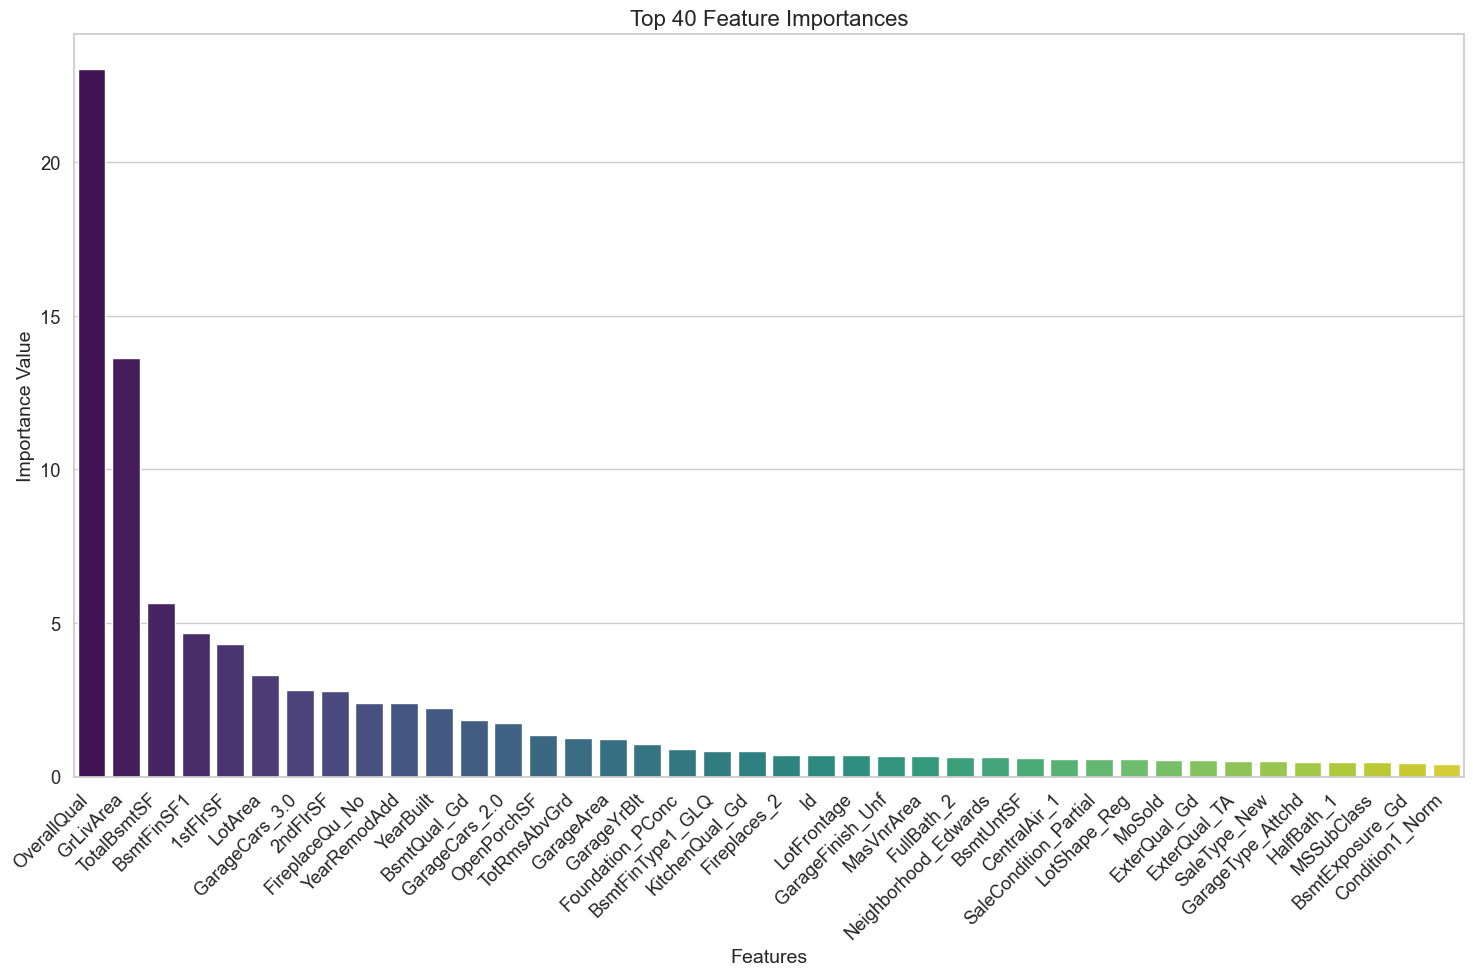

In [402]:
def plot_importance(model, features, dataframe, save=False):
    # Step 1: Create a DataFrame for feature importances
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})

    # Step 2: Sort the DataFrame by importance values
    feature_imp_sorted = feature_imp.sort_values(by='Value', ascending=False).head(40)

    # Step 3: Create a vertical bar plot for feature importances
    plt.figure(figsize=(15, 10))
    sns.set_theme(style="whitegrid", font_scale=1.2)
    
    # Use a vertical bar plot
    sns.barplot(x='Feature', y='Value', data=feature_imp_sorted, palette='viridis')
    
    # Step 4: Customize the plot
    plt.title('Top 40 Feature Importances', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Importance Value', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
    plt.tight_layout()
    
    # Step 5: Show the plot
    plt.show()
    
    # Step 6: Save the plot if requested
    if save:
        plt.savefig('importances_vertical.png')

# Call the function with the model and training data
plot_importance(base_final_model, X_train, base_house) # type: ignore

##### 1.3.3 Transforming Data: The Art of Feature Extraction

In [403]:
def to_create_features(house):
    new_house = house.copy()

    # Calculate total floor area by summing the first and second floor areas
    new_house['NEW_TotalFlrSF'] = new_house['1stFlrSF'] + new_house['2ndFlrSF']

    # Calculate total basement finished area by summing the two basement finished areas
    new_house['NEW_TotalBsmtFin'] = new_house['BsmtFinSF1'] + new_house['BsmtFinSF2']

    # Calculate total porch area by summing all porch-related areas
    new_house['NEW_PorchArea'] = new_house['OpenPorchSF'] + new_house['EnclosedPorch'] + new_house['ScreenPorch'] + new_house['3SsnPorch'] + new_house['WoodDeckSF']

    # Calculate total house area by summing total floor area and total basement area
    new_house['NEW_TotalHouseArea'] = new_house['NEW_TotalFlrSF'] + new_house['TotalBsmtSF']

    # Calculate total square feet by summing above ground living area and total basement area
    new_house['NEW_TotalSqFeet'] = new_house['GrLivArea'] + new_house['TotalBsmtSF']

    # Calculate the ratio of ground living area to lot area
    new_house['NEW_LotRatio'] = new_house['GrLivArea'] / new_house['LotArea']

    # Calculate the ratio of total house area to lot area
    new_house['NEW_RatioArea'] = new_house['NEW_TotalHouseArea'] / new_house['LotArea']

    # Calculate overall grade by multiplying overall quality and overall condition
    new_house['NEW_OverallGrade'] = new_house['OverallQual'] * new_house['OverallCond']

    # Calculate years since the house was remodeled
    new_house['NEW_Restoration'] = new_house['YearRemodAdd'] - new_house['YearBuilt']

    # Calculate the age of the house
    new_house['NEW_HouseAge'] = new_house['YrSold'] - new_house['YearBuilt']

    # Calculate years since the house was remodeled at the time of sale
    new_house['NEW_RestorationAge'] = new_house['YrSold'] - new_house['YearRemodAdd']

    # Calculate years since the garage was built at the time of sale
    new_house['NEW_GarageSold'] = new_house['YrSold'] - new_house['GarageYrBlt']

    # Calculate total square footage by summing basement and both floor areas
    new_house['NEW_TotalSF'] = new_house['TotalBsmtSF'] + new_house['1stFlrSF'] + new_house['2ndFlrSF']

    # Calculate total number of bathrooms considering full and half baths
    new_house['NEW_TotalBath'] = new_house['FullBath'] + (0.5 * new_house['HalfBath']) + new_house['BsmtFullBath'] + (0.5 * new_house['BsmtHalfBath'])

    # Calculate total porch square footage by summing relevant areas
    new_house['NEW_TotalPorchSF'] = new_house['OpenPorchSF'] + new_house['EnclosedPorch'] + new_house['3SsnPorch'] + new_house['ScreenPorch']

    # Calculate the ratio of ground living area to the number of rooms above ground
    new_house['NEW_RoomPerArea'] = new_house['GrLivArea'] / new_house['TotRmsAbvGrd']

    # Create binary feature indicating if there is a pool
    new_house['NEW_HasPool'] = new_house['PoolQC'].apply(lambda x: 0 if pd.isnull(x) else 1)

    # Create binary feature indicating if there is a miscellaneous feature
    new_house['NEW_HasMiscFeature'] = new_house['MiscFeature'].apply(lambda x: 0 if pd.isnull(x) else 1)

    # Create binary feature indicating if there is an alley
    new_house['NEW_HasAlley'] = new_house['Alley'].apply(lambda x: 0 if pd.isnull(x) else 1)

    # Create binary feature indicating if there is a fence
    new_house['NEW_HasFence'] = new_house['Fence'].apply(lambda x: 0 if pd.isnull(x) else 1)

    # Create binary feature indicating if the house has central air conditioning
    new_house['NEW_HasCentralAir'] = new_house['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

    # Create binary feature indicating if the house was sold in winter
    new_house['NEW_IsSoldInWinter'] = new_house['MoSold'].apply(lambda x: 1 if x in [12, 1, 2] else 0)

    # Create binary feature indicating if the house was sold in summer
    new_house['NEW_IsSoldInSummer'] = new_house['MoSold'].apply(lambda x: 1 if x in [6, 7, 8] else 0)

    # Calculate exterior score by summing mapped values of exterior quality and condition
    new_house['NEW_ExterScore'] = (new_house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}) + new_house['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}))

    # Calculate the logarithm of ground living area
    new_house['NEW_LogGrLivArea'] = np.log1p(new_house['GrLivArea'])

    # Calculate the logarithm of sale price
    new_house['NEW_LogSalePrice'] = np.log1p(new_house['SalePrice'])

    # Normalize ground living area
    new_house['NEW_NormalizedGrLivArea'] = (new_house['GrLivArea'] - new_house['GrLivArea'].mean()) / new_house['GrLivArea'].std()

    # Normalize sale price
    new_house['NEW_NormalizedSalePrice'] = (new_house['SalePrice'] - new_house['SalePrice'].mean()) / new_house['SalePrice'].std()

    # Calculate the age of the house at the time of sale
    new_house['NEW_AgeAtSale'] = new_house['YrSold'] - new_house['YearBuilt']

    # Calculate years since the house was remodeled at the time of sale
    new_house['NEW_YearsSinceRemod'] = new_house['YrSold'] - new_house['YearRemodAdd']

    # Calculate overall quality score by multiplying overall quality and overall condition
    new_house['NEW_QualityScore'] = new_house['OverallQual'] * new_house['OverallCond']

    # Calculate total square footage by summing basement and both floor areas
    new_house['NEW_TotalSF'] = new_house['TotalBsmtSF'] + new_house['1stFlrSF'] + new_house['2ndFlrSF']

    return new_house

In [404]:
house.shape

(2919, 81)

In [405]:
# To identifing the variables which are created and reflected in the dataset.
house = to_create_features(house)
house.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0 1.000          60       RL       65.000  8450.000   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1 2.000          20       RL       80.000  9600.000   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2 3.000          60       RL       68.000 11250.000   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3 4.000          70       RL       60.000  9550.000   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4 5.000          60       RL       84.000 14260.000   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0     2Story            7            5       2003      2003.000     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc   
1     1Story            6            8       1976      1976.000     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock   
2     2Story            7            5       2001      2002.000     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc   
3     2Story            7            5       1915      1970.000     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace       0.000        TA        TA     BrkTil   
4     2Story            8            5       2000      2000.000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr   856.000   854.000   
1       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr  1262.000     0.000   
2       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr   920.000   866.000   
3       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr   961.000   756.000   
4       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr  1145.000  1053.000   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             0   1710.000         1.000         0.000         2         1             3             1          Gd         8.000        Typ           0          No   
1             0   1262.000         0.000         1.000         2         0             3             1          TA         6.000        Typ           1          TA   
2             0   1786.000         1.000         0.000         2         1             3             1          Gd         6.000        Typ           1          TA   
3             0   1717.000         1.000         0.000         1         0             3             1          Gd         7.000        Typ           1          Gd   
4             0   2198.000         1.000         0.000         2         1             4             1          Gd         9.000        Typ           1          TA   

  GarageType  Gar

In [406]:
# To check the dataset with new features.
cat_cols, cat_but_car, num_cols = grab_col_names(house,car_th=25)

Observations: 2919
Variables: 112
cat_cols: 65
num_cols: 47
cat_but_car: 0
num_but_cat: 22


In [407]:
house.shape

(2919, 112)

#### 1.3.4 To Find and delete highly correlated features
Finding and deleting highly correlated features and removes these features based on a specified correlation threshold to mitigate issues related to below pointers: 
- Multicollinearity
- Improves model performance 
- Enhances interpretability
- Increases computational efficiency

In [408]:
def to_find_highly_corr_features(dataframe, corr_th=0.90):
    # Calculate the correlation matrix for numeric features
    corr = dataframe.corr(numeric_only=True)
    
    # Get the absolute values of the correlation matrix
    cor_matrix = corr.abs()
    
    # Create an upper triangle matrix to avoid duplicate checks
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    
    highly_correlated_features = set()
    
    # Identify features that are highly correlated
    for col in upper_triangle_matrix.columns:
        if any(upper_triangle_matrix[col] > corr_th):
            highly_correlated_features.add(col)
    
    return list(highly_correlated_features)

In [409]:
house.drop(columns=to_find_highly_corr_features(house, corr_th=0.90), inplace=True)
house.shape

(2919, 97)

In [410]:
house.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0 1.000          60       RL       65.000  8450.000   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1 2.000          20       RL       80.000  9600.000   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2 3.000          60       RL       68.000 11250.000   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3 4.000          70       RL       60.000  9550.000   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4 5.000          60       RL       84.000 14260.000   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0     2Story            7            5       2003      2003.000     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc   
1     1Story            6            8       1976      1976.000     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock   
2     2Story            7            5       2001      2002.000     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc   
3     2Story            7            5       1915      1970.000     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace       0.000        TA        TA     BrkTil   
4     2Story            8            5       2000      2000.000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr   856.000   854.000   
1       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr  1262.000     0.000   
2       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr   920.000   866.000   
3       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr   961.000   756.000   
4       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr  1145.000  1053.000   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             0   1710.000         1.000         0.000         2         1             3             1          Gd         8.000        Typ           0          No   
1             0   1262.000         0.000         1.000         2         0             3             1          TA         6.000        Typ           1          TA   
2             0   1786.000         1.000         0.000         2         1             3             1          Gd         6.000        Typ           1          TA   
3             0   1717.000         1.000         0.000         1         0             3             1          Gd         7.000        Typ           1          Gd   
4             0   2198.000         1.000         0.000         2         1             4             1          Gd         9.000        Typ           1          TA   

  GarageType  Gar

#### 1.4 Encoding 
The encoding of a message is the process of converting the message into a format that can be transmitted over 
a communication channel. This can involve converting the message into a digital format, such as binary or ASCII.
The encoding process can be performed using various techniques, including:
*   **ASCII encoding** :   This is a common encoding scheme that represents each character as a unique binary code.
*   **Binary encoding**:   This is a simple encoding scheme that represents each character as a binary code.
*   **Label Encoding** :   Label encoding is a technique used in machine learning to convert categorical variables into numerical       variables.
*    **One-Hot Encoding** : One-hot encoding is a technique used in machine learning algorithm. which is used for 
  categorical data. It is used to convert categorical data into numerical data.


#### 1.4.1 Label Encoding :  
- Label encoding is a technique used in machine learning to convert categorical variables into numerical variables.

In [411]:
cat_cols, cat_but_car, num_cols = grab_col_names(house,car_th=25)

Observations: 2919
Variables: 97
cat_cols: 65
num_cols: 32
cat_but_car: 0
num_but_cat: 22


In [412]:
# Defining the Label Encoding Function:

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
# Identifying Binary Columns:
binary_cols = [col for col in house.columns if house[col].dtypes == 'O' and house[col].nunique() == 2]

# Applying Label Encoding using For Loop in each column.
for col in binary_cols:
    house = label_encoder(house, col)
    
house.head(5)

Id  MSSubClass MSZoning  LotFrontage   LotArea  Street Alley LotShape LandContour  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0 1.000          60       RL       65.000  8450.000       1    No      Reg         Lvl          0    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1 2.000          20       RL       80.000  9600.000       1    No      Reg         Lvl          0       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2 3.000          60       RL       68.000 11250.000       1    No      IR1         Lvl          0    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3 4.000          70       RL       60.000  9550.000       1    No      IR1         Lvl          0    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4 5.000          60       RL       84.000 14260.000       1    No      IR1         Lvl          0       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0     2Story            7            5       2003      2003.000     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc   
1     1Story            6            8       1976      1976.000     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock   
2     2Story            7            5       2001      2002.000     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc   
3     2Story            7            5       1915      1970.000     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace       0.000        TA        TA     BrkTil   
4     2Story            8            5       2000      2000.000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex           1      SBrkr   856.000   854.000   
1       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex           1      SBrkr  1262.000     0.000   
2       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex           1      SBrkr   920.000   866.000   
3       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd           1      SBrkr   961.000   756.000   
4       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex           1      SBrkr  1145.000  1053.000   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             0   1710.000         1.000         0.000         2         1             3             1          Gd         8.000        Typ           0          No   
1             0   1262.000         0.000         1.000         2         0             3             1          TA         6.000        Typ           1          TA   
2             0   1786.000         1.000         0.000         2         1             3             1          Gd         6.000        Typ           1          TA   
3             0   1717.000         1.000         0.000         1         0             3             1          Gd         7.000        Typ           1          Gd   
4             0   2198.000         1.000         0.000         2         1             4             1          Gd         9.000        Typ           1          TA   


In [413]:
house.shape 

(2919, 97)

#### 1.4.2 One-Hot Encoding: 
- Using this technique in machine learning algorithm for convert categorical data into numerical data.

In [438]:
# Filtering Categorical Columns:
cat_cols = [col for col in cat_cols if col not in binary_cols]

# Defining the One-Hot Encoder Function:
def one_hot_encoder(dataframe, c_cols, drop_first=False):
    
# creates new binary columns for each category in the specified columns using pd.get_dummies()
   
    dataframe = pd.get_dummies(dataframe, columns=c_cols, drop_first=drop_first , dtype=int) 
    return dataframe

# Applying One-Hot Encoding into dataframe:

house = one_hot_encoder(house, cat_cols, drop_first=True)

In [415]:
house.head(5)

Id  MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0 1.000          60       65.000  8450.000       1          0            7       2003      2003.000     196.000     706.000       0.000    150.000      856.000   
1 2.000          20       80.000  9600.000       1          0            6       1976      1976.000       0.000     978.000       0.000    284.000     1262.000   
2 3.000          60       68.000 11250.000       1          0            7       2001      2002.000     162.000     486.000       0.000    434.000      920.000   
3 4.000          70       60.000  9550.000       1          0            7       1915      1970.000       0.000     216.000       0.000    540.000      756.000   
4 5.000          60       84.000 14260.000       1          0            8       2000      2000.000     350.000     655.000       0.000    490.000     1145.000   

   CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  SalePrice  \
0           1   856.000   854.000   1710.000         8.000     2003.000     548.000           0       61.000              0        0.000   2.000 208500.000   
1           1  1262.000     0.000   1262.000         6.000     1976.000     460.000         298        0.000              0        0.000   5.000 181500.000   
2           1   920.000   866.000   1786.000         6.000     2001.000     608.000           0       42.000              0        0.000   9.000 223500.000   
3           1   961.000   756.000   1717.000         7.000     1998.000     642.000           0       35.000            272        0.000   2.000 140000.000   
4           1  1145.000  1053.000   2198.000         9.000     2000.000     836.000         192       84.000              0        0.000  12.000 250000.000   

   NEW_PorchArea  NEW_TotalHouseArea  NEW_LotRatio  NEW_OverallGrade  NEW_Restoration  NEW_TotalBath  NEW_TotalPorchSF  NEW_RoomPerArea  MSZoning_FV  MSZoning_RH  \
0         61.000            2566.000         0.202                35            0.000          3.500            61.000          213.750            0            0   
1        298.000            2524.000         0.131                48            0.000          2.500             0.000          210.333            0            0   
2         42.000            2706.000         0.159                35            1.000          3.500            42.000          297.667            0            0   
3        307.000            2473.000         0.180                35           55.000          2.000           307.000          245.286            0            0   
4        276.000            3343.000         0.154                40            0.000          3.500            84.000          244.222            0            0   

   MSZoning_RL  MSZoning_RM  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0            1            0         1           0             0             0             1                0                0                1                  0   
1            1            0         1           0             0             0             1                0                0                1                  0   
2            1            0         1           0             0             0             0                0                0                1                  0   
3            1            0         1           0             0             0             0                0                0                1                  0   
4            1            0         1           0             0             0             0                0                0                1                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighbor

In [416]:
house.shape

(2919, 305)

#### 1.4.3 Identify and remove rare columns from a DataFrame
- simplify the dataset and improve model performance by removing features that do not provide useful information.

In [417]:
# Function Definition: A threshold percentage (default is 0.01, or 1%) that determines what is considered "rare." 

def rare_cols(dataframe , rare_perc = 0.01):

# Identify the rare columns 
    rare_cols = [col for col in dataframe.columns if house[col].nunique() == 2 and
     (dataframe[col].value_counts() / len(house) < rare_perc).any(axis=None)]
# Remove the the identified rare columns from the original DataFrame.     
    house.drop(columns=rare_cols, axis=1, inplace=True)
    return rare_cols
    
rare_cols(house, rare_perc=0.01)

['Street',
 'Utilities',
 'MSZoning_RH',
 'LotShape_IR3',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_NPkVill',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Other',
 'Exterior2nd_Stone',
 'ExterCond_Po',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtCond_Po',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',

In [418]:
house.shape # check the shape of dataframe.

(2919, 216)

In [419]:
house.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
0 1.000          60       65.000  8450.000            7       2003      2003.000     196.000     706.000       0.000    150.000      856.000           1   856.000   
1 2.000          20       80.000  9600.000            6       1976      1976.000       0.000     978.000       0.000    284.000     1262.000           1  1262.000   
2 3.000          60       68.000 11250.000            7       2001      2002.000     162.000     486.000       0.000    434.000      920.000           1   920.000   
3 4.000          70       60.000  9550.000            7       1915      1970.000       0.000     216.000       0.000    540.000      756.000           1   961.000   
4 5.000          60       84.000 14260.000            8       2000      2000.000     350.000     655.000       0.000    490.000     1145.000           1  1145.000   

   2ndFlrSF  GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  SalePrice  NEW_PorchArea  \
0   854.000   1710.000         8.000     2003.000     548.000           0       61.000              0        0.000   2.000 208500.000         61.000   
1     0.000   1262.000         6.000     1976.000     460.000         298        0.000              0        0.000   5.000 181500.000        298.000   
2   866.000   1786.000         6.000     2001.000     608.000           0       42.000              0        0.000   9.000 223500.000         42.000   
3   756.000   1717.000         7.000     1998.000     642.000           0       35.000            272        0.000   2.000 140000.000        307.000   
4  1053.000   2198.000         9.000     2000.000     836.000         192       84.000              0        0.000  12.000 250000.000        276.000   

   NEW_TotalHouseArea  NEW_LotRatio  NEW_OverallGrade  NEW_Restoration  NEW_TotalBath  NEW_TotalPorchSF  NEW_RoomPerArea  MSZoning_FV  MSZoning_RL  MSZoning_RM  \
0            2566.000         0.202                35            0.000          3.500            61.000          213.750            0            1            0   
1            2524.000         0.131                48            0.000          2.500             0.000          210.333            0            1            0   
2            2706.000         0.159                35            1.000          3.500            42.000          297.667            0            1            0   
3            2473.000         0.180                35           55.000          2.000           307.000          245.286            0            1            0   
4            3343.000         0.154                40            0.000          3.500            84.000          244.222            0            1            0   

   Alley_No  Alley_Pave  LotShape_IR2  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_Inside  \
0         1           0             0             1                0                0                1                  0              0                 1   
1         1           0             0             1                0                0                1                  0              1                 0   
2         1           0             0             0                0                0                1                  0              0                 1   
3         1           0             0             0                0                0                1                  0              0                 0   
4         1           0             0             0                0                0                1                  0              1                 0   

   LandSlope_Mod  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0              0

#### 1.5 Feature scaling 
Feature scaling is a technique used to normalize the range of independent variables in a dataset. This is useful
for several reasons:
*   It prevents features with large ranges from dominating the model. 
 

In [420]:
# To observe units (numerical columns) on the same scale.

cat_cols, num_cols, cat_but_car = grab_col_names(house, car_th=25)

num_cols = [col for col in num_cols if col not in ['SalePrice']]

print(f"Num_Cols : {num_cols}")


Observations: 2919
Variables: 216
cat_cols: 184
num_cols: 32
cat_but_car: 0
num_but_cat: 184
Num_Cols : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'NEW_PorchArea', 'NEW_TotalHouseArea', 'NEW_LotRatio', 'NEW_OverallGrade', 'NEW_Restoration', 'NEW_TotalBath', 'NEW_TotalPorchSF', 'NEW_RoomPerArea']


***Purpose about using Robust Scaling***
- Robust Scaling is used to standardize features by removing the median and scaling the data according to the interquartile range (IQR). 
- This method is particularly useing for dealing with outliers presents in datasets.

In [421]:
from sklearn.preprocessing import RobustScaler

rscaler = RobustScaler()

house[num_cols] = rscaler.fit_transform(house[num_cols])

house.head(3)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
0 -1.000       0.200       -0.167   -0.245        0.500      0.632         0.256       1.199       0.460       0.000     -0.542       -0.262           1    -0.442   
1 -0.999      -0.600        0.667    0.036        0.000      0.063        -0.436       0.000       0.832       0.000     -0.313        0.535           1     0.352   
2 -0.999       0.200        0.000    0.439        0.500      0.589         0.231       0.991       0.160       0.000     -0.056       -0.137           1    -0.317   

   2ndFlrSF  GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  SalePrice  NEW_PorchArea  \
0     1.213      0.431         1.000        0.608       0.266       0.000        0.500          0.000        0.000  -1.000 208500.000         -0.472   
1     0.000     -0.295         0.000       -0.076      -0.078       1.774       -0.371          0.000        0.000  -0.250 181500.000          0.625   
2     1.230      0.554         0.000        0.557       0.500       0.000        0.229          0.000        0.000   0.750 223500.000         -0.560   

   NEW_TotalHouseArea  NEW_LotRatio  NEW_OverallGrade  NEW_Restoration  NEW_TotalBath  NEW_TotalPorchSF  NEW_RoomPerArea  MSZoning_FV  MSZoning_RL  MSZoning_RM  \
0               0.119         0.579             0.000            0.000          1.500             0.085           -0.215            0            1            0   
1               0.077        -0.300             1.300            0.000          0.500            -0.385           -0.273            0            1            0   
2               0.260         0.038             0.000            0.056          1.500            -0.062            1.218            0            1            0   

   Alley_No  Alley_Pave  LotShape_IR2  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_Inside  \
0         1           0             0             1                0                0                1                  0              0                 1   
1         1           0             0             1                0                0                1                  0              1                 0   
2         1           0             0             0                0                0                1                  0              0                 1   

   LandSlope_Mod  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0              0                    0                     0                     0                     1                     0                     0   
1              0                    0                     0                     0                     0                     0                     0   
2              0                    0                     0                     0                     1                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0                     0                   0                    0                     0   
1                     0                    0                     0                     0                   0                    0                     0   
2                     0                    0                     0                     0                   0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                   

In [422]:
house.shape

(2919, 216)

#### 1.6 Modeling
- Machine Learning Model
- Defining the 'y' target variable and the 'X' features for the model which we want to use for

In [423]:
df_train = house[house['SalePrice'].notnull()]
df_test = house[house['SalePrice'].isnull()]

y = df_train['SalePrice']
X = df_train.drop(['SalePrice'], axis=1)

- Machine Learning Model Setup
  - Using Catboost model as per our earlier observation in Base Model RMSE Value is lower

In [424]:
# Instantiate CatBoostRegressor with specified parameters
catboost = CatBoostRegressor(verbose=False, random_state=42)

# Define the parameter grid
cb_params = {
    'iterations': [200, 500],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

# Perform GridSearchCV
cb_best = GridSearchCV(estimator=catboost,
                       param_grid=cb_params,
                       cv=3,
                       n_jobs=-1,
                       verbose=True)

# Fit the model to your data
cb_best.fit(X, y)

# Output the best parameters
cb_best.best_params_


Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [425]:
final_model = catboost.set_params(**cb_best.best_params_).fit(X, y)

In [426]:
rmse = np.mean(np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')))

print(f"{'-' * 10} Final Model  {'-' * 10}")

print(f"RMSE: {round(rmse, 4)} (CatBoost)")

---------- Final Model  ----------
RMSE: 25075.8247 (CatBoost)


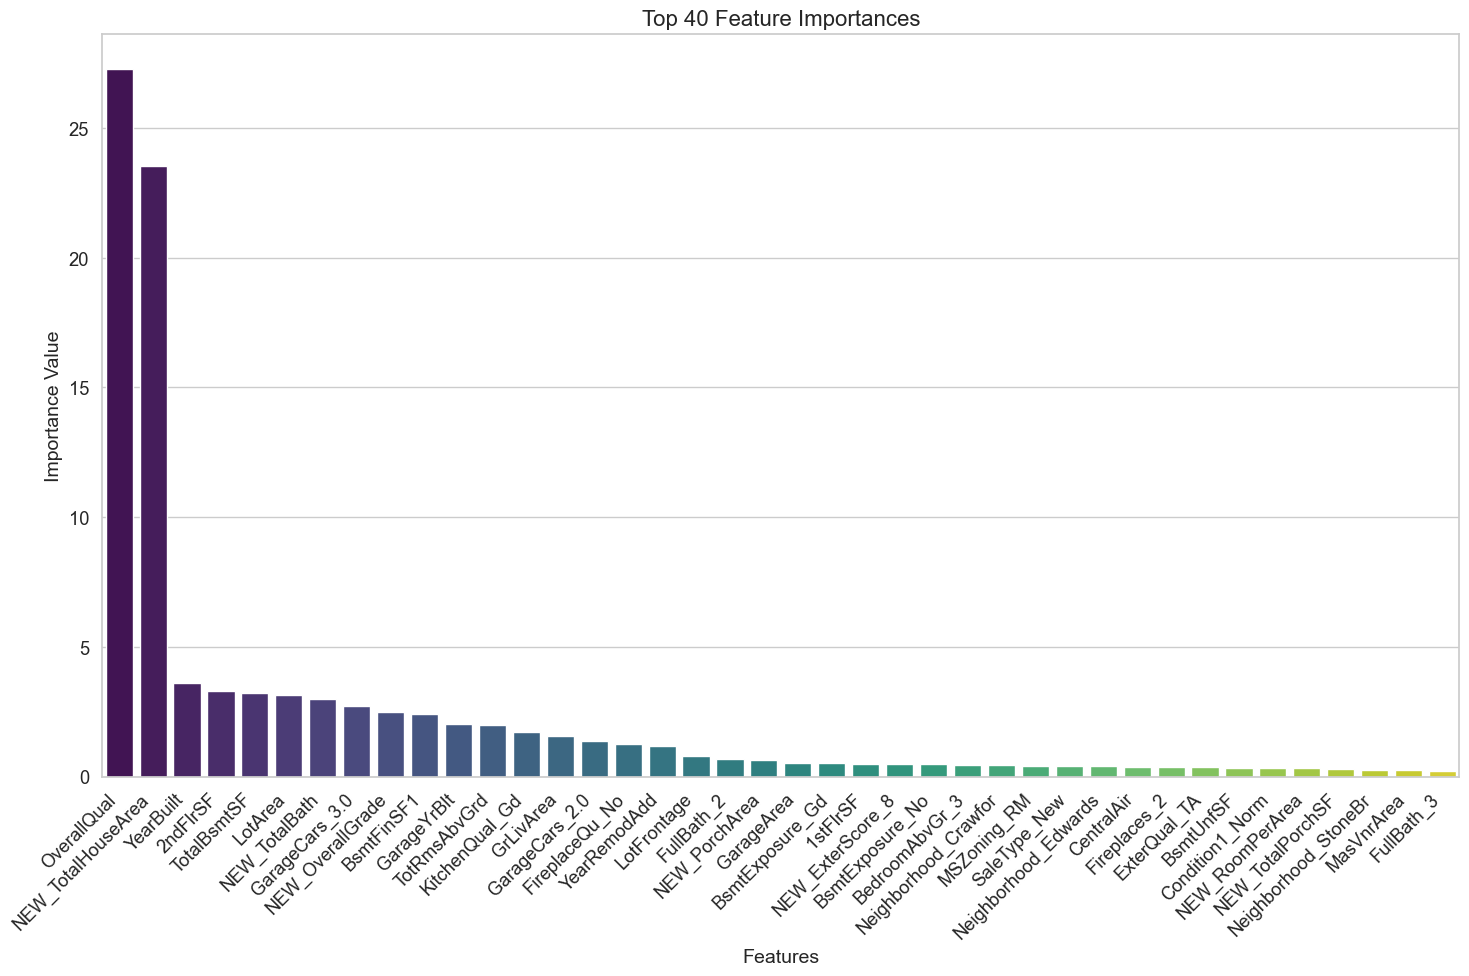

In [427]:
def plot_importance(model, features, dataframe, save=False):
    # Step 1: Create a DataFrame for feature importances
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})

    # Step 2: Sort the DataFrame by importance values
    feature_imp_sorted = feature_imp.sort_values(by='Value', ascending=False).head(40)

    # Step 3: Create a vertical bar plot for feature importances
    plt.figure(figsize=(15, 10))
    sns.set_theme(style="whitegrid", font_scale=1.2)
    
    # Use a vertical bar plot
    sns.barplot(x='Feature', y='Value', data=feature_imp_sorted, palette='viridis')
    
    # Step 4: Customize the plot
    plt.title('Top 40 Feature Importances', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Importance Value', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
    plt.tight_layout()
    
    # Step 5: Show the plot
    plt.show()
    
    # Step 6: Save the plot if requested
    if save:
        plt.savefig('importances_vertical.png')

# Call the function with the model and training data
plot_importance(final_model, X, house) # type: ignore

In [428]:
predictions = final_model.predict(df_test.drop(['SalePrice'], axis=1))

In [434]:
heading ('predictions')
predictions

--------------------------------------------------
PREDICTIONS
--------------------------------------------------


array([122138.63494779, 160910.29189462, 182502.46200996, ...,
       172115.01699087, 121465.60281053, 221204.37690154])

In [437]:


dictionary = {'Id':test_x['Id'], 'SalePrice':predictions}

dfSubmission = pd.DataFrame(dictionary)

dfSubmission.head(20)

Id  SalePrice
0   1461 122138.635
1   1462 160910.292
2   1463 182502.462
3   1464 194407.442
4   1465 184211.120
5   1466 174725.147
6   1467 179712.551
7   1468 163146.798
8   1469 187291.583
9   1470 117599.583
10  1471 201957.475
11  1472  96269.787
12  1473  99204.487
13  1474 146136.061
14  1475 119988.025
15  1476 395158.287
16  1477 263348.573
17  1478 281771.019
18  1479 267696.993
19  1480 503820.727